In [ ]:
%load_ext autoreload
%autoreload 2
import seaborn as sns
import glob
import os
import numpy as np
import sys
sys.path.append( '../src/')
from matplotlib import pyplot as plt
from compile_treeset import compile_folder , compare_treesets


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff


def graph_treedf(tree_resdf , rescols, rescols_norm , outfolder = '../figures/' , prefix = '' ):
    #sns.violinplot(tree_resdf[rescols] , hue=tree_resdf.filtered, split=True , cut =0 , bw=.15)
    if os.path.exists(outfolder ) == False:
        os.mkdir(outfolder)
    
    
    sns.set(rc={'figure.figsize':(10,8)})
    graph = sns.violinplot(tree_resdf[rescols] , cut = 0 , inner= 'box' )
    graph.axhline(max([tree_resdf[col].median() for col in rescols ]) , dashes = [2 , 1 ] )
    plt.xticks(rotation=45)
    
    
    plt.show()
    plt.savefig( outfolder + prefix + '_score.svg')

    sns.set(rc={'figure.figsize':(10,8)})
    graph = sns.violinplot(tree_resdf[rescols_norm] , cut = 0    )
    graph.axhline(max([tree_resdf[col].median() for col in rescols_norm ]) , dashes = [2 , 1 ] )
    plt.xticks(rotation=45)
    plt.show()
    
    
    plt.savefig( outfolder + prefix + '_norm_score.svg')
    
    clean = tree_resdf[rescols].dropna()
    fig = ff.create_distplot([ clean[col] for col in rescols ], [col for col in rescols] , bin_size = 150, show_rug = True)
    fig.show()
    

In [ ]:
def compile_results(cladefolders , plotall = False, scorefunc = 'root_score'):
    rescols = ['lddt_1_raw_struct_tree' , 'fident_1_raw_struct_tree', 'alntmscore_1_raw_struct_tree', 'sequences' ]
    rescols_norm = ['lddt_1_raw_struct_tree'+'_norm' , 'fident_1_raw_struct_tree'+'_norm', 'alntmscore_1_raw_struct_tree'+'_norm' , 'sequences'+'_norm']
    dfs = []
    plotall = False
    for folder in cladefolders:
        #try:
        if 'logs' not in folder:
            print(folder)
            res = compile_folder(folder, scorefunc = scorefunc, verbose = True)
            if res :
                tree_resdf , refcols = res
                compare_treesets(tree_resdf  , colfilter= 'sequence' , display_lineplot = False , verbose = True)
                tree_resdf['folder'] = folder

                #add filtered bool column
                tree_resdf['filtered'] = tree_resdf['folder'].apply(lambda x : 'unfiltered' not in x)

                if 'OMA' in folder:
                    dfs.append(tree_resdf)
                    if plotall == True:
                        graph_treedf(tree_resdf , rescols, rescols_norm)
                else:
                    dfs.append(tree_resdf)

    total_df = pd.concat(dfs)
    try:
        if 'OMA' in folder:

            graph_treedf(total_df[total_df.filtered == False] , rescols, rescols_norm , prefix = 'OMA' )
            graph_treedf(total_df[total_df.filtered == True] , rescols, rescols_norm , prefix = 'OMA' )
    except:
        print('graphing err' )
    return total_df

In [ ]:
cladefolders = [ '../CAT_data/']# , '../SCOP_data/' ]
scorefunc = 'root_score'
catdf = compile_results(cladefolders, scorefunc = 'root_score' )
print(catdf)

In [ ]:
cladefolders = [ '../CATH_data/']
cathdf = compile_results(cladefolders, scorefunc = 'root_score'  )
print(cathdf)

nseqs != nstructs ../OMA_data/Opisthokonta/HOG339/
39 91
nseqs != nstructs ../OMA_data/Opisthokonta/HOG548/
7 16


processed: 340:  47%|████▋     | 236/500 [00:26<00:33,  7.91it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG625/
8 17
nseqs != nstructs ../OMA_data/Opisthokonta/HOG187/
16 23
nseqs != nstructs ../OMA_data/Opisthokonta/HOG309/
40 41
nseqs != nstructs ../OMA_data/Opisthokonta/HOG61/
7 102


processed: 344:  48%|████▊     | 240/500 [00:26<00:24, 10.58it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG621/
6 11
nseqs != nstructs ../OMA_data/Opisthokonta/HOG279/
3 22
nseqs != nstructs ../OMA_data/Opisthokonta/HOG318/
3 19


processed: 347:  48%|████▊     | 242/500 [00:26<00:24, 10.47it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG652/
6 34


processed: 350:  49%|████▉     | 244/500 [00:27<00:29,  8.67it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG192/
21 25
nseqs != nstructs ../OMA_data/Opisthokonta/HOG514/
4 48
nseqs != nstructs ../OMA_data/Opisthokonta/HOG448/
8 51


processed: 355:  49%|████▉     | 246/500 [00:27<00:27,  9.09it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG16/
7 15
nseqs != nstructs ../OMA_data/Opisthokonta/HOG141/
8 31


processed: 359:  50%|████▉     | 248/500 [00:27<00:27,  9.25it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG249/
26 40
nseqs != nstructs ../OMA_data/Opisthokonta/HOG176/
7 10


processed: 361:  50%|█████     | 251/500 [00:27<00:27,  9.18it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG88/
4 15


processed: 365:  51%|█████     | 254/500 [00:28<00:26,  9.36it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG573/
12 17
nseqs != nstructs ../OMA_data/Opisthokonta/HOG412/
14 17
nseqs != nstructs ../OMA_data/Opisthokonta/HOG269/
3 33
nseqs != nstructs ../OMA_data/Opisthokonta/HOG106/
16 33


processed: 368:  52%|█████▏    | 258/500 [00:28<00:20, 11.62it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG90/
14 23
nseqs != nstructs ../OMA_data/Opisthokonta/HOG85/
3 21
nseqs != nstructs ../OMA_data/Opisthokonta/HOG347/
21 24


processed: 371:  52%|█████▏    | 260/500 [00:28<00:22, 10.88it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG661/
6 10
nseqs != nstructs ../OMA_data/Opisthokonta/HOG24/
15 20


processed: 375:  53%|█████▎    | 264/500 [00:29<00:17, 13.52it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG560/
24 37
nseqs != nstructs ../OMA_data/Opisthokonta/HOG631/
4 10
nseqs != nstructs ../OMA_data/Opisthokonta/HOG250/
20 23
nseqs != nstructs ../OMA_data/Opisthokonta/HOG484/
3 10


processed: 377:  53%|█████▎    | 264/500 [00:29<00:17, 13.52it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG348/
40 49


processed: 387:  54%|█████▎    | 268/500 [00:29<00:32,  7.20it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG133/
11 41


processed: 391:  54%|█████▍    | 271/500 [00:30<00:33,  6.74it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG503/
16 19
nseqs != nstructs ../OMA_data/Opisthokonta/HOG152/
9 28
nseqs != nstructs ../OMA_data/Opisthokonta/HOG403/
6 21


processed: 395:  55%|█████▍    | 273/500 [00:30<00:27,  8.17it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG91/
3 11
nseqs != nstructs ../OMA_data/Opisthokonta/HOG20/
4 15


processed: 399:  55%|█████▌    | 277/500 [00:30<00:26,  8.47it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG66/
11 22
nseqs != nstructs ../OMA_data/Opisthokonta/HOG45/
11 18
nseqs != nstructs ../OMA_data/Opisthokonta/HOG422/
4 23


processed: 404:  56%|█████▌    | 279/500 [00:31<00:24,  9.19it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG393/
8 17
nseqs != nstructs ../OMA_data/Opisthokonta/HOG14/
51 102
nseqs != nstructs ../OMA_data/Opisthokonta/HOG62/
3 20


processed: 408:  56%|█████▋    | 282/500 [00:31<00:22,  9.58it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG178/
4 12
nseqs != nstructs ../OMA_data/Opisthokonta/HOG33/
23 29
nseqs != nstructs ../OMA_data/Opisthokonta/HOG188/
28 69


processed: 414:  57%|█████▋    | 286/500 [00:31<00:17, 12.18it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG430/
16 20
nseqs != nstructs ../OMA_data/Opisthokonta/HOG185/
7 16


processed: 416:  58%|█████▊    | 288/500 [00:31<00:19, 10.76it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG607/
6 22
nseqs != nstructs ../OMA_data/Opisthokonta/HOG371/
14 15


processed: 420:  58%|█████▊    | 290/500 [00:32<00:20, 10.23it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG38/
5 24
nseqs != nstructs ../OMA_data/Opisthokonta/HOG323/
17 20
nseqs != nstructs ../OMA_data/Opisthokonta/HOG616/
18 20


processed: 425:  59%|█████▉    | 294/500 [00:32<00:18, 11.36it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG275/
18 20
nseqs != nstructs ../OMA_data/Opisthokonta/HOG534/
21 43
nseqs != nstructs ../OMA_data/Opisthokonta/HOG25/
67 74


processed: 427:  59%|█████▉    | 296/500 [00:32<00:17, 11.62it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG107/
5 11
nseqs != nstructs ../OMA_data/Opisthokonta/HOG19/
21 55


processed: 432:  60%|█████▉    | 298/500 [00:32<00:21,  9.29it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG52/
23 42


processed: 434:  60%|██████    | 300/500 [00:33<00:22,  8.70it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG614/
11 31


processed: 437:  61%|██████    | 303/500 [00:33<00:22,  8.84it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG659/
12 19
nseqs != nstructs ../OMA_data/Opisthokonta/HOG353/
25 34
nseqs != nstructs ../OMA_data/Opisthokonta/HOG260/
8 11


processed: 442:  61%|██████    | 305/500 [00:34<00:27,  7.15it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG37/
14 51
nseqs != nstructs ../OMA_data/Opisthokonta/HOG56/
11 12


processed: 445:  62%|██████▏   | 308/500 [00:34<00:24,  7.91it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG585/
10 14
nseqs != nstructs ../OMA_data/Opisthokonta/HOG219/
20 31


processed: 449:  62%|██████▏   | 311/500 [00:34<00:21,  8.99it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG44/
7 24
nseqs != nstructs ../OMA_data/Opisthokonta/HOG475/
25 28


processed: 453:  63%|██████▎   | 313/500 [00:35<00:30,  6.16it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG258/
3 37
nseqs != nstructs ../OMA_data/Opisthokonta/HOG378/
11 42


processed: 457:  63%|██████▎   | 315/500 [00:35<00:21,  8.55it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG101/
19 34
nseqs != nstructs ../OMA_data/Opisthokonta/HOG369/
3 18
nseqs != nstructs ../OMA_data/Opisthokonta/HOG609/
17 28


processed: 459:  63%|██████▎   | 317/500 [00:35<00:27,  6.66it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG78/
8 16


processed: 461:  64%|██████▍   | 319/500 [00:35<00:27,  6.54it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG650/
6 21
nseqs != nstructs ../OMA_data/Opisthokonta/HOG22/
42 45


processed: 467:  64%|██████▍   | 322/500 [00:36<00:23,  7.70it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG432/
9 14
nseqs != nstructs ../OMA_data/Opisthokonta/HOG355/
29 30
nseqs != nstructs ../OMA_data/Opisthokonta/HOG395/
5 14


processed: 472:  65%|██████▌   | 325/500 [00:36<00:19,  8.79it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG580/
13 42
nseqs != nstructs ../OMA_data/Opisthokonta/HOG598/
11 15
nseqs != nstructs ../OMA_data/Opisthokonta/HOG35/
17 22


processed: 475:  65%|██████▌   | 327/500 [00:36<00:17, 10.01it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG565/
20 21
nseqs != nstructs ../OMA_data/Opisthokonta/HOG364/
29 31
nseqs != nstructs ../OMA_data/Opisthokonta/HOG253/
13 14


processed: 480:  66%|██████▋   | 332/500 [00:36<00:11, 14.65it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG608/
20 29
nseqs != nstructs ../OMA_data/Opisthokonta/HOG28/
6 8
nseqs != nstructs ../OMA_data/Opisthokonta/HOG387/
6 36
nseqs != nstructs ../OMA_data/Opisthokonta/HOG271/
19 22


processed: 486:  67%|██████▋   | 334/500 [00:37<00:15, 10.43it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG602/
4 15
nseqs != nstructs ../OMA_data/Opisthokonta/HOG284/
17 80


processed: 492:  67%|██████▋   | 337/500 [00:37<00:15, 10.78it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG302/
8 19
nseqs != nstructs ../OMA_data/Opisthokonta/HOG363/
8 17
nseqs != nstructs ../OMA_data/Opisthokonta/HOG343/
6 24
nseqs != nstructs ../OMA_data/Opisthokonta/HOG74/
11 25


processed: 497:  68%|██████▊   | 341/500 [00:37<00:11, 13.34it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG627/
6 16
nseqs != nstructs ../OMA_data/Opisthokonta/HOG197/
6 19
nseqs != nstructs ../OMA_data/Opisthokonta/HOG592/
39 60


processed: 499:  69%|██████▉   | 344/500 [00:38<00:17,  9.03it/s]
/work/FAC/FBM/DBC/cdessim2/default/dmoi/miniconda3/envs/ML2/lib/python3.10/site-packages/scipy/stats/_morestats.py:3337: UserWarning:

Exact p-value calculation does not work if there are zeros. Switching to normal approximation.



nseqs != nstructs ../OMA_data/Opisthokonta/HOG410/
16 22
nseqs != nstructs ../OMA_data/Opisthokonta/HOG326/
8 10
                                  alntmscore_0_raw_struct_tree  \
../OMA_data/Opisthokonta/HOG165/                           993   
../OMA_data/Opisthokonta/HOG194/                          1982   
../OMA_data/Opisthokonta/HOG379/                           934   
../OMA_data/Opisthokonta/HOG558/                           993   
../OMA_data/Opisthokonta/HOG446/                          3422   

                                  alntmscore_0_exp_struct_tree  \
../OMA_data/Opisthokonta/HOG165/                           993   
../OMA_data/Opisthokonta/HOG194/                          2021   
../OMA_data/Opisthokonta/HOG379/                           934   
../OMA_data/Opisthokonta/HOG558/                          1003   
../OMA_data/Opisthokonta/HOG446/                          3525   

                                  alntmscore_1_exp_struct_tree  \
../OMA_data/Opisthokonta/HO

processed: 4:   1%|          | 4/500 [00:00<00:57,  8.58it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG109/
74 78
nseqs != nstructs ../OMA_data/Eukaryota/HOG178/
32 52
nseqs != nstructs ../OMA_data/Eukaryota/HOG2091/
27 29


processed: 9:   1%|          | 6/500 [00:00<00:55,  8.84it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG310/
37 66
nseqs != nstructs ../OMA_data/Eukaryota/HOG1906/
8 33
nseqs != nstructs ../OMA_data/Eukaryota/HOG1112/
23 38


processed: 11:   2%|▏         | 8/500 [00:00<00:45, 10.87it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG2062/
5 22
nseqs != nstructs ../OMA_data/Eukaryota/HOG1505/
30 33


processed: 14:   2%|▏         | 12/500 [00:01<00:46, 10.54it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG1818/
89 98
nseqs != nstructs ../OMA_data/Eukaryota/HOG2617/
35 36
nseqs != nstructs ../OMA_data/Eukaryota/HOG1261/
12 26


processed: 17:   3%|▎         | 14/500 [00:01<00:42, 11.33it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG102/
121 194
nseqs != nstructs ../OMA_data/Eukaryota/HOG1963/
9 21
nseqs != nstructs ../OMA_data/Eukaryota/HOG242/
67 473


processed: 20:   3%|▎         | 16/500 [00:01<00:39, 12.12it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG1682/
32 33
nseqs != nstructs ../OMA_data/Eukaryota/HOG1463/
32 41


processed: 24:   4%|▍         | 20/500 [00:01<00:43, 11.11it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG2105/
31 47
nseqs != nstructs ../OMA_data/Eukaryota/HOG878/
4 27


processed: 29:   5%|▍         | 24/500 [00:02<00:47, 10.09it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG1443/
52 68
nseqs != nstructs ../OMA_data/Eukaryota/HOG712/
40 67
nseqs != nstructs ../OMA_data/Eukaryota/HOG2662/
16 23
nseqs != nstructs ../OMA_data/Eukaryota/HOG280/
47 55


processed: 30:   5%|▍         | 24/500 [00:02<00:47, 10.09it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG212/
89 141


processed: 32:   5%|▌         | 26/500 [00:02<00:56,  8.35it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG1293/
26 36


processed: 36:   6%|▌         | 28/500 [00:03<00:59,  7.97it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG1563/
33 39
nseqs != nstructs ../OMA_data/Eukaryota/HOG2995/
7 23


processed: 41:   6%|▌         | 30/500 [00:03<01:01,  7.64it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG1058/
34 116
nseqs != nstructs ../OMA_data/Eukaryota/HOG1519/
43 47
nseqs != nstructs ../OMA_data/Eukaryota/HOG2930/
5 21


processed: 42:   6%|▋         | 32/500 [00:03<00:55,  8.50it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG1672/
5 10


processed: 45:   7%|▋         | 35/500 [00:03<00:52,  8.84it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG419/
37 52
nseqs != nstructs ../OMA_data/Eukaryota/HOG3148/
18 47
nseqs != nstructs ../OMA_data/Eukaryota/HOG1011/
49 88


processed: 48:   7%|▋         | 37/500 [00:04<00:56,  8.14it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG1513/
21 22
nseqs != nstructs ../OMA_data/Eukaryota/HOG3043/
58 62


processed: 52:   8%|▊         | 41/500 [00:04<00:55,  8.31it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG2131/
15 24
nseqs != nstructs ../OMA_data/Eukaryota/HOG2087/
18 26
nseqs != nstructs ../OMA_data/Eukaryota/HOG3082/
10 32


processed: 54:   9%|▊         | 43/500 [00:04<01:01,  7.41it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG1254/
25 28
nseqs != nstructs ../OMA_data/Eukaryota/HOG2720/
22 31


processed: 55:   9%|▊         | 43/500 [00:05<01:01,  7.41it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG401/
28 44


processed: 58:   9%|▉         | 46/500 [00:05<01:01,  7.39it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG75/
18 21
nseqs != nstructs ../OMA_data/Eukaryota/HOG1390/
55 94


processed: 60:   9%|▉         | 47/500 [00:05<01:00,  7.46it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG2205/
10 17
nseqs != nstructs ../OMA_data/Eukaryota/HOG1140/
17 40


processed: 62:  10%|█         | 50/500 [00:06<01:26,  5.19it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG1913/
12 16


processed: 65:  10%|█         | 51/500 [00:06<01:29,  5.04it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG679/
41 42


processed: 67:  10%|█         | 52/500 [00:06<01:29,  5.02it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG2102/
78 163
nseqs != nstructs ../OMA_data/Eukaryota/HOG2316/
9 21


processed: 70:  11%|█         | 55/500 [00:07<01:52,  3.96it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG1273/
9 21


processed: 74:  12%|█▏        | 58/500 [00:07<01:19,  5.55it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG482/
23 50
nseqs != nstructs ../OMA_data/Eukaryota/HOG2950/
10 12
nseqs != nstructs ../OMA_data/Eukaryota/HOG2877/
4 12


processed: 78:  12%|█▏        | 61/500 [00:08<01:37,  4.51it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG2380/
11 89
nseqs != nstructs ../OMA_data/Eukaryota/HOG256/
79 88


processed: 80:  13%|█▎        | 63/500 [00:08<01:36,  4.55it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG651/
11 35


processed: 84:  13%|█▎        | 66/500 [00:09<01:11,  6.07it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG934/
6 10
nseqs != nstructs ../OMA_data/Eukaryota/HOG1502/
10 15
nseqs != nstructs ../OMA_data/Eukaryota/HOG2709/
5 13
nseqs != nstructs ../OMA_data/Eukaryota/HOG3093/
12 18


processed: 86:  14%|█▍        | 69/500 [00:09<01:14,  5.81it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG511/
70 78
nseqs != nstructs ../OMA_data/Eukaryota/HOG2834/
3 16


processed: 89:  14%|█▍        | 71/500 [00:10<01:04,  6.64it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG1126/
16 35
nseqs != nstructs ../OMA_data/Eukaryota/HOG3160/
14 35


processed: 93:  15%|█▍        | 73/500 [00:10<00:51,  8.26it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG1446/
8 30
nseqs != nstructs ../OMA_data/Eukaryota/HOG1829/
12 23
nseqs != nstructs ../OMA_data/Eukaryota/HOG842/
52 59


processed: 98:  15%|█▌        | 75/500 [00:10<00:46,  9.23it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG453/
36 46
nseqs != nstructs ../OMA_data/Eukaryota/HOG494/
52 70


processed: 101:  15%|█▌        | 77/500 [00:10<00:55,  7.61it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG2193/
37 45


processed: 103:  16%|█▌        | 79/500 [00:11<01:09,  6.03it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG739/
38 45
nseqs != nstructs ../OMA_data/Eukaryota/HOG3196/
7 10


processed: 105:  16%|█▌        | 80/500 [00:11<01:14,  5.62it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG2081/
22 28
nseqs != nstructs ../OMA_data/Eukaryota/HOG1280/
6 21


processed: 107:  17%|█▋        | 83/500 [00:12<01:10,  5.94it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG583/
38 57
nseqs != nstructs ../OMA_data/Eukaryota/HOG2681/
8 9


processed: 109:  17%|█▋        | 85/500 [00:12<00:59,  7.00it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG283/
531 659
nseqs != nstructs ../OMA_data/Eukaryota/HOG1794/
9 23


processed: 114:  18%|█▊        | 89/500 [00:12<00:52,  7.83it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG3023/
20 23
nseqs != nstructs ../OMA_data/Eukaryota/HOG2037/
3 32
nseqs != nstructs ../OMA_data/Eukaryota/HOG2136/
19 59


processed: 115:  18%|█▊        | 91/500 [00:12<00:48,  8.50it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG2405/
12 22
nseqs != nstructs ../OMA_data/Eukaryota/HOG2256/
46 47


processed: 119:  19%|█▉        | 94/500 [00:13<00:41,  9.74it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG2975/
4 19
nseqs != nstructs ../OMA_data/Eukaryota/HOG2161/
32 42
nseqs != nstructs ../OMA_data/Eukaryota/HOG1147/
34 39


processed: 124:  19%|█▉        | 96/500 [00:13<00:37, 10.72it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG2237/
4 14
nseqs != nstructs ../OMA_data/Eukaryota/HOG1357/
11 46
nseqs != nstructs ../OMA_data/Eukaryota/HOG2400/
4 19


processed: 128:  20%|██        | 100/500 [00:13<00:35, 11.28it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG2888/
3 16
nseqs != nstructs ../OMA_data/Eukaryota/HOG193/
44 58
nseqs != nstructs ../OMA_data/Eukaryota/HOG2223/
35 42


processed: 131:  20%|██        | 102/500 [00:13<00:30, 12.87it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG188/
76 147
nseqs != nstructs ../OMA_data/Eukaryota/HOG3215/
11 12
nseqs != nstructs ../OMA_data/Eukaryota/HOG1153/
32 49


processed: 134:  21%|██        | 106/500 [00:14<00:31, 12.57it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG1298/
16 17
nseqs != nstructs ../OMA_data/Eukaryota/HOG329/
31 43
nseqs != nstructs ../OMA_data/Eukaryota/HOG2649/
15 30


processed: 137:  22%|██▏       | 108/500 [00:14<00:30, 12.72it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG2201/
87 114
nseqs != nstructs ../OMA_data/Eukaryota/HOG396/
4 28
nseqs != nstructs ../OMA_data/Eukaryota/HOG225/
29 41


processed: 142:  22%|██▏       | 112/500 [00:14<00:31, 12.26it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG2515/
27 33
nseqs != nstructs ../OMA_data/Eukaryota/HOG2841/
23 25
nseqs != nstructs ../OMA_data/Eukaryota/HOG358/
37 48
nseqs != nstructs ../OMA_data/Eukaryota/HOG2933/
49 115


processed: 145:  23%|██▎       | 116/500 [00:15<00:30, 12.49it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG555/
9 47
nseqs != nstructs ../OMA_data/Eukaryota/HOG1541/
7 21
nseqs != nstructs ../OMA_data/Eukaryota/HOG1763/
6 26


processed: 150:  24%|██▍       | 120/500 [00:15<00:30, 12.63it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG1733/
10 15
nseqs != nstructs ../OMA_data/Eukaryota/HOG2362/
14 17
nseqs != nstructs ../OMA_data/Eukaryota/HOG1175/
31 39
nseqs != nstructs ../OMA_data/Eukaryota/HOG3161/
8 18


processed: 155:  24%|██▍       | 122/500 [00:15<00:30, 12.58it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG1939/
19 20
nseqs != nstructs ../OMA_data/Eukaryota/HOG35/
6 19
nseqs != nstructs ../OMA_data/Eukaryota/HOG1732/
12 32


processed: 157:  25%|██▍       | 124/500 [00:15<00:30, 12.51it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG1017/
49 51


processed: 160:  26%|██▌       | 128/500 [00:16<00:38,  9.59it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG2270/
8 12
nseqs != nstructs ../OMA_data/Eukaryota/HOG2222/
3 37
nseqs != nstructs ../OMA_data/Eukaryota/HOG1644/
69 81


processed: 165:  26%|██▌       | 130/500 [00:16<00:37,  9.93it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG844/
268 306
nseqs != nstructs ../OMA_data/Eukaryota/HOG3203/
7 10
nseqs != nstructs ../OMA_data/Eukaryota/HOG475/
29 46


processed: 170:  26%|██▋       | 132/500 [00:16<00:37,  9.86it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG1181/
49 50
nseqs != nstructs ../OMA_data/Eukaryota/HOG606/
8 49


processed: 174:  27%|██▋       | 136/500 [00:17<00:50,  7.22it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG2537/
36 43
nseqs != nstructs ../OMA_data/Eukaryota/HOG187/
39 41


processed: 179:  28%|██▊       | 139/500 [00:17<00:45,  7.96it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG1099/
9 18
nseqs != nstructs ../OMA_data/Eukaryota/HOG291/
125 264


processed: 181:  28%|██▊       | 140/500 [00:17<00:45,  7.89it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG2069/
30 54
nseqs != nstructs ../OMA_data/Eukaryota/HOG2395/
18 27


processed: 184:  28%|██▊       | 142/500 [00:17<00:38,  9.35it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG2068/
4 26
nseqs != nstructs ../OMA_data/Eukaryota/HOG29/
12 20
nseqs != nstructs ../OMA_data/Eukaryota/HOG2305/
14 16


processed: 189:  29%|██▉       | 147/500 [00:18<00:29, 11.91it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG2688/
25 36
nseqs != nstructs ../OMA_data/Eukaryota/HOG2696/
9 13
nseqs != nstructs ../OMA_data/Eukaryota/HOG2993/
19 36
nseqs != nstructs ../OMA_data/Eukaryota/HOG1092/
31 55


processed: 192:  30%|██▉       | 149/500 [00:18<00:27, 12.65it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG3097/
8 15
nseqs != nstructs ../OMA_data/Eukaryota/HOG1920/
3 20
nseqs != nstructs ../OMA_data/Eukaryota/HOG500/
13 22


processed: 198:  31%|███       | 154/500 [00:18<00:37,  9.31it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG1237/
58 74
nseqs != nstructs ../OMA_data/Eukaryota/HOG1573/
7 36
nseqs != nstructs ../OMA_data/Eukaryota/HOG2056/
14 39
nseqs != nstructs ../OMA_data/Eukaryota/HOG2184/
6 25


processed: 202:  32%|███▏      | 158/500 [00:19<00:29, 11.61it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG448/
14 41
nseqs != nstructs ../OMA_data/Eukaryota/HOG2234/
5 10
nseqs != nstructs ../OMA_data/Eukaryota/HOG1225/
4 44


processed: 205:  32%|███▏      | 160/500 [00:19<00:31, 10.67it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG55/
12 128
nseqs != nstructs ../OMA_data/Eukaryota/HOG2044/
10 47


processed: 209:  33%|███▎      | 163/500 [00:20<00:39,  8.43it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG264/
20 47
nseqs != nstructs ../OMA_data/Eukaryota/HOG1270/
24 26
nseqs != nstructs ../OMA_data/Eukaryota/HOG704/
9 43


processed: 212:  33%|███▎      | 167/500 [00:20<00:29, 11.38it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG1472/
28 39
nseqs != nstructs ../OMA_data/Eukaryota/HOG2347/
7 19
nseqs != nstructs ../OMA_data/Eukaryota/HOG1460/
10 15


processed: 215:  34%|███▍      | 169/500 [00:20<00:28, 11.81it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG593/
11 37


processed: 219:  34%|███▍      | 171/500 [00:20<00:32, 10.00it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG983/
3 47
nseqs != nstructs ../OMA_data/Eukaryota/HOG2915/
3 4
nseqs != nstructs ../OMA_data/Eukaryota/HOG1825/
39 40


processed: 222:  35%|███▍      | 173/500 [00:20<00:30, 10.58it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG2660/
3 25


processed: 227:  35%|███▌      | 177/500 [00:21<00:28, 11.25it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG1109/
39 40
nseqs != nstructs ../OMA_data/Eukaryota/HOG859/
7 46
nseqs != nstructs ../OMA_data/Eukaryota/HOG694/
12 29
nseqs != nstructs ../OMA_data/Eukaryota/HOG2564/
11 17


processed: 230:  36%|███▌      | 181/500 [00:21<00:27, 11.62it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG59/
51 55
nseqs != nstructs ../OMA_data/Eukaryota/HOG1668/
39 45
nseqs != nstructs ../OMA_data/Eukaryota/HOG1499/
6 15


processed: 233:  37%|███▋      | 183/500 [00:21<00:29, 10.76it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG1382/
44 46
nseqs != nstructs ../OMA_data/Eukaryota/HOG2563/
10 21


processed: 235:  37%|███▋      | 185/500 [00:21<00:26, 11.90it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG843/
37 84
nseqs != nstructs ../OMA_data/Eukaryota/HOG121/
10 61
nseqs != nstructs ../OMA_data/Eukaryota/HOG325/
6 27


processed: 239:  38%|███▊      | 189/500 [00:22<00:39,  7.89it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG680/
7 47


processed: 243:  38%|███▊      | 191/500 [00:22<00:43,  7.12it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG2851/
6 11
nseqs != nstructs ../OMA_data/Eukaryota/HOG2474/
7 10
nseqs != nstructs ../OMA_data/Eukaryota/HOG1702/
33 36


processed: 246:  39%|███▉      | 195/500 [00:23<00:33,  9.04it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG3180/
8 16
nseqs != nstructs ../OMA_data/Eukaryota/HOG2597/
7 10
nseqs != nstructs ../OMA_data/Eukaryota/HOG1236/
68 70


processed: 249:  39%|███▉      | 197/500 [00:23<00:29, 10.23it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG2289/
14 17
nseqs != nstructs ../OMA_data/Eukaryota/HOG1779/
7 34
nseqs != nstructs ../OMA_data/Eukaryota/HOG1116/
18 26


processed: 253:  40%|████      | 201/500 [00:23<00:27, 10.89it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG1545/
4 14
nseqs != nstructs ../OMA_data/Eukaryota/HOG3044/
35 39


processed: 256:  41%|████      | 203/500 [00:24<00:31,  9.32it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG2994/
9 23
nseqs != nstructs ../OMA_data/Eukaryota/HOG567/
9 14
nseqs != nstructs ../OMA_data/Eukaryota/HOG1306/
20 21


processed: 259:  41%|████▏     | 207/500 [00:24<00:28, 10.31it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG731/
20 45
nseqs != nstructs ../OMA_data/Eukaryota/HOG1201/
14 43
nseqs != nstructs ../OMA_data/Eukaryota/HOG2294/
14 42


processed: 262:  42%|████▏     | 209/500 [00:24<00:27, 10.74it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG1797/
17 26
nseqs != nstructs ../OMA_data/Eukaryota/HOG1281/
25 27
nseqs != nstructs ../OMA_data/Eukaryota/HOG793/
21 45


processed: 266:  43%|████▎     | 213/500 [00:24<00:23, 12.27it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG2925/
18 24
nseqs != nstructs ../OMA_data/Eukaryota/HOG945/
42 44
nseqs != nstructs ../OMA_data/Eukaryota/HOG1307/
20 34


processed: 269:  43%|████▎     | 215/500 [00:24<00:24, 11.83it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG856/
29 49
nseqs != nstructs ../OMA_data/Eukaryota/HOG2535/
13 27
nseqs != nstructs ../OMA_data/Eukaryota/HOG1976/
17 21


processed: 271:  43%|████▎     | 217/500 [00:25<00:27, 10.41it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG2855/
6 11


processed: 274:  44%|████▍     | 221/500 [00:25<00:25, 10.93it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG350/
55 57
nseqs != nstructs ../OMA_data/Eukaryota/HOG1896/
29 35
nseqs != nstructs ../OMA_data/Eukaryota/HOG808/
20 47


processed: 278:  45%|████▍     | 223/500 [00:25<00:25, 10.94it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG469/
33 44
nseqs != nstructs ../OMA_data/Eukaryota/HOG2363/
41 48
nseqs != nstructs ../OMA_data/Eukaryota/HOG176/
33 42


processed: 282:  45%|████▌     | 227/500 [00:25<00:22, 12.28it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG2538/
4 10
nseqs != nstructs ../OMA_data/Eukaryota/HOG2421/
3 13
nseqs != nstructs ../OMA_data/Eukaryota/HOG1179/
9 44


processed: 288:  46%|████▌     | 229/500 [00:26<00:21, 12.60it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG669/
51 63
nseqs != nstructs ../OMA_data/Eukaryota/HOG1388/
6 14
nseqs != nstructs ../OMA_data/Eukaryota/HOG2567/
15 27


processed: 291:  47%|████▋     | 233/500 [00:26<00:21, 12.36it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG2745/
30 47
nseqs != nstructs ../OMA_data/Eukaryota/HOG791/
17 97
nseqs != nstructs ../OMA_data/Eukaryota/HOG1290/
49 58


processed: 294:  47%|████▋     | 235/500 [00:26<00:22, 11.66it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG330/
6 45
nseqs != nstructs ../OMA_data/Eukaryota/HOG1088/
59 72
nseqs != nstructs ../OMA_data/Eukaryota/HOG1708/
5 10


processed: 297:  48%|████▊     | 239/500 [00:26<00:19, 13.18it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG799/
56 57
nseqs != nstructs ../OMA_data/Eukaryota/HOG2080/
28 47
nseqs != nstructs ../OMA_data/Eukaryota/HOG1436/
25 36


processed: 305:  49%|████▉     | 244/500 [00:27<00:23, 10.84it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG814/
5 124
nseqs != nstructs ../OMA_data/Eukaryota/HOG486/
22 29
nseqs != nstructs ../OMA_data/Eukaryota/HOG1965/
6 22
nseqs != nstructs ../OMA_data/Eukaryota/HOG2835/
56 90
nseqs != nstructs ../OMA_data/Eukaryota/HOG1950/
7 14


processed: 309:  50%|████▉     | 248/500 [00:27<00:17, 14.35it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG2939/
11 12
nseqs != nstructs ../OMA_data/Eukaryota/HOG1119/
7 49
nseqs != nstructs ../OMA_data/Eukaryota/HOG237/
71 72


processed: 313:  50%|█████     | 250/500 [00:27<00:19, 13.12it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG3144/
14 23
nseqs != nstructs ../OMA_data/Eukaryota/HOG1714/
15 19
nseqs != nstructs ../OMA_data/Eukaryota/HOG1152/
25 26


processed: 318:  51%|█████     | 255/500 [00:28<00:16, 15.19it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG1359/
40 50
nseqs != nstructs ../OMA_data/Eukaryota/HOG233/
85 102
nseqs != nstructs ../OMA_data/Eukaryota/HOG2634/
12 25
nseqs != nstructs ../OMA_data/Eukaryota/HOG1294/
10 26
nseqs != nstructs ../OMA_data/Eukaryota/HOG407/
30 45


processed: 324:  52%|█████▏    | 259/500 [00:28<00:23, 10.36it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG1434/
15 16
nseqs != nstructs ../OMA_data/Eukaryota/HOG1766/
11 70


processed: 327:  53%|█████▎    | 263/500 [00:29<00:22, 10.44it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG2692/
6 12
nseqs != nstructs ../OMA_data/Eukaryota/HOG3118/
5 22
nseqs != nstructs ../OMA_data/Eukaryota/HOG2486/
9 74


processed: 329:  53%|█████▎    | 265/500 [00:29<00:22, 10.61it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG2577/
19 28


processed: 331:  53%|█████▎    | 267/500 [00:29<00:24,  9.57it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG2714/
10 16


processed: 337:  54%|█████▍    | 272/500 [00:29<00:21, 10.80it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG52/
141 195
nseqs != nstructs ../OMA_data/Eukaryota/HOG2399/
9 26
nseqs != nstructs ../OMA_data/Eukaryota/HOG3120/
11 14
nseqs != nstructs ../OMA_data/Eukaryota/HOG2979/
3 27
nseqs != nstructs ../OMA_data/Eukaryota/HOG2561/
7 11


processed: 339:  55%|█████▍    | 274/500 [00:30<00:18, 12.26it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG2790/
10 13
nseqs != nstructs ../OMA_data/Eukaryota/HOG1869/
39 54


processed: 345:  56%|█████▌    | 278/500 [00:30<00:18, 12.08it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG1767/
9 15
nseqs != nstructs ../OMA_data/Eukaryota/HOG2887/
20 22
nseqs != nstructs ../OMA_data/Eukaryota/HOG754/
4 18
nseqs != nstructs ../OMA_data/Eukaryota/HOG154/
12 52


processed: 349:  56%|█████▌    | 280/500 [00:30<00:18, 11.60it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG1117/
31 34
nseqs != nstructs ../OMA_data/Eukaryota/HOG895/
6 43


processed: 354:  57%|█████▋    | 283/500 [00:30<00:19, 11.30it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG2544/
5 31
nseqs != nstructs ../OMA_data/Eukaryota/HOG1641/
10 27
nseqs != nstructs ../OMA_data/Eukaryota/HOG2849/
6 10
nseqs != nstructs ../OMA_data/Eukaryota/HOG404/
18 19


processed: 358:  57%|█████▋    | 287/500 [00:31<00:17, 12.02it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG479/
47 52
nseqs != nstructs ../OMA_data/Eukaryota/HOG1475/
19 43
nseqs != nstructs ../OMA_data/Eukaryota/HOG2176/
24 37


processed: 364:  58%|█████▊    | 291/500 [00:31<00:19, 10.58it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG1924/
20 36
nseqs != nstructs ../OMA_data/Eukaryota/HOG1676/
25 35
nseqs != nstructs ../OMA_data/Eukaryota/HOG342/
72 74
nseqs != nstructs ../OMA_data/Eukaryota/HOG459/
13 48


processed: 370:  59%|█████▉    | 296/500 [00:31<00:14, 13.98it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG137/
46 58
nseqs != nstructs ../OMA_data/Eukaryota/HOG538/
45 65
nseqs != nstructs ../OMA_data/Eukaryota/HOG2388/
9 30


processed: 375:  60%|█████▉    | 298/500 [00:32<00:18, 10.85it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG2497/
36 40
nseqs != nstructs ../OMA_data/Eukaryota/HOG769/
9 47
nseqs != nstructs ../OMA_data/Eukaryota/HOG3091/
33 40


processed: 380:  60%|██████    | 302/500 [00:32<00:15, 12.38it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG2759/
18 19
nseqs != nstructs ../OMA_data/Eukaryota/HOG1074/
5 46
nseqs != nstructs ../OMA_data/Eukaryota/HOG1100/
13 44
nseqs != nstructs ../OMA_data/Eukaryota/HOG2562/
8 15


processed: 384:  61%|██████    | 306/500 [00:32<00:15, 12.88it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG839/
65 69
nseqs != nstructs ../OMA_data/Eukaryota/HOG2301/
5 10
nseqs != nstructs ../OMA_data/Eukaryota/HOG2455/
22 28


processed: 388:  62%|██████▏   | 308/500 [00:33<00:15, 12.31it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG1187/
8 40
nseqs != nstructs ../OMA_data/Eukaryota/HOG2035/
18 39
nseqs != nstructs ../OMA_data/Eukaryota/HOG2150/
16 29


processed: 392:  62%|██████▏   | 312/500 [00:33<00:14, 12.93it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG2555/
13 18
nseqs != nstructs ../OMA_data/Eukaryota/HOG2225/
5 34
nseqs != nstructs ../OMA_data/Eukaryota/HOG3029/
25 33


processed: 395:  63%|██████▎   | 314/500 [00:33<00:14, 13.25it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG2172/
10 12
nseqs != nstructs ../OMA_data/Eukaryota/HOG1295/
11 12
nseqs != nstructs ../OMA_data/Eukaryota/HOG1805/
24 25


processed: 398:  64%|██████▎   | 318/500 [00:33<00:15, 12.06it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG155/
49 58
nseqs != nstructs ../OMA_data/Eukaryota/HOG1707/
13 15
nseqs != nstructs ../OMA_data/Eukaryota/HOG750/
28 46


processed: 401:  64%|██████▍   | 321/500 [00:33<00:11, 14.98it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG120/
21 50
nseqs != nstructs ../OMA_data/Eukaryota/HOG2267/
14 18


processed: 404:  65%|██████▍   | 323/500 [00:34<00:15, 11.26it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG1671/
35 37
nseqs != nstructs ../OMA_data/Eukaryota/HOG1875/
29 32
nseqs != nstructs ../OMA_data/Eukaryota/HOG2031/
11 25


processed: 406:  65%|██████▌   | 325/500 [00:34<00:16, 10.89it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG322/
9 35
nseqs != nstructs ../OMA_data/Eukaryota/HOG2729/
21 22


processed: 410:  66%|██████▌   | 329/500 [00:34<00:15, 10.74it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG1677/
25 83
nseqs != nstructs ../OMA_data/Eukaryota/HOG1115/
25 37
nseqs != nstructs ../OMA_data/Eukaryota/HOG3201/
5 18


processed: 414:  67%|██████▋   | 333/500 [00:35<00:13, 12.64it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG335/
75 76
nseqs != nstructs ../OMA_data/Eukaryota/HOG69/
40 47
nseqs != nstructs ../OMA_data/Eukaryota/HOG287/
26 48
nseqs != nstructs ../OMA_data/Eukaryota/HOG1174/
4 16


processed: 417:  67%|██████▋   | 335/500 [00:35<00:12, 13.52it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG914/
25 39
nseqs != nstructs ../OMA_data/Eukaryota/HOG566/
5 32


processed: 422:  68%|██████▊   | 340/500 [00:35<00:13, 11.89it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG596/
12 43
nseqs != nstructs ../OMA_data/Eukaryota/HOG1458/
34 36
nseqs != nstructs ../OMA_data/Eukaryota/HOG1741/
11 28
nseqs != nstructs ../OMA_data/Eukaryota/HOG836/
57 61


processed: 427:  68%|██████▊   | 342/500 [00:35<00:13, 12.11it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG721/
52 59
nseqs != nstructs ../OMA_data/Eukaryota/HOG1966/
7 56
nseqs != nstructs ../OMA_data/Eukaryota/HOG273/
18 42


processed: 431:  69%|██████▉   | 346/500 [00:36<00:11, 13.51it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG957/
32 47
nseqs != nstructs ../OMA_data/Eukaryota/HOG601/
44 46
nseqs != nstructs ../OMA_data/Eukaryota/HOG378/
6 82
nseqs != nstructs ../OMA_data/Eukaryota/HOG1839/
52 53


processed: 436:  70%|███████   | 351/500 [00:36<00:09, 15.44it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG2352/
15 18
nseqs != nstructs ../OMA_data/Eukaryota/HOG295/
23 36
nseqs != nstructs ../OMA_data/Eukaryota/HOG1248/
9 33
nseqs != nstructs ../OMA_data/Eukaryota/HOG3184/
8 10
nseqs != nstructs ../OMA_data/Eukaryota/HOG3008/
16 24


processed: 438:  71%|███████   | 353/500 [00:36<00:08, 17.07it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG1425/
19 41
nseqs != nstructs ../OMA_data/Eukaryota/HOG2526/
56 61


processed: 441:  71%|███████   | 355/500 [00:36<00:10, 13.75it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG3096/
16 25


processed: 447:  72%|███████▏  | 359/500 [00:37<00:12, 11.18it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG2941/
128 148
nseqs != nstructs ../OMA_data/Eukaryota/HOG2751/
31 32
nseqs != nstructs ../OMA_data/Eukaryota/HOG2445/
35 41
nseqs != nstructs ../OMA_data/Eukaryota/HOG1419/
8 27


processed: 453:  73%|███████▎  | 363/500 [00:37<00:10, 12.70it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG1640/
10 38
nseqs != nstructs ../OMA_data/Eukaryota/HOG1001/
36 51
nseqs != nstructs ../OMA_data/Eukaryota/HOG1881/
22 39


processed: 457:  73%|███████▎  | 365/500 [00:37<00:11, 11.29it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG1824/
28 31
nseqs != nstructs ../OMA_data/Eukaryota/HOG686/
5 51


processed: 463:  74%|███████▎  | 368/500 [00:37<00:11, 11.70it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG183/
52 70
nseqs != nstructs ../OMA_data/Eukaryota/HOG970/
8 11
nseqs != nstructs ../OMA_data/Eukaryota/HOG144/
53 72


processed: 468:  74%|███████▍  | 370/500 [00:38<00:11, 11.18it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG2295/
6 14
nseqs != nstructs ../OMA_data/Eukaryota/HOG3126/
24 189
nseqs != nstructs ../OMA_data/Eukaryota/HOG740/
40 43


processed: 470:  74%|███████▍  | 372/500 [00:38<00:13,  9.73it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG1111/
29 44
nseqs != nstructs ../OMA_data/Eukaryota/HOG1575/
29 31


processed: 474:  75%|███████▍  | 374/500 [00:38<00:12,  9.77it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG1348/
37 75
nseqs != nstructs ../OMA_data/Eukaryota/HOG95/
399 490


processed: 478:  76%|███████▌  | 378/500 [00:38<00:11, 10.19it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG1165/
4 31
nseqs != nstructs ../OMA_data/Eukaryota/HOG1526/
5 22
nseqs != nstructs ../OMA_data/Eukaryota/HOG627/
32 112
nseqs != nstructs ../OMA_data/Eukaryota/HOG1962/
15 20


processed: 482:  76%|███████▌  | 381/500 [00:39<00:09, 13.17it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG2180/
12 31
nseqs != nstructs ../OMA_data/Eukaryota/HOG576/
53 57
nseqs != nstructs ../OMA_data/Eukaryota/HOG79/
76 129


processed: 486:  77%|███████▋  | 385/500 [00:39<00:09, 11.75it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG1992/
6 11
nseqs != nstructs ../OMA_data/Eukaryota/HOG545/
41 51
nseqs != nstructs ../OMA_data/Eukaryota/HOG1412/
36 37


processed: 492:  78%|███████▊  | 389/500 [00:39<00:07, 14.16it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG2616/
8 24
nseqs != nstructs ../OMA_data/Eukaryota/HOG1754/
15 23
nseqs != nstructs ../OMA_data/Eukaryota/HOG3105/
7 10
nseqs != nstructs ../OMA_data/Eukaryota/HOG2262/
8 17
nseqs != nstructs ../OMA_data/Eukaryota/HOG175/
33 49


processed: 498:  79%|███████▊  | 393/500 [00:39<00:07, 13.44it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG837/
11 70
nseqs != nstructs ../OMA_data/Eukaryota/HOG2170/
5 15
nseqs != nstructs ../OMA_data/Eukaryota/HOG2153/
47 60


processed: 499:  79%|███████▉  | 394/500 [00:40<00:10,  9.85it/s]
/work/FAC/FBM/DBC/cdessim2/default/dmoi/miniconda3/envs/ML2/lib/python3.10/site-packages/scipy/stats/_morestats.py:3337: UserWarning:

Exact p-value calculation does not work if there are zeros. Switching to normal approximation.



nseqs != nstructs ../OMA_data/Eukaryota/HOG1400/
45 48
                                alntmscore_0_raw_struct_tree  \
../OMA_data/Eukaryota/HOG2372/                           639   
../OMA_data/Eukaryota/HOG177/                           2038   
../OMA_data/Eukaryota/HOG2088/                          4372   
../OMA_data/Eukaryota/HOG667/                           2051   
../OMA_data/Eukaryota/HOG445/                           1887   

                                alntmscore_0_exp_struct_tree  \
../OMA_data/Eukaryota/HOG2372/                           639   
../OMA_data/Eukaryota/HOG177/                           2285   
../OMA_data/Eukaryota/HOG2088/                          4308   
../OMA_data/Eukaryota/HOG667/                           2051   
../OMA_data/Eukaryota/HOG445/                           2024   

                                alntmscore_1_exp_struct_tree  \
../OMA_data/Eukaryota/HOG2372/                           581   
../OMA_data/Eukaryota/HOG177/                  

processed: 138:  99%|█████████▉| 137/138 [00:24<00:00,  5.55it/s]


                                               alntmscore_0_raw_struct_tree  \
../OMA_data_unfiltered/OMA_data/Fungi/HOG7/                             348   
../OMA_data_unfiltered/OMA_data/Fungi/HOG22/                            452   
../OMA_data_unfiltered/OMA_data/Fungi/HOG108/                           462   
../OMA_data_unfiltered/OMA_data/Fungi/HOG30/                            446   
../OMA_data_unfiltered/OMA_data/Fungi/HOG136/                           498   

                                               alntmscore_0_exp_struct_tree  \
../OMA_data_unfiltered/OMA_data/Fungi/HOG7/                             348   
../OMA_data_unfiltered/OMA_data/Fungi/HOG22/                            442   
../OMA_data_unfiltered/OMA_data/Fungi/HOG108/                           477   
../OMA_data_unfiltered/OMA_data/Fungi/HOG30/                            438   
../OMA_data_unfiltered/OMA_data/Fungi/HOG136/                           502   

                                               aln

processed: 500:  99%|█████████▉| 494/500 [01:31<00:01,  5.43it/s]


                                                  alntmscore_0_raw_struct_tree  \
../OMA_data_unfiltered/OMA_data/Chordata/HOG775/                           854   
../OMA_data_unfiltered/OMA_data/Chordata/HOG209/                          2486   
../OMA_data_unfiltered/OMA_data/Chordata/HOG872/                           812   
../OMA_data_unfiltered/OMA_data/Chordata/HOG980/                           639   
../OMA_data_unfiltered/OMA_data/Chordata/HOG87/                           3024   

                                                  alntmscore_0_exp_struct_tree  \
../OMA_data_unfiltered/OMA_data/Chordata/HOG775/                           854   
../OMA_data_unfiltered/OMA_data/Chordata/HOG209/                          2456   
../OMA_data_unfiltered/OMA_data/Chordata/HOG872/                           816   
../OMA_data_unfiltered/OMA_data/Chordata/HOG980/                           639   
../OMA_data_unfiltered/OMA_data/Chordata/HOG87/                           2761   

              

processed: 500: 100%|█████████▉| 499/500 [01:00<00:00,  8.24it/s]


                                                   alntmscore_0_raw_struct_tree  \
../OMA_data_unfiltered/OMA_data/Eumetazoa/HOG853/                          2297   
../OMA_data_unfiltered/OMA_data/Eumetazoa/HOG380/                          2836   
../OMA_data_unfiltered/OMA_data/Eumetazoa/HOG464/                          1424   
../OMA_data_unfiltered/OMA_data/Eumetazoa/HOG340/                          1135   
../OMA_data_unfiltered/OMA_data/Eumetazoa/HOG550/                          1977   

                                                   alntmscore_0_exp_struct_tree  \
../OMA_data_unfiltered/OMA_data/Eumetazoa/HOG853/                          2297   
../OMA_data_unfiltered/OMA_data/Eumetazoa/HOG380/                          2686   
../OMA_data_unfiltered/OMA_data/Eumetazoa/HOG464/                          1283   
../OMA_data_unfiltered/OMA_data/Eumetazoa/HOG340/                          1191   
../OMA_data_unfiltered/OMA_data/Eumetazoa/HOG550/                          2024   

  

processed: 500:  99%|█████████▉| 495/500 [01:01<00:00,  8.05it/s]


                                                    alntmscore_0_raw_struct_tree  \
../OMA_data_unfiltered/OMA_data/Opisthokonta/HO...                           344   
../OMA_data_unfiltered/OMA_data/Opisthokonta/HO...                          1818   
../OMA_data_unfiltered/OMA_data/Opisthokonta/HO...                          2236   
../OMA_data_unfiltered/OMA_data/Opisthokonta/HO...                          3357   
../OMA_data_unfiltered/OMA_data/Opisthokonta/HO...                          2295   

                                                    alntmscore_0_exp_struct_tree  \
../OMA_data_unfiltered/OMA_data/Opisthokonta/HO...                           344   
../OMA_data_unfiltered/OMA_data/Opisthokonta/HO...                          1839   
../OMA_data_unfiltered/OMA_data/Opisthokonta/HO...                          2276   
../OMA_data_unfiltered/OMA_data/Opisthokonta/HO...                          3491   
../OMA_data_unfiltered/OMA_data/Opisthokonta/HO...                         

processed: 3:   0%|          | 1/500 [00:00<01:05,  7.66it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG732/
12 38


processed: 7:   1%|          | 3/500 [00:00<00:46, 10.61it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG409/
6 15
nseqs != nstructs ../OMA_data/Bilateria/HOG583/
18 19


processed: 10:   1%|          | 3/500 [00:00<00:46, 10.61it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG241/
42 54


processed: 22:   1%|▏         | 7/500 [00:00<00:58,  8.36it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG654/
11 15
nseqs != nstructs ../OMA_data/Bilateria/HOG613/
8 12
nseqs != nstructs ../OMA_data/Bilateria/HOG243/
14 17


processed: 24:   1%|▏         | 7/500 [00:00<00:58,  8.36it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG240/
22 29


processed: 33:   2%|▏         | 10/500 [00:01<01:12,  6.72it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG80/
30 143
nseqs != nstructs ../OMA_data/Bilateria/HOG872/
13 14


processed: 35:   2%|▏         | 12/500 [00:01<00:55,  8.73it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG148/
37 60
nseqs != nstructs ../OMA_data/Bilateria/HOG886/
15 44


processed: 43:   3%|▎         | 14/500 [00:01<01:07,  7.24it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG244/
9 22
nseqs != nstructs ../OMA_data/Bilateria/HOG653/
18 21
nseqs != nstructs ../OMA_data/Bilateria/HOG178/
12 14


processed: 49:   3%|▎         | 17/500 [00:02<01:05,  7.40it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG997/
25 29
nseqs != nstructs ../OMA_data/Bilateria/HOG122/
11 25


processed: 55:   4%|▎         | 18/500 [00:02<01:05,  7.35it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG198/
3 36


processed: 59:   4%|▍         | 22/500 [00:02<01:00,  7.93it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG795/
4 18
nseqs != nstructs ../OMA_data/Bilateria/HOG578/
6 98
nseqs != nstructs ../OMA_data/Bilateria/HOG188/
9 19


processed: 63:   5%|▍         | 24/500 [00:03<00:56,  8.36it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG746/
4 16


processed: 68:   5%|▌         | 27/500 [00:03<01:21,  5.81it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG281/
11 28
nseqs != nstructs ../OMA_data/Bilateria/HOG75/
10 29


processed: 76:   6%|▌         | 31/500 [00:04<01:02,  7.54it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG340/
23 28
nseqs != nstructs ../OMA_data/Bilateria/HOG802/
5 25
nseqs != nstructs ../OMA_data/Bilateria/HOG227/
11 13


processed: 80:   7%|▋         | 34/500 [00:04<01:12,  6.44it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG614/
9 40


processed: 85:   7%|▋         | 36/500 [00:05<01:21,  5.70it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG1009/
12 16


processed: 89:   8%|▊         | 38/500 [00:05<01:34,  4.88it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG1027/
12 19
nseqs != nstructs ../OMA_data/Bilateria/HOG417/
5 12
nseqs != nstructs ../OMA_data/Bilateria/HOG832/
4 9


processed: 94:   8%|▊         | 41/500 [00:05<01:05,  7.02it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG450/
6 38


processed: 98:   9%|▊         | 43/500 [00:06<01:18,  5.81it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG197/
15 16
nseqs != nstructs ../OMA_data/Bilateria/HOG460/
11 21


processed: 102:   9%|▉         | 44/500 [00:06<01:11,  6.35it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG835/
9 24
nseqs != nstructs ../OMA_data/Bilateria/HOG395/
9 16


processed: 108:  10%|▉         | 48/500 [00:06<00:50,  9.03it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG563/
9 13
nseqs != nstructs ../OMA_data/Bilateria/HOG103/
13 16
nseqs != nstructs ../OMA_data/Bilateria/HOG220/
30 40


processed: 115:  10%|█         | 51/500 [00:07<00:47,  9.47it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG202/
14 38
nseqs != nstructs ../OMA_data/Bilateria/HOG259/
23 25
nseqs != nstructs ../OMA_data/Bilateria/HOG773/
7 10


processed: 121:  11%|█         | 53/500 [00:07<00:52,  8.58it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG501/
3 33


processed: 130:  11%|█         | 56/500 [00:08<01:07,  6.62it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG56/
11 14
nseqs != nstructs ../OMA_data/Bilateria/HOG662/
5 16
nseqs != nstructs ../OMA_data/Bilateria/HOG650/
6 12


processed: 135:  12%|█▏        | 58/500 [00:08<01:03,  6.97it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG303/
4 18
nseqs != nstructs ../OMA_data/Bilateria/HOG725/
5 32


processed: 136:  12%|█▏        | 58/500 [00:08<01:03,  6.97it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG704/
3 10


processed: 145:  12%|█▏        | 61/500 [00:08<00:57,  7.58it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG984/
5 12
nseqs != nstructs ../OMA_data/Bilateria/HOG208/
14 15


processed: 152:  13%|█▎        | 65/500 [00:09<00:47,  9.10it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG794/
4 12
nseqs != nstructs ../OMA_data/Bilateria/HOG410/
20 29
nseqs != nstructs ../OMA_data/Bilateria/HOG67/
6 17


processed: 156:  13%|█▎        | 66/500 [00:09<00:48,  9.02it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG34/
38 64


processed: 162:  14%|█▍        | 70/500 [00:09<00:42, 10.12it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG191/
4 8
nseqs != nstructs ../OMA_data/Bilateria/HOG659/
21 22
nseqs != nstructs ../OMA_data/Bilateria/HOG638/
12 15


processed: 169:  15%|█▍        | 73/500 [00:10<00:56,  7.49it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG339/
3 32
nseqs != nstructs ../OMA_data/Bilateria/HOG376/
10 11


processed: 174:  15%|█▌        | 75/500 [00:10<00:45,  9.26it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG97/
10 23
nseqs != nstructs ../OMA_data/Bilateria/HOG371/
19 25


processed: 181:  16%|█▌        | 79/500 [00:10<00:49,  8.58it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG238/
14 15
nseqs != nstructs ../OMA_data/Bilateria/HOG84/
3 18
nseqs != nstructs ../OMA_data/Bilateria/HOG701/
6 15


processed: 187:  16%|█▌        | 81/500 [00:11<00:50,  8.31it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG39/
3 14
nseqs != nstructs ../OMA_data/Bilateria/HOG906/
8 14


processed: 193:  17%|█▋        | 84/500 [00:11<00:45,  9.24it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG668/
16 19
nseqs != nstructs ../OMA_data/Bilateria/HOG74/
33 41


processed: 203:  18%|█▊        | 88/500 [00:11<00:48,  8.42it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG462/
3 26
nseqs != nstructs ../OMA_data/Bilateria/HOG189/
26 43
nseqs != nstructs ../OMA_data/Bilateria/HOG555/
22 53
nseqs != nstructs ../OMA_data/Bilateria/HOG819/
8 9


processed: 207:  18%|█▊        | 92/500 [00:12<00:47,  8.66it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG112/
18 31
nseqs != nstructs ../OMA_data/Bilateria/HOG967/
11 15
nseqs != nstructs ../OMA_data/Bilateria/HOG737/
17 20


processed: 211:  19%|█▉        | 94/500 [00:12<00:42,  9.61it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG467/
11 24
nseqs != nstructs ../OMA_data/Bilateria/HOG247/
9 45
nseqs != nstructs ../OMA_data/Bilateria/HOG130/
7 31


processed: 217:  20%|█▉        | 98/500 [00:12<00:37, 10.58it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG918/
5 23
nseqs != nstructs ../OMA_data/Bilateria/HOG685/
4 10
nseqs != nstructs ../OMA_data/Bilateria/HOG184/
14 18


processed: 222:  20%|██        | 102/500 [00:13<00:38, 10.34it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG865/
9 12
nseqs != nstructs ../OMA_data/Bilateria/HOG724/
6 29
nseqs != nstructs ../OMA_data/Bilateria/HOG893/
43 53


processed: 225:  21%|██        | 104/500 [00:13<00:38, 10.29it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG321/
4 30


processed: 229:  21%|██        | 106/500 [00:13<00:40,  9.63it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG471/
4 13
nseqs != nstructs ../OMA_data/Bilateria/HOG224/
4 17


processed: 234:  22%|██▏       | 108/500 [00:14<00:46,  8.46it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG969/
12 13


processed: 239:  22%|██▏       | 112/500 [00:14<00:45,  8.52it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG298/
31 48
nseqs != nstructs ../OMA_data/Bilateria/HOG468/
16 20
nseqs != nstructs ../OMA_data/Bilateria/HOG821/
11 12


processed: 244:  23%|██▎       | 115/500 [00:14<00:35, 10.71it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG138/
13 15
nseqs != nstructs ../OMA_data/Bilateria/HOG897/
8 15
nseqs != nstructs ../OMA_data/Bilateria/HOG959/
8 13


processed: 251:  23%|██▎       | 117/500 [00:14<00:38,  9.91it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG370/
39 47
nseqs != nstructs ../OMA_data/Bilateria/HOG912/
5 14


processed: 258:  24%|██▍       | 119/500 [00:15<00:35, 10.69it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG204/
15 29
nseqs != nstructs ../OMA_data/Bilateria/HOG419/
6 8
nseqs != nstructs ../OMA_data/Bilateria/HOG760/
7 14


processed: 263:  24%|██▍       | 121/500 [00:15<00:35, 10.72it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG392/
3 13
nseqs != nstructs ../OMA_data/Bilateria/HOG66/
18 19


processed: 270:  25%|██▌       | 125/500 [00:15<00:43,  8.69it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG980/
4 8
nseqs != nstructs ../OMA_data/Bilateria/HOG448/
11 22


processed: 278:  26%|██▌       | 128/500 [00:16<00:35, 10.37it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG313/
24 39
nseqs != nstructs ../OMA_data/Bilateria/HOG498/
27 85
nseqs != nstructs ../OMA_data/Bilateria/HOG538/
12 13
nseqs != nstructs ../OMA_data/Bilateria/HOG266/
11 44


processed: 284:  26%|██▋       | 132/500 [00:16<00:34, 10.82it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG680/
18 20
nseqs != nstructs ../OMA_data/Bilateria/HOG785/
9 11
nseqs != nstructs ../OMA_data/Bilateria/HOG506/
4 16


processed: 293:  27%|██▋       | 134/500 [00:16<00:36, 10.00it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG705/
11 18
nseqs != nstructs ../OMA_data/Bilateria/HOG200/
19 57
nseqs != nstructs ../OMA_data/Bilateria/HOG490/
9 10


processed: 297:  27%|██▋       | 136/500 [00:16<00:34, 10.62it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG645/
14 22
nseqs != nstructs ../OMA_data/Bilateria/HOG481/
18 21


processed: 305:  28%|██▊       | 141/500 [00:17<00:29, 12.06it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG992/
5 9
nseqs != nstructs ../OMA_data/Bilateria/HOG10/
13 17
nseqs != nstructs ../OMA_data/Bilateria/HOG209/
7 11


processed: 311:  29%|██▊       | 143/500 [00:17<00:38,  9.38it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG820/
6 12


processed: 317:  29%|██▉       | 145/500 [00:17<00:45,  7.80it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG290/
4 17
nseqs != nstructs ../OMA_data/Bilateria/HOG641/
5 12
nseqs != nstructs ../OMA_data/Bilateria/HOG186/
18 19


processed: 325:  30%|███       | 150/500 [00:18<00:29, 11.89it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG651/
12 14
nseqs != nstructs ../OMA_data/Bilateria/HOG361/
7 65
nseqs != nstructs ../OMA_data/Bilateria/HOG557/
13 21
nseqs != nstructs ../OMA_data/Bilateria/HOG745/
8 15
nseqs != nstructs ../OMA_data/Bilateria/HOG190/
12 34


processed: 331:  30%|███       | 152/500 [00:18<00:31, 11.14it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG64/
7 13
nseqs != nstructs ../OMA_data/Bilateria/HOG754/
7 25


processed: 340:  31%|███       | 156/500 [00:18<00:33, 10.13it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG666/
46 52
nseqs != nstructs ../OMA_data/Bilateria/HOG862/
5 28
nseqs != nstructs ../OMA_data/Bilateria/HOG374/
29 33


processed: 350:  32%|███▏      | 160/500 [00:19<00:32, 10.56it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG222/
30 42
nseqs != nstructs ../OMA_data/Bilateria/HOG183/
11 22
nseqs != nstructs ../OMA_data/Bilateria/HOG192/
12 18
nseqs != nstructs ../OMA_data/Bilateria/HOG665/
14 21


processed: 354:  33%|███▎      | 164/500 [00:19<00:26, 12.86it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG831/
4 20
nseqs != nstructs ../OMA_data/Bilateria/HOG537/
12 22


processed: 359:  33%|███▎      | 166/500 [00:19<00:37,  8.98it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG235/
13 15
nseqs != nstructs ../OMA_data/Bilateria/HOG720/
15 17


processed: 368:  33%|███▎      | 166/500 [00:20<00:37,  8.98it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG838/
10 18


processed: 377:  34%|███▍      | 170/500 [00:20<00:41,  7.99it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG875/
7 14
nseqs != nstructs ../OMA_data/Bilateria/HOG5/
551 614
nseqs != nstructs ../OMA_data/Bilateria/HOG974/
7 25


processed: 385:  35%|███▍      | 174/500 [00:20<00:34,  9.59it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG33/
8 12
nseqs != nstructs ../OMA_data/Bilateria/HOG698/
9 18
nseqs != nstructs ../OMA_data/Bilateria/HOG231/
37 38


processed: 390:  35%|███▌      | 176/500 [00:21<00:46,  7.03it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG461/
4 15
nseqs != nstructs ../OMA_data/Bilateria/HOG630/
13 15


processed: 398:  36%|███▌      | 180/500 [00:21<00:43,  7.33it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG695/
12 21
nseqs != nstructs ../OMA_data/Bilateria/HOG230/
16 21


processed: 410:  36%|███▋      | 182/500 [00:22<00:41,  7.72it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG150/
25 27
nseqs != nstructs ../OMA_data/Bilateria/HOG519/
11 30


processed: 418:  37%|███▋      | 184/500 [00:22<00:38,  8.20it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG314/
13 14
nseqs != nstructs ../OMA_data/Bilateria/HOG718/
18 19


processed: 422:  37%|███▋      | 186/500 [00:22<00:32,  9.63it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG515/
8 16
nseqs != nstructs ../OMA_data/Bilateria/HOG541/
13 15


processed: 432:  38%|███▊      | 191/500 [00:22<00:25, 11.90it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG562/
15 17
nseqs != nstructs ../OMA_data/Bilateria/HOG401/
9 14
nseqs != nstructs ../OMA_data/Bilateria/HOG369/
9 16
nseqs != nstructs ../OMA_data/Bilateria/HOG136/
6 47


processed: 438:  39%|███▊      | 193/500 [00:23<00:28, 10.62it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG603/
4 11
nseqs != nstructs ../OMA_data/Bilateria/HOG246/
22 28


processed: 444:  39%|███▉      | 197/500 [00:23<00:35,  8.57it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG193/
50 88


processed: 451:  40%|████      | 201/500 [00:23<00:28, 10.45it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG977/
11 16
nseqs != nstructs ../OMA_data/Bilateria/HOG744/
5 11
nseqs != nstructs ../OMA_data/Bilateria/HOG963/
5 13


processed: 458:  41%|████      | 203/500 [00:24<00:26, 11.28it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG459/
4 12
nseqs != nstructs ../OMA_data/Bilateria/HOG55/
30 31
nseqs != nstructs ../OMA_data/Bilateria/HOG809/
3 14


processed: 464:  41%|████▏     | 207/500 [00:24<00:25, 11.48it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG93/
26 39
nseqs != nstructs ../OMA_data/Bilateria/HOG968/
8 10
nseqs != nstructs ../OMA_data/Bilateria/HOG185/
5 20
nseqs != nstructs ../OMA_data/Bilateria/HOG2/
23 80


processed: 471:  43%|████▎     | 213/500 [00:24<00:17, 16.77it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG672/
32 33
nseqs != nstructs ../OMA_data/Bilateria/HOG87/
4 18
nseqs != nstructs ../OMA_data/Bilateria/HOG348/
3 23
nseqs != nstructs ../OMA_data/Bilateria/HOG769/
17 34
nseqs != nstructs ../OMA_data/Bilateria/HOG255/
58 59


processed: 474:  43%|████▎     | 215/500 [00:24<00:16, 17.37it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG139/
4 12
nseqs != nstructs ../OMA_data/Bilateria/HOG478/
7 29
nseqs != nstructs ../OMA_data/Bilateria/HOG169/
37 64


processed: 483:  44%|████▍     | 219/500 [00:25<00:23, 11.99it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG274/
15 19
nseqs != nstructs ../OMA_data/Bilateria/HOG1000/
21 35
nseqs != nstructs ../OMA_data/Bilateria/HOG268/
10 11


processed: 487:  45%|████▍     | 223/500 [00:25<00:20, 13.76it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG330/
30 47
nseqs != nstructs ../OMA_data/Bilateria/HOG18/
4 68
nseqs != nstructs ../OMA_data/Bilateria/HOG256/
7 9


processed: 496:  46%|████▌     | 228/500 [00:26<00:22, 12.22it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG869/
4 11
nseqs != nstructs ../OMA_data/Bilateria/HOG411/
7 17
nseqs != nstructs ../OMA_data/Bilateria/HOG878/
13 14


processed: 500:  46%|████▌     | 229/500 [00:26<00:31,  8.74it/s]
/work/FAC/FBM/DBC/cdessim2/default/dmoi/miniconda3/envs/ML2/lib/python3.10/site-packages/scipy/stats/_morestats.py:3337: UserWarning:

Exact p-value calculation does not work if there are zeros. Switching to normal approximation.



nseqs != nstructs ../OMA_data/Bilateria/HOG702/
3 25
                               alntmscore_0_raw_struct_tree  \
../OMA_data/Bilateria/HOG867/                           690   
../OMA_data/Bilateria/HOG4/                            2450   
../OMA_data/Bilateria/HOG215/                          1168   
../OMA_data/Bilateria/HOG972/                          1040   
../OMA_data/Bilateria/HOG741/                          1464   

                               alntmscore_0_exp_struct_tree  \
../OMA_data/Bilateria/HOG867/                           668   
../OMA_data/Bilateria/HOG4/                            2579   
../OMA_data/Bilateria/HOG215/                          1168   
../OMA_data/Bilateria/HOG972/                          1052   
../OMA_data/Bilateria/HOG741/                          1464   

                               alntmscore_1_exp_struct_tree  \
../OMA_data/Bilateria/HOG867/                           810   
../OMA_data/Bilateria/HOG4/                            2678   


processed: 500: 100%|██████████| 500/500 [00:47<00:00, 10.59it/s]


                                               alntmscore_0_raw_struct_tree  \
../OMA_data_unfiltered/OMA_data/LUCA/HOG260/                            283   
../OMA_data_unfiltered/OMA_data/LUCA/HOG1069/                           294   
../OMA_data_unfiltered/OMA_data/LUCA/HOG1233/                           287   
../OMA_data_unfiltered/OMA_data/LUCA/HOG362/                            297   
../OMA_data_unfiltered/OMA_data/LUCA/HOG1176/                           851   

                                               alntmscore_0_exp_struct_tree  \
../OMA_data_unfiltered/OMA_data/LUCA/HOG260/                            296   
../OMA_data_unfiltered/OMA_data/LUCA/HOG1069/                           271   
../OMA_data_unfiltered/OMA_data/LUCA/HOG1233/                           287   
../OMA_data_unfiltered/OMA_data/LUCA/HOG362/                            297   
../OMA_data_unfiltered/OMA_data/LUCA/HOG1176/                           865   

                                               aln

processed: 359:  99%|█████████▉| 356/359 [00:29<00:00, 11.98it/s]


                                                   alntmscore_0_raw_struct_tree  \
../OMA_data_unfiltered/OMA_data/Tetrapoda/HOG130/                           898   
../OMA_data_unfiltered/OMA_data/Tetrapoda/HOG66/                            211   
../OMA_data_unfiltered/OMA_data/Tetrapoda/HOG21/                            901   
../OMA_data_unfiltered/OMA_data/Tetrapoda/HOG347/                          1351   
../OMA_data_unfiltered/OMA_data/Tetrapoda/HOG168/                           673   

                                                   alntmscore_0_exp_struct_tree  \
../OMA_data_unfiltered/OMA_data/Tetrapoda/HOG130/                           898   
../OMA_data_unfiltered/OMA_data/Tetrapoda/HOG66/                            211   
../OMA_data_unfiltered/OMA_data/Tetrapoda/HOG21/                            984   
../OMA_data_unfiltered/OMA_data/Tetrapoda/HOG347/                          1351   
../OMA_data_unfiltered/OMA_data/Tetrapoda/HOG168/                           673   

  

processed: 8:   1%|▏         | 7/500 [00:00<00:07, 65.24it/s] 

nseqs != nstructs ../OMA_data/LUCA/HOG1284/
10 12
nseqs != nstructs ../OMA_data/LUCA/HOG843/
29 52
nseqs != nstructs ../OMA_data/LUCA/HOG565/
28 46
nseqs != nstructs ../OMA_data/LUCA/HOG1236/
9 10
nseqs != nstructs ../OMA_data/LUCA/HOG92/
109 170
nseqs != nstructs ../OMA_data/LUCA/HOG508/
26 30
nseqs != nstructs ../OMA_data/LUCA/HOG832/
37 62


processed: 18:   3%|▎         | 17/500 [00:00<00:10, 45.44it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG794/
40 69
nseqs != nstructs ../OMA_data/LUCA/HOG536/
18 21
nseqs != nstructs ../OMA_data/LUCA/HOG999/
43 48
nseqs != nstructs ../OMA_data/LUCA/HOG436/
26 35
nseqs != nstructs ../OMA_data/LUCA/HOG1040/
5 16
nseqs != nstructs ../OMA_data/LUCA/HOG30/
42 75
nseqs != nstructs ../OMA_data/LUCA/HOG710/
7 10
nseqs != nstructs ../OMA_data/LUCA/HOG689/
85 87
nseqs != nstructs ../OMA_data/LUCA/HOG373/
25 31


processed: 22:   4%|▍         | 21/500 [00:00<00:13, 35.52it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG1385/
5 19
nseqs != nstructs ../OMA_data/LUCA/HOG23/
98 133
nseqs != nstructs ../OMA_data/LUCA/HOG506/
46 53
nseqs != nstructs ../OMA_data/LUCA/HOG304/
8 10


processed: 35:   7%|▋         | 34/500 [00:00<00:11, 39.33it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG111/
40 55
nseqs != nstructs ../OMA_data/LUCA/HOG344/
6 16
nseqs != nstructs ../OMA_data/LUCA/HOG1031/
8 10
nseqs != nstructs ../OMA_data/LUCA/HOG317/
5 10
nseqs != nstructs ../OMA_data/LUCA/HOG1096/
6 10
nseqs != nstructs ../OMA_data/LUCA/HOG1019/
51 55
nseqs != nstructs ../OMA_data/LUCA/HOG741/
71 74
nseqs != nstructs ../OMA_data/LUCA/HOG1266/
7 13
nseqs != nstructs ../OMA_data/LUCA/HOG1188/
12 42
nseqs != nstructs ../OMA_data/LUCA/HOG712/
3 15
nseqs != nstructs ../OMA_data/LUCA/HOG392/
13 14


processed: 46:   9%|▉         | 45/500 [00:01<00:10, 43.76it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG818/
91 101
nseqs != nstructs ../OMA_data/LUCA/HOG235/
28 36
nseqs != nstructs ../OMA_data/LUCA/HOG1095/
10 12
nseqs != nstructs ../OMA_data/LUCA/HOG1257/
7 16
nseqs != nstructs ../OMA_data/LUCA/HOG104/
11 12
nseqs != nstructs ../OMA_data/LUCA/HOG585/
54 68
nseqs != nstructs ../OMA_data/LUCA/HOG1304/
9 13
nseqs != nstructs ../OMA_data/LUCA/HOG814/
6 15
nseqs != nstructs ../OMA_data/LUCA/HOG394/
14 15


processed: 56:  11%|█         | 56/500 [00:01<00:15, 28.07it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG1270/
12 15
nseqs != nstructs ../OMA_data/LUCA/HOG300/
17 18
nseqs != nstructs ../OMA_data/LUCA/HOG1127/
9 45
nseqs != nstructs ../OMA_data/LUCA/HOG1287/
18 20
nseqs != nstructs ../OMA_data/LUCA/HOG1117/
3 33
nseqs != nstructs ../OMA_data/LUCA/HOG6/
46 54


processed: 62:  12%|█▏        | 61/500 [00:01<00:17, 24.57it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG986/
7 22
nseqs != nstructs ../OMA_data/LUCA/HOG3/
44 48
nseqs != nstructs ../OMA_data/LUCA/HOG324/
18 25
nseqs != nstructs ../OMA_data/LUCA/HOG662/
74 75
nseqs != nstructs ../OMA_data/LUCA/HOG42/
38 53


processed: 71:  14%|█▍        | 70/500 [00:02<00:13, 30.93it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG714/
7 10
nseqs != nstructs ../OMA_data/LUCA/HOG1238/
14 17
nseqs != nstructs ../OMA_data/LUCA/HOG846/
27 34
nseqs != nstructs ../OMA_data/LUCA/HOG793/
27 30
nseqs != nstructs ../OMA_data/LUCA/HOG1049/
18 22
nseqs != nstructs ../OMA_data/LUCA/HOG595/
3 16


processed: 80:  16%|█▌        | 78/500 [00:02<00:15, 28.03it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG817/
7 18
nseqs != nstructs ../OMA_data/LUCA/HOG355/
11 16
nseqs != nstructs ../OMA_data/LUCA/HOG614/
21 26
nseqs != nstructs ../OMA_data/LUCA/HOG1272/
16 30
nseqs != nstructs ../OMA_data/LUCA/HOG604/
27 28
nseqs != nstructs ../OMA_data/LUCA/HOG1038/
30 37
nseqs != nstructs ../OMA_data/LUCA/HOG914/
16 20
nseqs != nstructs ../OMA_data/LUCA/HOG691/
76 83
nseqs != nstructs ../OMA_data/LUCA/HOG761/
9 52


processed: 89:  17%|█▋        | 87/500 [00:02<00:12, 34.10it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG1/
80 95
nseqs != nstructs ../OMA_data/LUCA/HOG179/
13 22
nseqs != nstructs ../OMA_data/LUCA/HOG703/
27 69
nseqs != nstructs ../OMA_data/LUCA/HOG668/
55 71
nseqs != nstructs ../OMA_data/LUCA/HOG826/
44 60
nseqs != nstructs ../OMA_data/LUCA/HOG939/
12 13
nseqs != nstructs ../OMA_data/LUCA/HOG67/
32 37
nseqs != nstructs ../OMA_data/LUCA/HOG1179/
27 53
nseqs != nstructs ../OMA_data/LUCA/HOG529/
18 19


processed: 94:  18%|█▊        | 92/500 [00:02<00:12, 32.98it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG1120/
8 24
nseqs != nstructs ../OMA_data/LUCA/HOG1115/
9 28
nseqs != nstructs ../OMA_data/LUCA/HOG655/
22 37


processed: 103:  20%|██        | 101/500 [00:03<00:14, 28.37it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG234/
72 96
nseqs != nstructs ../OMA_data/LUCA/HOG473/
10 21
nseqs != nstructs ../OMA_data/LUCA/HOG1205/
5 13
nseqs != nstructs ../OMA_data/LUCA/HOG1015/
3 14
nseqs != nstructs ../OMA_data/LUCA/HOG895/
21 22
nseqs != nstructs ../OMA_data/LUCA/HOG1279/
13 20
nseqs != nstructs ../OMA_data/LUCA/HOG387/
58 89
nseqs != nstructs ../OMA_data/LUCA/HOG1185/
13 14


processed: 110:  22%|██▏       | 108/500 [00:03<00:12, 32.23it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG700/
60 70
nseqs != nstructs ../OMA_data/LUCA/HOG213/
28 83
nseqs != nstructs ../OMA_data/LUCA/HOG1347/
27 29
nseqs != nstructs ../OMA_data/LUCA/HOG1060/
40 59
nseqs != nstructs ../OMA_data/LUCA/HOG677/
67 68
nseqs != nstructs ../OMA_data/LUCA/HOG1388/
24 28


processed: 121:  24%|██▎       | 118/500 [00:03<00:10, 35.30it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG1142/
17 42
nseqs != nstructs ../OMA_data/LUCA/HOG119/
20 23
nseqs != nstructs ../OMA_data/LUCA/HOG214/
77 85
nseqs != nstructs ../OMA_data/LUCA/HOG110/
27 31
nseqs != nstructs ../OMA_data/LUCA/HOG202/
17 18
nseqs != nstructs ../OMA_data/LUCA/HOG184/
14 35
nseqs != nstructs ../OMA_data/LUCA/HOG271/
24 37
nseqs != nstructs ../OMA_data/LUCA/HOG573/
12 14
nseqs != nstructs ../OMA_data/LUCA/HOG1068/
18 21


processed: 132:  26%|██▌       | 129/500 [00:03<00:10, 35.63it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG1245/
20 26
nseqs != nstructs ../OMA_data/LUCA/HOG1076/
12 14
nseqs != nstructs ../OMA_data/LUCA/HOG853/
34 47
nseqs != nstructs ../OMA_data/LUCA/HOG902/
23 32
nseqs != nstructs ../OMA_data/LUCA/HOG1074/
12 14
nseqs != nstructs ../OMA_data/LUCA/HOG1296/
17 45
nseqs != nstructs ../OMA_data/LUCA/HOG272/
15 19
nseqs != nstructs ../OMA_data/LUCA/HOG1184/
8 29
nseqs != nstructs ../OMA_data/LUCA/HOG262/
9 10


processed: 138:  27%|██▋       | 135/500 [00:04<00:09, 40.36it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG1255/
38 53
nseqs != nstructs ../OMA_data/LUCA/HOG340/
45 55
nseqs != nstructs ../OMA_data/LUCA/HOG270/
56 80
nseqs != nstructs ../OMA_data/LUCA/HOG950/
44 62


processed: 146:  29%|██▉       | 144/500 [00:04<00:15, 23.37it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG457/
20 25
nseqs != nstructs ../OMA_data/LUCA/HOG58/
96 97
nseqs != nstructs ../OMA_data/LUCA/HOG591/
11 12
nseqs != nstructs ../OMA_data/LUCA/HOG907/
23 24
nseqs != nstructs ../OMA_data/LUCA/HOG828/
23 58
nseqs != nstructs ../OMA_data/LUCA/HOG598/
14 19


processed: 153:  30%|██▉       | 149/500 [00:04<00:12, 28.45it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG1315/
33 36
nseqs != nstructs ../OMA_data/LUCA/HOG639/
14 53
nseqs != nstructs ../OMA_data/LUCA/HOG719/
9 15
nseqs != nstructs ../OMA_data/LUCA/HOG802/
9 10


processed: 160:  31%|███       | 156/500 [00:05<00:13, 25.04it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG248/
24 28
nseqs != nstructs ../OMA_data/LUCA/HOG610/
7 11
nseqs != nstructs ../OMA_data/LUCA/HOG1079/
20 28
nseqs != nstructs ../OMA_data/LUCA/HOG503/
22 24
nseqs != nstructs ../OMA_data/LUCA/HOG965/
16 18
nseqs != nstructs ../OMA_data/LUCA/HOG924/
20 25


processed: 169:  33%|███▎      | 165/500 [00:05<00:15, 21.14it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG1317/
4 10
nseqs != nstructs ../OMA_data/LUCA/HOG1371/
3 13
nseqs != nstructs ../OMA_data/LUCA/HOG467/
23 24
nseqs != nstructs ../OMA_data/LUCA/HOG1311/
11 22
nseqs != nstructs ../OMA_data/LUCA/HOG949/
60 85
nseqs != nstructs ../OMA_data/LUCA/HOG412/
14 15
nseqs != nstructs ../OMA_data/LUCA/HOG881/
15 25
nseqs != nstructs ../OMA_data/LUCA/HOG161/
22 23


processed: 178:  35%|███▍      | 173/500 [00:05<00:12, 26.87it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG154/
11 16
nseqs != nstructs ../OMA_data/LUCA/HOG474/
55 90
nseqs != nstructs ../OMA_data/LUCA/HOG1369/
45 50
nseqs != nstructs ../OMA_data/LUCA/HOG1323/
43 72
nseqs != nstructs ../OMA_data/LUCA/HOG917/
22 23
nseqs != nstructs ../OMA_data/LUCA/HOG665/
65 67


processed: 184:  36%|███▌      | 180/500 [00:05<00:10, 31.66it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG678/
66 75
nseqs != nstructs ../OMA_data/LUCA/HOG763/
48 55
nseqs != nstructs ../OMA_data/LUCA/HOG781/
9 38
nseqs != nstructs ../OMA_data/LUCA/HOG356/
5 17
nseqs != nstructs ../OMA_data/LUCA/HOG695/
71 75


processed: 189:  37%|███▋      | 184/500 [00:06<00:12, 24.45it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG417/
35 41
nseqs != nstructs ../OMA_data/LUCA/HOG351/
27 32
nseqs != nstructs ../OMA_data/LUCA/HOG87/
28 37
nseqs != nstructs ../OMA_data/LUCA/HOG225/
41 61


processed: 192:  37%|███▋      | 187/500 [00:06<00:14, 21.31it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG744/
26 32


processed: 201:  39%|███▉      | 196/500 [00:06<00:13, 22.55it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG1053/
33 43
nseqs != nstructs ../OMA_data/LUCA/HOG920/
13 15
nseqs != nstructs ../OMA_data/LUCA/HOG1007/
13 14
nseqs != nstructs ../OMA_data/LUCA/HOG1254/
7 45
nseqs != nstructs ../OMA_data/LUCA/HOG994/
40 45
nseqs != nstructs ../OMA_data/LUCA/HOG730/
22 36
nseqs != nstructs ../OMA_data/LUCA/HOG1240/
22 25
nseqs != nstructs ../OMA_data/LUCA/HOG28/
23 25


processed: 203:  39%|███▉      | 197/500 [00:07<00:13, 22.55it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG362/
15 17
nseqs != nstructs ../OMA_data/LUCA/HOG1116/
41 45


processed: 210:  41%|████      | 204/500 [00:07<00:15, 18.57it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG52/
26 27
nseqs != nstructs ../OMA_data/LUCA/HOG1109/
25 35
nseqs != nstructs ../OMA_data/LUCA/HOG1170/
5 11
nseqs != nstructs ../OMA_data/LUCA/HOG74/
33 37
nseqs != nstructs ../OMA_data/LUCA/HOG1342/
12 14
nseqs != nstructs ../OMA_data/LUCA/HOG754/
5 14


processed: 216:  42%|████▏     | 210/500 [00:07<00:11, 24.41it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG1023/
6 21
nseqs != nstructs ../OMA_data/LUCA/HOG1361/
3 11
nseqs != nstructs ../OMA_data/LUCA/HOG98/
30 77
nseqs != nstructs ../OMA_data/LUCA/HOG786/
53 68
nseqs != nstructs ../OMA_data/LUCA/HOG557/
31 35
nseqs != nstructs ../OMA_data/LUCA/HOG68/
69 96


processed: 226:  44%|████▍     | 220/500 [00:07<00:11, 25.38it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG963/
38 49
nseqs != nstructs ../OMA_data/LUCA/HOG619/
7 19
nseqs != nstructs ../OMA_data/LUCA/HOG961/
11 27
nseqs != nstructs ../OMA_data/LUCA/HOG1077/
36 59
nseqs != nstructs ../OMA_data/LUCA/HOG381/
40 44
nseqs != nstructs ../OMA_data/LUCA/HOG135/
30 35
nseqs != nstructs ../OMA_data/LUCA/HOG716/
52 53
nseqs != nstructs ../OMA_data/LUCA/HOG956/
17 19
nseqs != nstructs ../OMA_data/LUCA/HOG366/
22 40


processed: 232:  45%|████▌     | 227/500 [00:08<00:10, 25.96it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG1071/
4 26
nseqs != nstructs ../OMA_data/LUCA/HOG673/
67 70
nseqs != nstructs ../OMA_data/LUCA/HOG835/
41 60
nseqs != nstructs ../OMA_data/LUCA/HOG1160/
17 21
nseqs != nstructs ../OMA_data/LUCA/HOG1331/
8 18


processed: 238:  46%|████▋     | 232/500 [00:08<00:10, 25.58it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG1208/
21 29
nseqs != nstructs ../OMA_data/LUCA/HOG918/
13 21
nseqs != nstructs ../OMA_data/LUCA/HOG31/
16 21
nseqs != nstructs ../OMA_data/LUCA/HOG396/
8 10
nseqs != nstructs ../OMA_data/LUCA/HOG600/
47 130
nseqs != nstructs ../OMA_data/LUCA/HOG81/
15 16


processed: 244:  48%|████▊     | 238/500 [00:08<00:10, 25.19it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG339/
13 33
nseqs != nstructs ../OMA_data/LUCA/HOG1111/
5 10
nseqs != nstructs ../OMA_data/LUCA/HOG48/
36 39
nseqs != nstructs ../OMA_data/LUCA/HOG576/
8 19
nseqs != nstructs ../OMA_data/LUCA/HOG172/
14 16


processed: 251:  49%|████▉     | 245/500 [00:08<00:09, 26.00it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG286/
15 17
nseqs != nstructs ../OMA_data/LUCA/HOG1175/
37 79
nseqs != nstructs ../OMA_data/LUCA/HOG947/
36 54
nseqs != nstructs ../OMA_data/LUCA/HOG795/
7 72
nseqs != nstructs ../OMA_data/LUCA/HOG371/
21 23
nseqs != nstructs ../OMA_data/LUCA/HOG160/
43 55


processed: 256:  50%|█████     | 251/500 [00:08<00:08, 28.71it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG1132/
5 20
nseqs != nstructs ../OMA_data/LUCA/HOG108/
18 23
nseqs != nstructs ../OMA_data/LUCA/HOG423/
11 12
nseqs != nstructs ../OMA_data/LUCA/HOG943/
8 27


processed: 267:  52%|█████▏    | 260/500 [00:09<00:08, 27.60it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG316/
52 80
nseqs != nstructs ../OMA_data/LUCA/HOG255/
39 48
nseqs != nstructs ../OMA_data/LUCA/HOG637/
28 41
nseqs != nstructs ../OMA_data/LUCA/HOG646/
62 63
nseqs != nstructs ../OMA_data/LUCA/HOG427/
9 10
nseqs != nstructs ../OMA_data/LUCA/HOG766/
10 24
nseqs != nstructs ../OMA_data/LUCA/HOG748/
48 86
nseqs != nstructs ../OMA_data/LUCA/HOG990/
32 72
nseqs != nstructs ../OMA_data/LUCA/HOG407/
8 33


processed: 275:  54%|█████▍    | 269/500 [00:09<00:08, 26.73it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG331/
10 11
nseqs != nstructs ../OMA_data/LUCA/HOG37/
8 13
nseqs != nstructs ../OMA_data/LUCA/HOG29/
20 26
nseqs != nstructs ../OMA_data/LUCA/HOG361/
25 26
nseqs != nstructs ../OMA_data/LUCA/HOG78/
9 12
nseqs != nstructs ../OMA_data/LUCA/HOG153/
45 66


processed: 280:  54%|█████▍    | 272/500 [00:09<00:09, 24.24it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG1165/
13 41
nseqs != nstructs ../OMA_data/LUCA/HOG404/
12 19


processed: 288:  56%|█████▌    | 281/500 [00:10<00:07, 28.47it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG1298/
108 119
nseqs != nstructs ../OMA_data/LUCA/HOG1013/
8 12
nseqs != nstructs ../OMA_data/LUCA/HOG1059/
47 90
nseqs != nstructs ../OMA_data/LUCA/HOG325/
76 81
nseqs != nstructs ../OMA_data/LUCA/HOG51/
30 54
nseqs != nstructs ../OMA_data/LUCA/HOG44/
14 16
nseqs != nstructs ../OMA_data/LUCA/HOG38/
7 11


processed: 294:  57%|█████▋    | 286/500 [00:10<00:08, 26.71it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG904/
23 29
nseqs != nstructs ../OMA_data/LUCA/HOG1248/
13 14
nseqs != nstructs ../OMA_data/LUCA/HOG857/
35 58
nseqs != nstructs ../OMA_data/LUCA/HOG159/
19 34


processed: 299:  58%|█████▊    | 291/500 [00:10<00:09, 22.06it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG2/
49 52
nseqs != nstructs ../OMA_data/LUCA/HOG1277/
30 31
nseqs != nstructs ../OMA_data/LUCA/HOG113/
33 39
nseqs != nstructs ../OMA_data/LUCA/HOG1050/
9 21


processed: 307:  60%|█████▉    | 299/500 [00:10<00:08, 22.91it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG450/
26 29
nseqs != nstructs ../OMA_data/LUCA/HOG475/
30 47
nseqs != nstructs ../OMA_data/LUCA/HOG644/
26 50
nseqs != nstructs ../OMA_data/LUCA/HOG650/
98 101
nseqs != nstructs ../OMA_data/LUCA/HOG1069/
9 12
nseqs != nstructs ../OMA_data/LUCA/HOG71/
66 95
nseqs != nstructs ../OMA_data/LUCA/HOG218/
98 104


processed: 315:  61%|██████▏   | 307/500 [00:11<00:06, 31.47it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG890/
41 45
nseqs != nstructs ../OMA_data/LUCA/HOG21/
66 91
nseqs != nstructs ../OMA_data/LUCA/HOG47/
71 77
nseqs != nstructs ../OMA_data/LUCA/HOG459/
25 47
nseqs != nstructs ../OMA_data/LUCA/HOG683/
59 62
nseqs != nstructs ../OMA_data/LUCA/HOG773/
22 48
nseqs != nstructs ../OMA_data/LUCA/HOG350/
156 184


processed: 322:  63%|██████▎   | 314/500 [00:11<00:05, 36.99it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG1138/
17 26
nseqs != nstructs ../OMA_data/LUCA/HOG485/
17 36
nseqs != nstructs ../OMA_data/LUCA/HOG194/
48 70
nseqs != nstructs ../OMA_data/LUCA/HOG446/
11 36
nseqs != nstructs ../OMA_data/LUCA/HOG527/
3 12
nseqs != nstructs ../OMA_data/LUCA/HOG629/
31 34
nseqs != nstructs ../OMA_data/LUCA/HOG454/
22 37


processed: 327:  64%|██████▎   | 318/500 [00:11<00:08, 22.19it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG321/
35 44
nseqs != nstructs ../OMA_data/LUCA/HOG753/
57 61
nseqs != nstructs ../OMA_data/LUCA/HOG1357/
7 15


processed: 333:  65%|██████▍   | 324/500 [00:11<00:06, 27.71it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG765/
8 11
nseqs != nstructs ../OMA_data/LUCA/HOG342/
3 17
nseqs != nstructs ../OMA_data/LUCA/HOG954/
28 29
nseqs != nstructs ../OMA_data/LUCA/HOG800/
21 27
nseqs != nstructs ../OMA_data/LUCA/HOG1001/
9 15
nseqs != nstructs ../OMA_data/LUCA/HOG428/
12 13


processed: 342:  67%|██████▋   | 333/500 [00:12<00:06, 26.82it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG518/
15 16
nseqs != nstructs ../OMA_data/LUCA/HOG1189/
31 40
nseqs != nstructs ../OMA_data/LUCA/HOG1276/
7 42
nseqs != nstructs ../OMA_data/LUCA/HOG217/
17 20
nseqs != nstructs ../OMA_data/LUCA/HOG1107/
9 14
nseqs != nstructs ../OMA_data/LUCA/HOG560/
27 30
nseqs != nstructs ../OMA_data/LUCA/HOG69/
13 20
nseqs != nstructs ../OMA_data/LUCA/HOG338/
25 56


processed: 351:  68%|██████▊   | 341/500 [00:12<00:05, 27.37it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG922/
24 26
nseqs != nstructs ../OMA_data/LUCA/HOG1072/
5 11
nseqs != nstructs ../OMA_data/LUCA/HOG418/
28 48
nseqs != nstructs ../OMA_data/LUCA/HOG1104/
11 22
nseqs != nstructs ../OMA_data/LUCA/HOG630/
19 20
nseqs != nstructs ../OMA_data/LUCA/HOG415/
25 38
nseqs != nstructs ../OMA_data/LUCA/HOG825/
15 26
nseqs != nstructs ../OMA_data/LUCA/HOG1131/
15 25


processed: 362:  70%|███████   | 350/500 [00:12<00:04, 33.25it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG769/
22 34
nseqs != nstructs ../OMA_data/LUCA/HOG1086/
52 81
nseqs != nstructs ../OMA_data/LUCA/HOG1280/
20 21
nseqs != nstructs ../OMA_data/LUCA/HOG1008/
11 16
nseqs != nstructs ../OMA_data/LUCA/HOG1025/
7 12
nseqs != nstructs ../OMA_data/LUCA/HOG838/
43 60
nseqs != nstructs ../OMA_data/LUCA/HOG669/
47 71
nseqs != nstructs ../OMA_data/LUCA/HOG269/
60 70
nseqs != nstructs ../OMA_data/LUCA/HOG996/
36 46


processed: 370:  72%|███████▏  | 358/500 [00:12<00:03, 38.11it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG318/
22 30
nseqs != nstructs ../OMA_data/LUCA/HOG1126/
10 84
nseqs != nstructs ../OMA_data/LUCA/HOG1149/
8 12
nseqs != nstructs ../OMA_data/LUCA/HOG1085/
4 57
nseqs != nstructs ../OMA_data/LUCA/HOG661/
7 80
nseqs != nstructs ../OMA_data/LUCA/HOG332/
41 94
nseqs != nstructs ../OMA_data/LUCA/HOG1198/
8 52


processed: 376:  73%|███████▎  | 365/500 [00:12<00:04, 32.30it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG701/
12 24
nseqs != nstructs ../OMA_data/LUCA/HOG1100/
7 17
nseqs != nstructs ../OMA_data/LUCA/HOG187/
24 29
nseqs != nstructs ../OMA_data/LUCA/HOG1312/
5 20


processed: 381:  74%|███████▍  | 369/500 [00:13<00:04, 30.68it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG1052/
13 15
nseqs != nstructs ../OMA_data/LUCA/HOG861/
21 30
nseqs != nstructs ../OMA_data/LUCA/HOG531/
20 21
nseqs != nstructs ../OMA_data/LUCA/HOG1209/
17 25
nseqs != nstructs ../OMA_data/LUCA/HOG569/
13 17


processed: 389:  75%|███████▌  | 376/500 [00:13<00:04, 29.35it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG910/
17 22
nseqs != nstructs ../OMA_data/LUCA/HOG276/
41 50
nseqs != nstructs ../OMA_data/LUCA/HOG979/
18 28
nseqs != nstructs ../OMA_data/LUCA/HOG97/
11 12
nseqs != nstructs ../OMA_data/LUCA/HOG26/
23 51
nseqs != nstructs ../OMA_data/LUCA/HOG335/
15 29
nseqs != nstructs ../OMA_data/LUCA/HOG1242/
20 22


processed: 397:  77%|███████▋  | 384/500 [00:13<00:03, 32.24it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG711/
9 25
nseqs != nstructs ../OMA_data/LUCA/HOG1092/
5 11
nseqs != nstructs ../OMA_data/LUCA/HOG439/
8 12
nseqs != nstructs ../OMA_data/LUCA/HOG1186/
16 19
nseqs != nstructs ../OMA_data/LUCA/HOG328/
10 13
nseqs != nstructs ../OMA_data/LUCA/HOG1164/
9 14
nseqs != nstructs ../OMA_data/LUCA/HOG545/
70 87
nseqs != nstructs ../OMA_data/LUCA/HOG1294/
11 15


processed: 409:  79%|███████▉  | 396/500 [00:13<00:02, 38.16it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG1227/
17 20
nseqs != nstructs ../OMA_data/LUCA/HOG551/
7 13
nseqs != nstructs ../OMA_data/LUCA/HOG934/
18 23
nseqs != nstructs ../OMA_data/LUCA/HOG296/
119 129
nseqs != nstructs ../OMA_data/LUCA/HOG854/
27 30
nseqs != nstructs ../OMA_data/LUCA/HOG788/
36 83
nseqs != nstructs ../OMA_data/LUCA/HOG461/
14 18
nseqs != nstructs ../OMA_data/LUCA/HOG1113/
9 11
nseqs != nstructs ../OMA_data/LUCA/HOG136/
48 49


processed: 420:  82%|████████▏ | 408/500 [00:14<00:02, 32.47it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG82/
24 32
nseqs != nstructs ../OMA_data/LUCA/HOG622/
22 23
nseqs != nstructs ../OMA_data/LUCA/HOG18/
10 11
nseqs != nstructs ../OMA_data/LUCA/HOG1253/
22 23
nseqs != nstructs ../OMA_data/LUCA/HOG377/
106 117
nseqs != nstructs ../OMA_data/LUCA/HOG278/
10 18
nseqs != nstructs ../OMA_data/LUCA/HOG64/
66 75
nseqs != nstructs ../OMA_data/LUCA/HOG1332/
34 38


processed: 428:  83%|████████▎ | 414/500 [00:14<00:03, 28.22it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG148/
42 67
nseqs != nstructs ../OMA_data/LUCA/HOG106/
33 35
nseqs != nstructs ../OMA_data/LUCA/HOG253/
30 42
nseqs != nstructs ../OMA_data/LUCA/HOG1058/
15 18
nseqs != nstructs ../OMA_data/LUCA/HOG168/
45 63
nseqs != nstructs ../OMA_data/LUCA/HOG90/
46 103


processed: 434:  84%|████████▍ | 419/500 [00:14<00:03, 20.54it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG1051/
20 26
nseqs != nstructs ../OMA_data/LUCA/HOG1196/
39 52
nseqs != nstructs ../OMA_data/LUCA/HOG1250/
45 57


processed: 443:  85%|████████▌ | 427/500 [00:15<00:03, 23.90it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG9/
18 20
nseqs != nstructs ../OMA_data/LUCA/HOG780/
11 23
nseqs != nstructs ../OMA_data/LUCA/HOG374/
41 107
nseqs != nstructs ../OMA_data/LUCA/HOG8/
85 110
nseqs != nstructs ../OMA_data/LUCA/HOG945/
40 54
nseqs != nstructs ../OMA_data/LUCA/HOG477/
9 20
nseqs != nstructs ../OMA_data/LUCA/HOG1097/
10 11
nseqs != nstructs ../OMA_data/LUCA/HOG1089/
6 15


processed: 450:  87%|████████▋ | 434/500 [00:15<00:02, 25.23it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG490/
32 49
nseqs != nstructs ../OMA_data/LUCA/HOG292/
33 36
nseqs != nstructs ../OMA_data/LUCA/HOG659/
34 62
nseqs != nstructs ../OMA_data/LUCA/HOG463/
10 16
nseqs != nstructs ../OMA_data/LUCA/HOG241/
9 11


processed: 457:  88%|████████▊ | 441/500 [00:15<00:02, 27.60it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG995/
18 19
nseqs != nstructs ../OMA_data/LUCA/HOG1233/
8 11
nseqs != nstructs ../OMA_data/LUCA/HOG751/
53 56
nseqs != nstructs ../OMA_data/LUCA/HOG1362/
10 11
nseqs != nstructs ../OMA_data/LUCA/HOG60/
60 73
nseqs != nstructs ../OMA_data/LUCA/HOG1006/
64 78


processed: 461:  89%|████████▉ | 445/500 [00:15<00:02, 26.69it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG127/
27 32
nseqs != nstructs ../OMA_data/LUCA/HOG564/
10 17
nseqs != nstructs ../OMA_data/LUCA/HOG95/
13 14


processed: 469:  91%|█████████ | 453/500 [00:16<00:01, 29.87it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG1231/
15 18
nseqs != nstructs ../OMA_data/LUCA/HOG941/
19 23
nseqs != nstructs ../OMA_data/LUCA/HOG1011/
8 15
nseqs != nstructs ../OMA_data/LUCA/HOG320/
32 49
nseqs != nstructs ../OMA_data/LUCA/HOG601/
20 45
nseqs != nstructs ../OMA_data/LUCA/HOG936/
17 18
nseqs != nstructs ../OMA_data/LUCA/HOG1176/
8 24


processed: 473:  91%|█████████▏| 457/500 [00:16<00:01, 23.65it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG507/
48 129
nseqs != nstructs ../OMA_data/LUCA/HOG1318/
13 15
nseqs != nstructs ../OMA_data/LUCA/HOG282/
58 67


processed: 478:  92%|█████████▏| 462/500 [00:16<00:01, 22.85it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG844/
27 89
nseqs != nstructs ../OMA_data/LUCA/HOG252/
44 47
nseqs != nstructs ../OMA_data/LUCA/HOG226/
11 15
nseqs != nstructs ../OMA_data/LUCA/HOG365/
19 21
nseqs != nstructs ../OMA_data/LUCA/HOG1101/
12 13


processed: 483:  93%|█████████▎| 467/500 [00:16<00:01, 28.60it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG874/
23 24
nseqs != nstructs ../OMA_data/LUCA/HOG260/
13 16
nseqs != nstructs ../OMA_data/LUCA/HOG1364/
9 11
nseqs != nstructs ../OMA_data/LUCA/HOG1275/
38 51


processed: 493:  95%|█████████▌| 477/500 [00:17<00:00, 29.69it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG899/
21 28
nseqs != nstructs ../OMA_data/LUCA/HOG57/
30 43
nseqs != nstructs ../OMA_data/LUCA/HOG685/
90 99
nseqs != nstructs ../OMA_data/LUCA/HOG676/
65 72
nseqs != nstructs ../OMA_data/LUCA/HOG605/
16 20
nseqs != nstructs ../OMA_data/LUCA/HOG1075/
4 17
nseqs != nstructs ../OMA_data/LUCA/HOG866/
22 29
nseqs != nstructs ../OMA_data/LUCA/HOG215/
39 42
nseqs != nstructs ../OMA_data/LUCA/HOG1360/
5 35
nseqs != nstructs ../OMA_data/LUCA/HOG896/
10 30


processed: 500:  97%|█████████▋| 485/500 [00:17<00:00, 28.05it/s]


nseqs != nstructs ../OMA_data/LUCA/HOG578/
46 83
nseqs != nstructs ../OMA_data/LUCA/HOG61/
28 54
nseqs != nstructs ../OMA_data/LUCA/HOG837/
38 39
nseqs != nstructs ../OMA_data/LUCA/HOG553/
10 14
nseqs != nstructs ../OMA_data/LUCA/HOG1246/
15 17
nseqs != nstructs ../OMA_data/LUCA/HOG319/
12 14
                           alntmscore_0_raw_struct_tree  \
../OMA_data/LUCA/HOG526/                            192   
../OMA_data/LUCA/HOG442/                            409   
../OMA_data/LUCA/HOG747/                            199   
../OMA_data/LUCA/HOG613/                            171   
../OMA_data/LUCA/HOG1133/                           233   

                           alntmscore_0_exp_struct_tree  \
../OMA_data/LUCA/HOG526/                            192   
../OMA_data/LUCA/HOG442/                            409   
../OMA_data/LUCA/HOG747/                            199   
../OMA_data/LUCA/HOG613/                            171   
../OMA_data/LUCA/HOG1133/                           231 

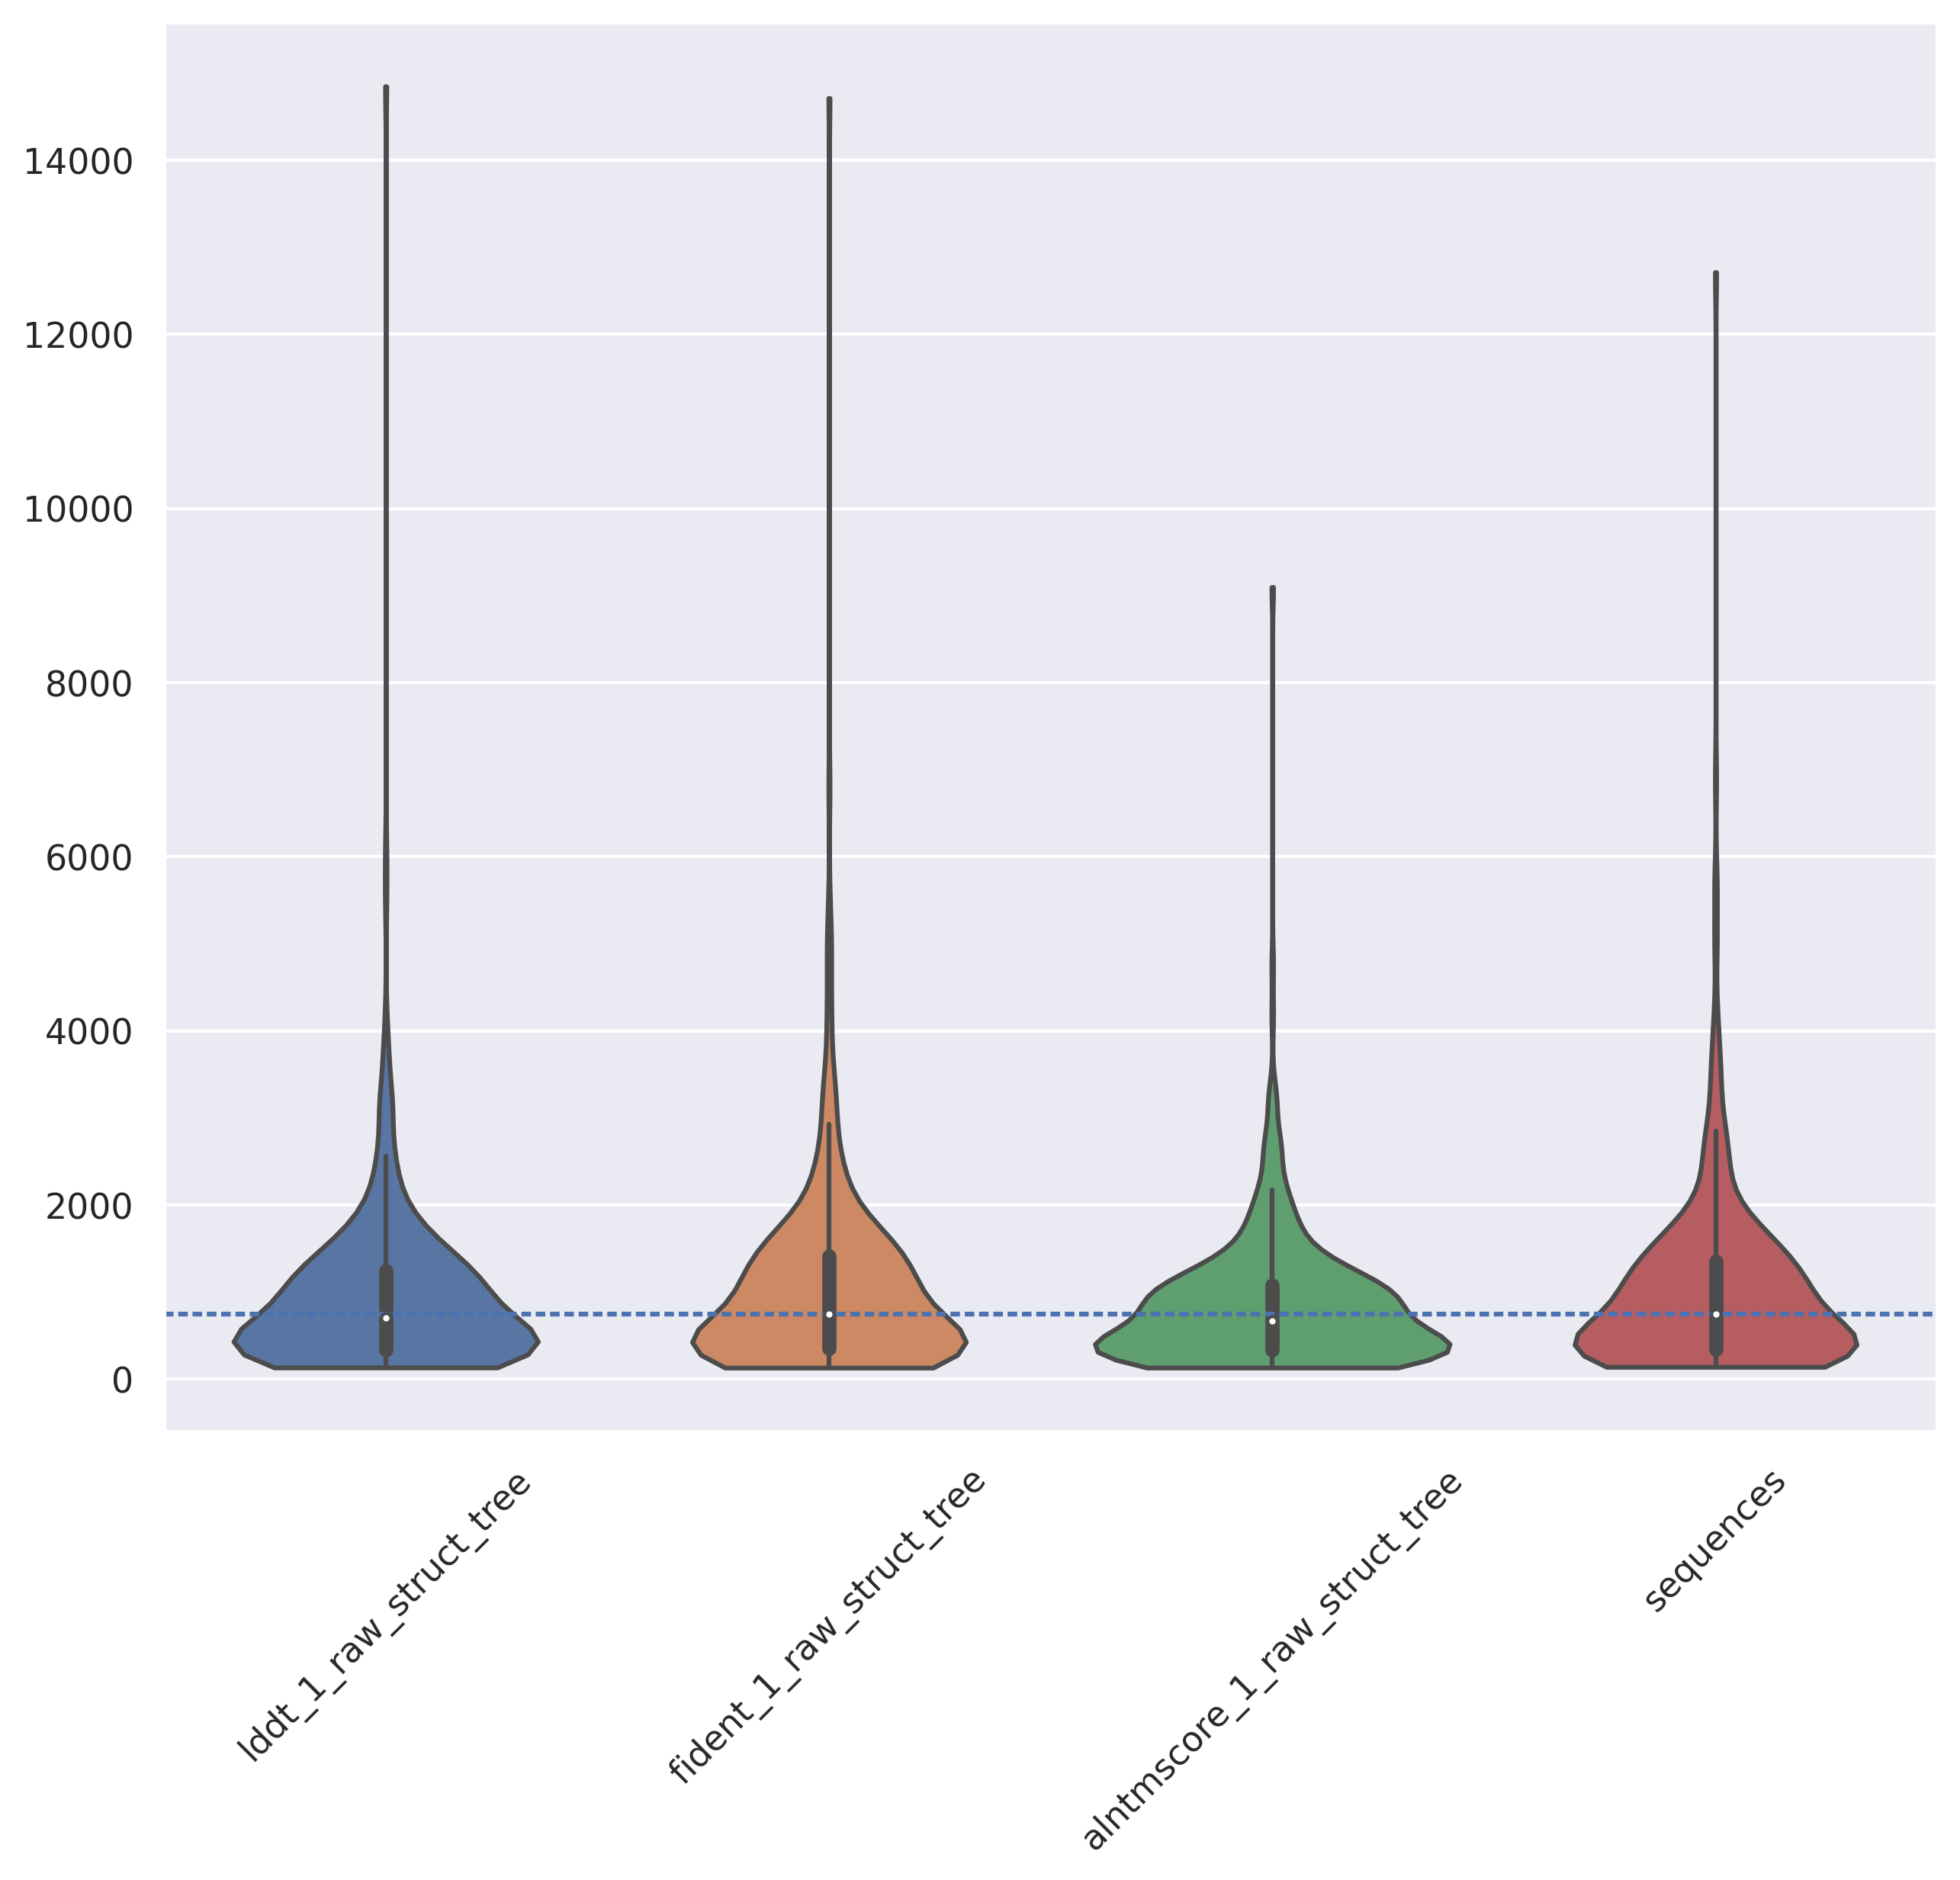

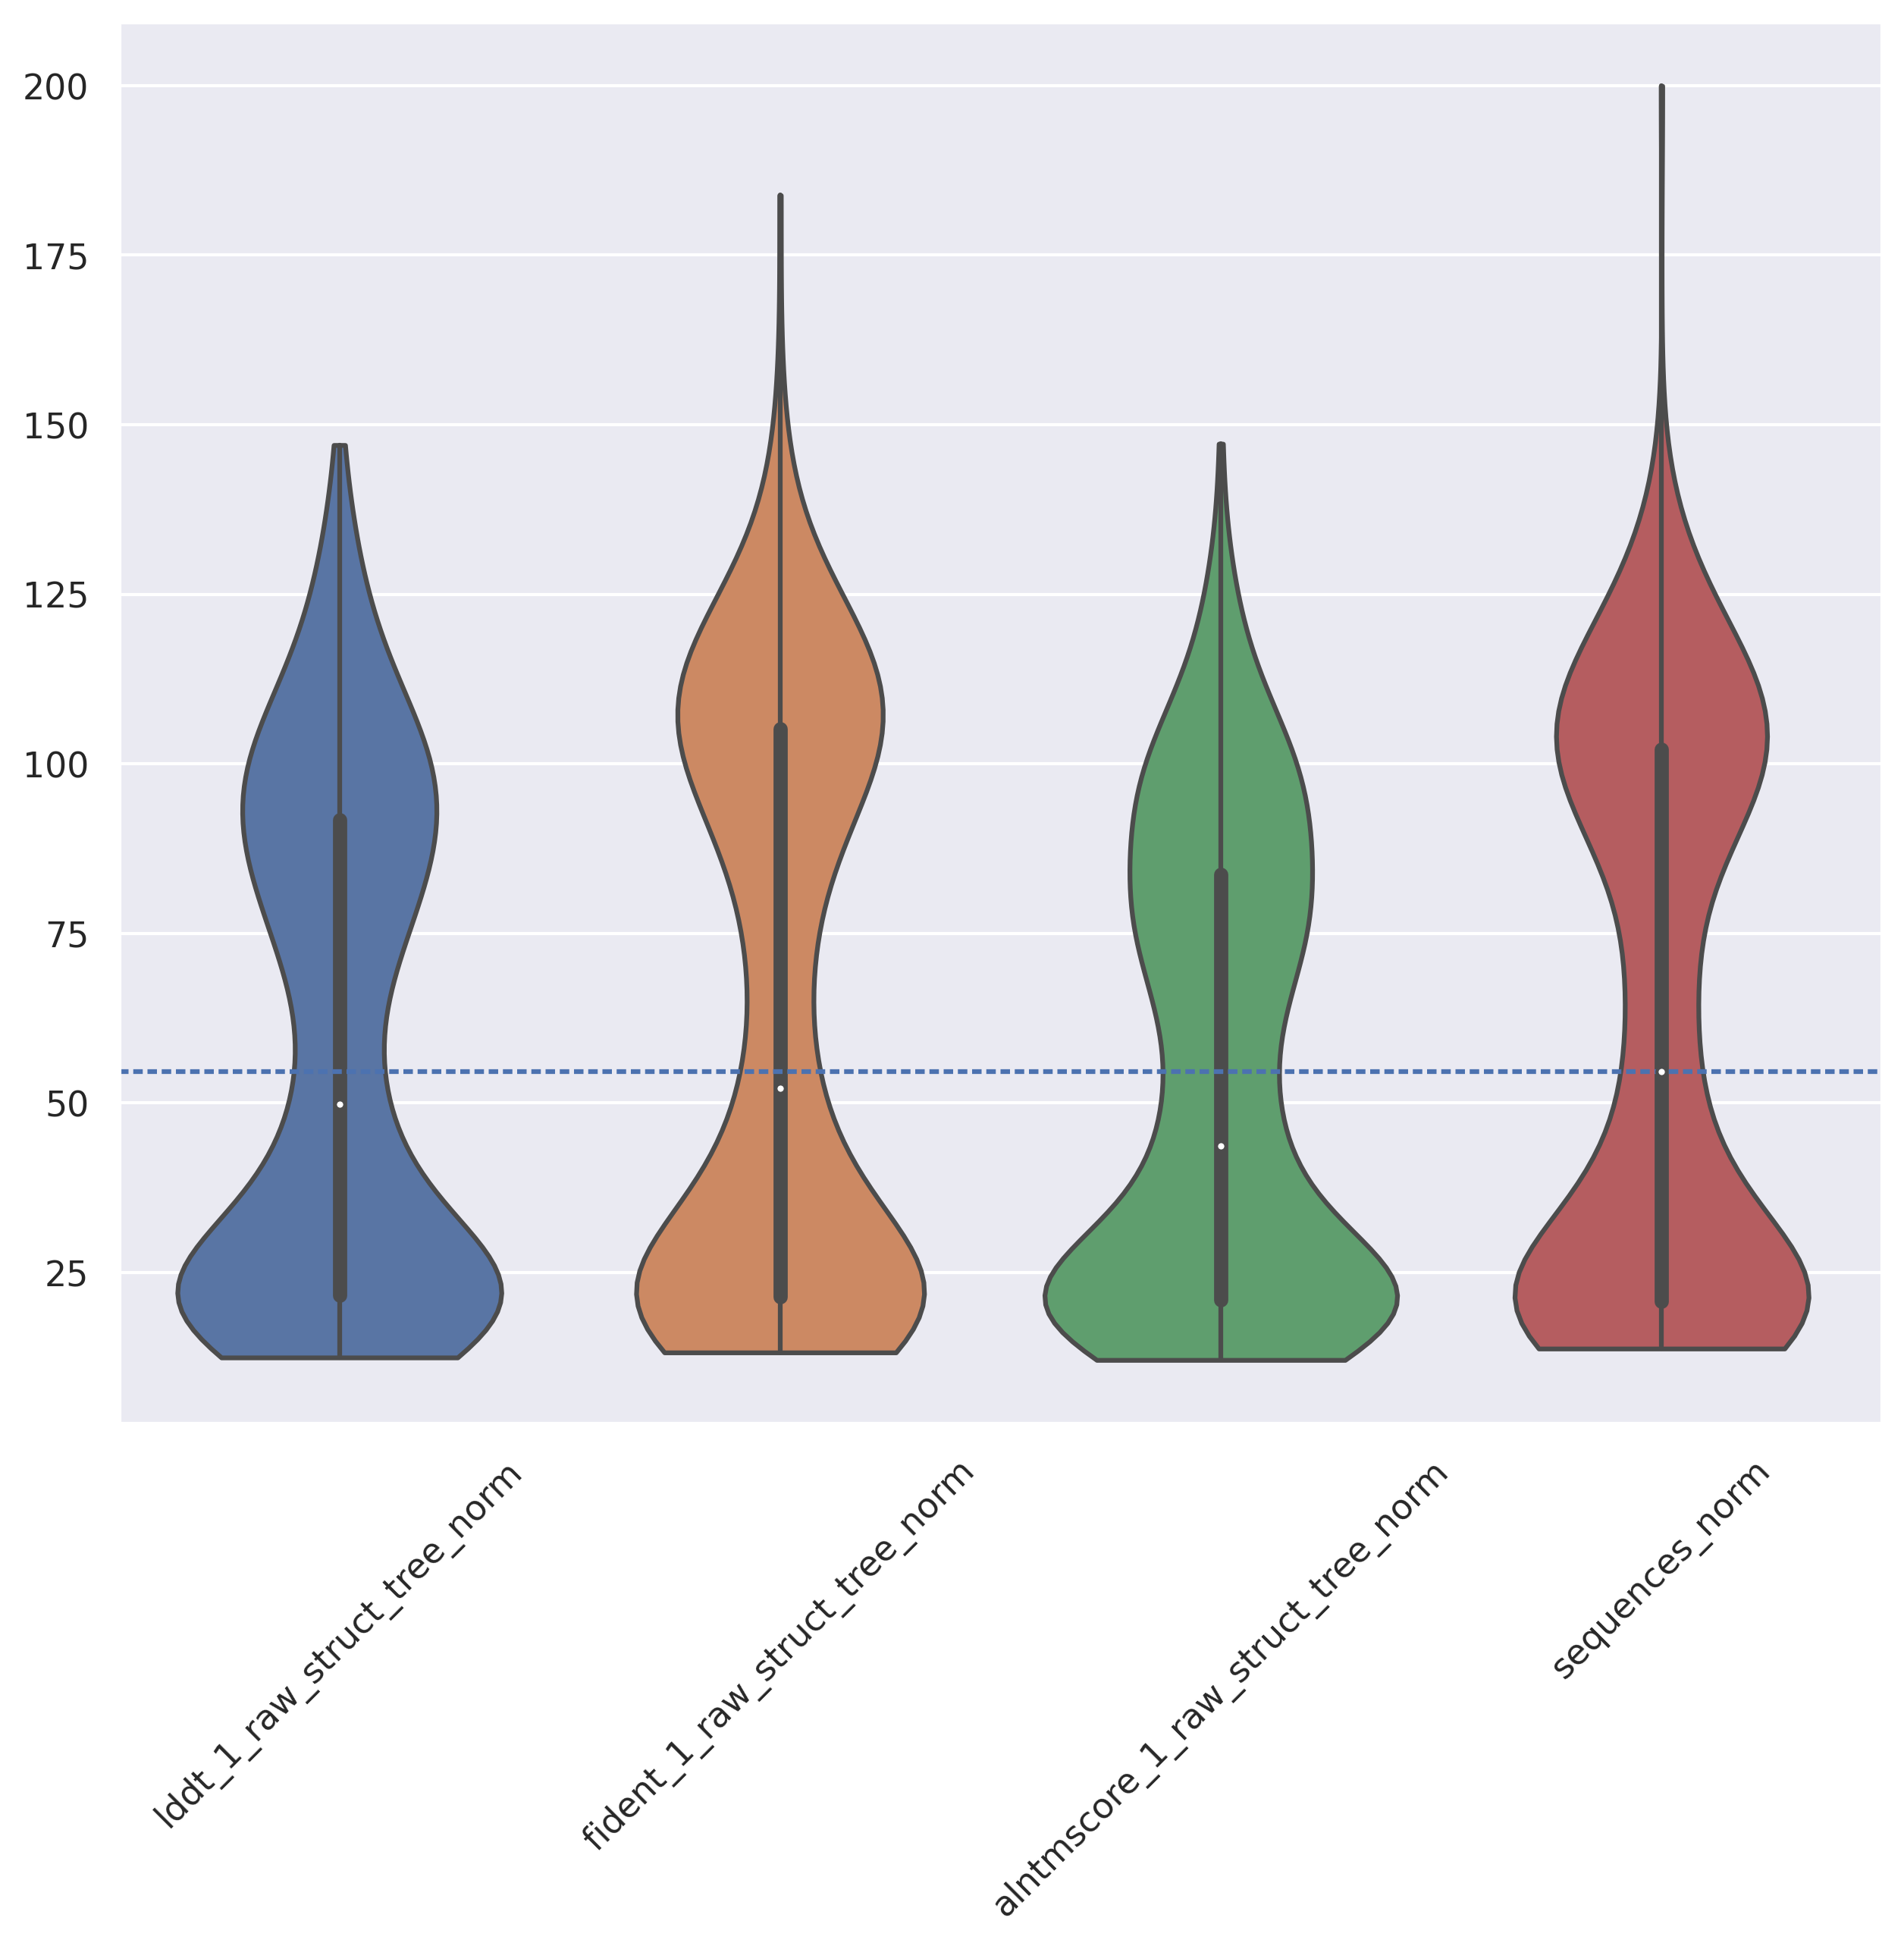

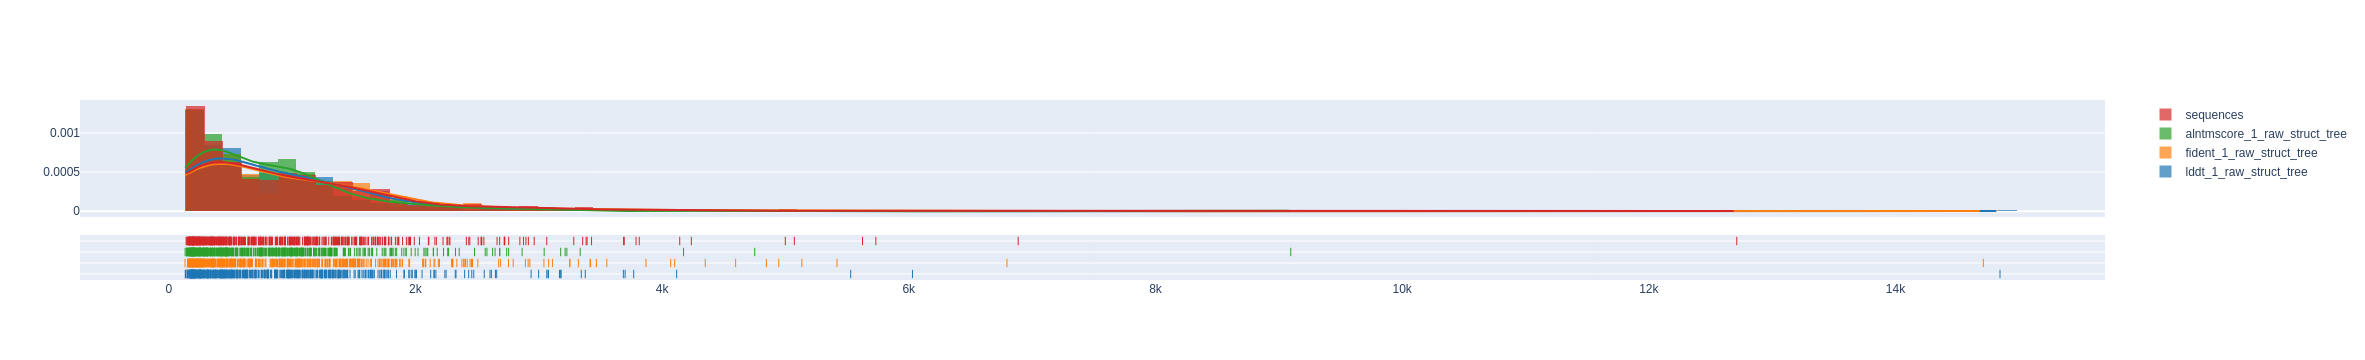

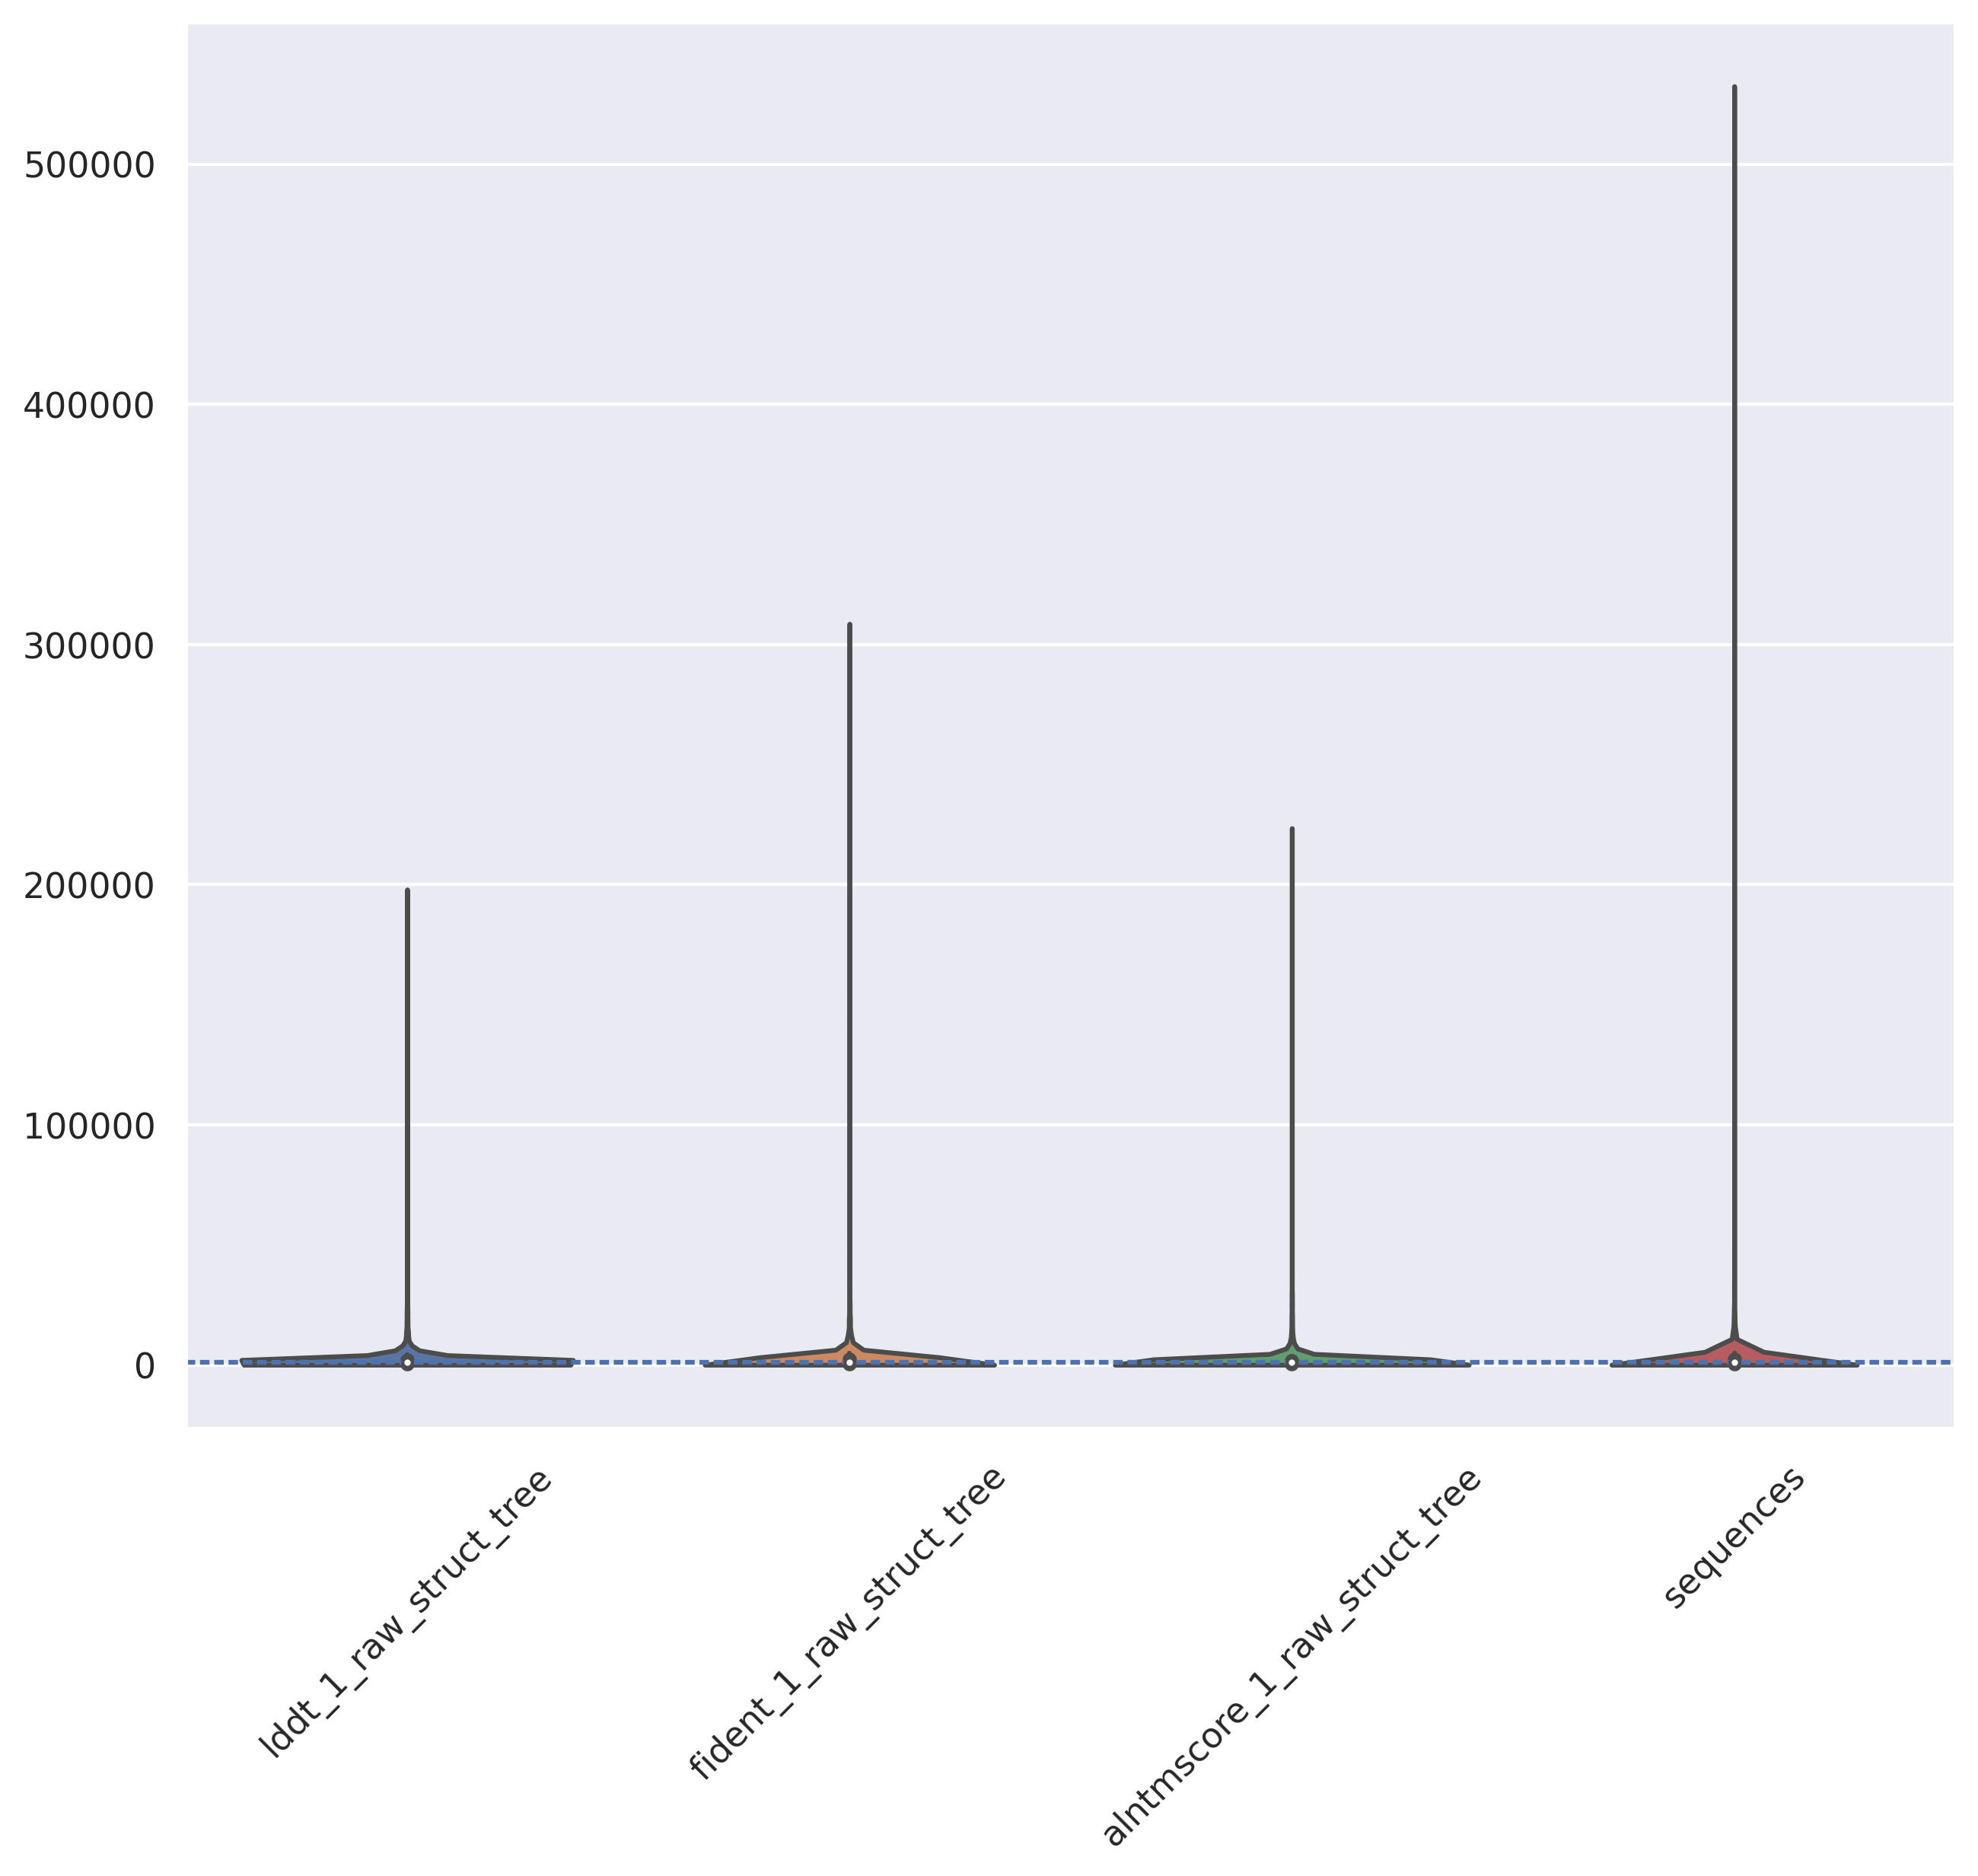

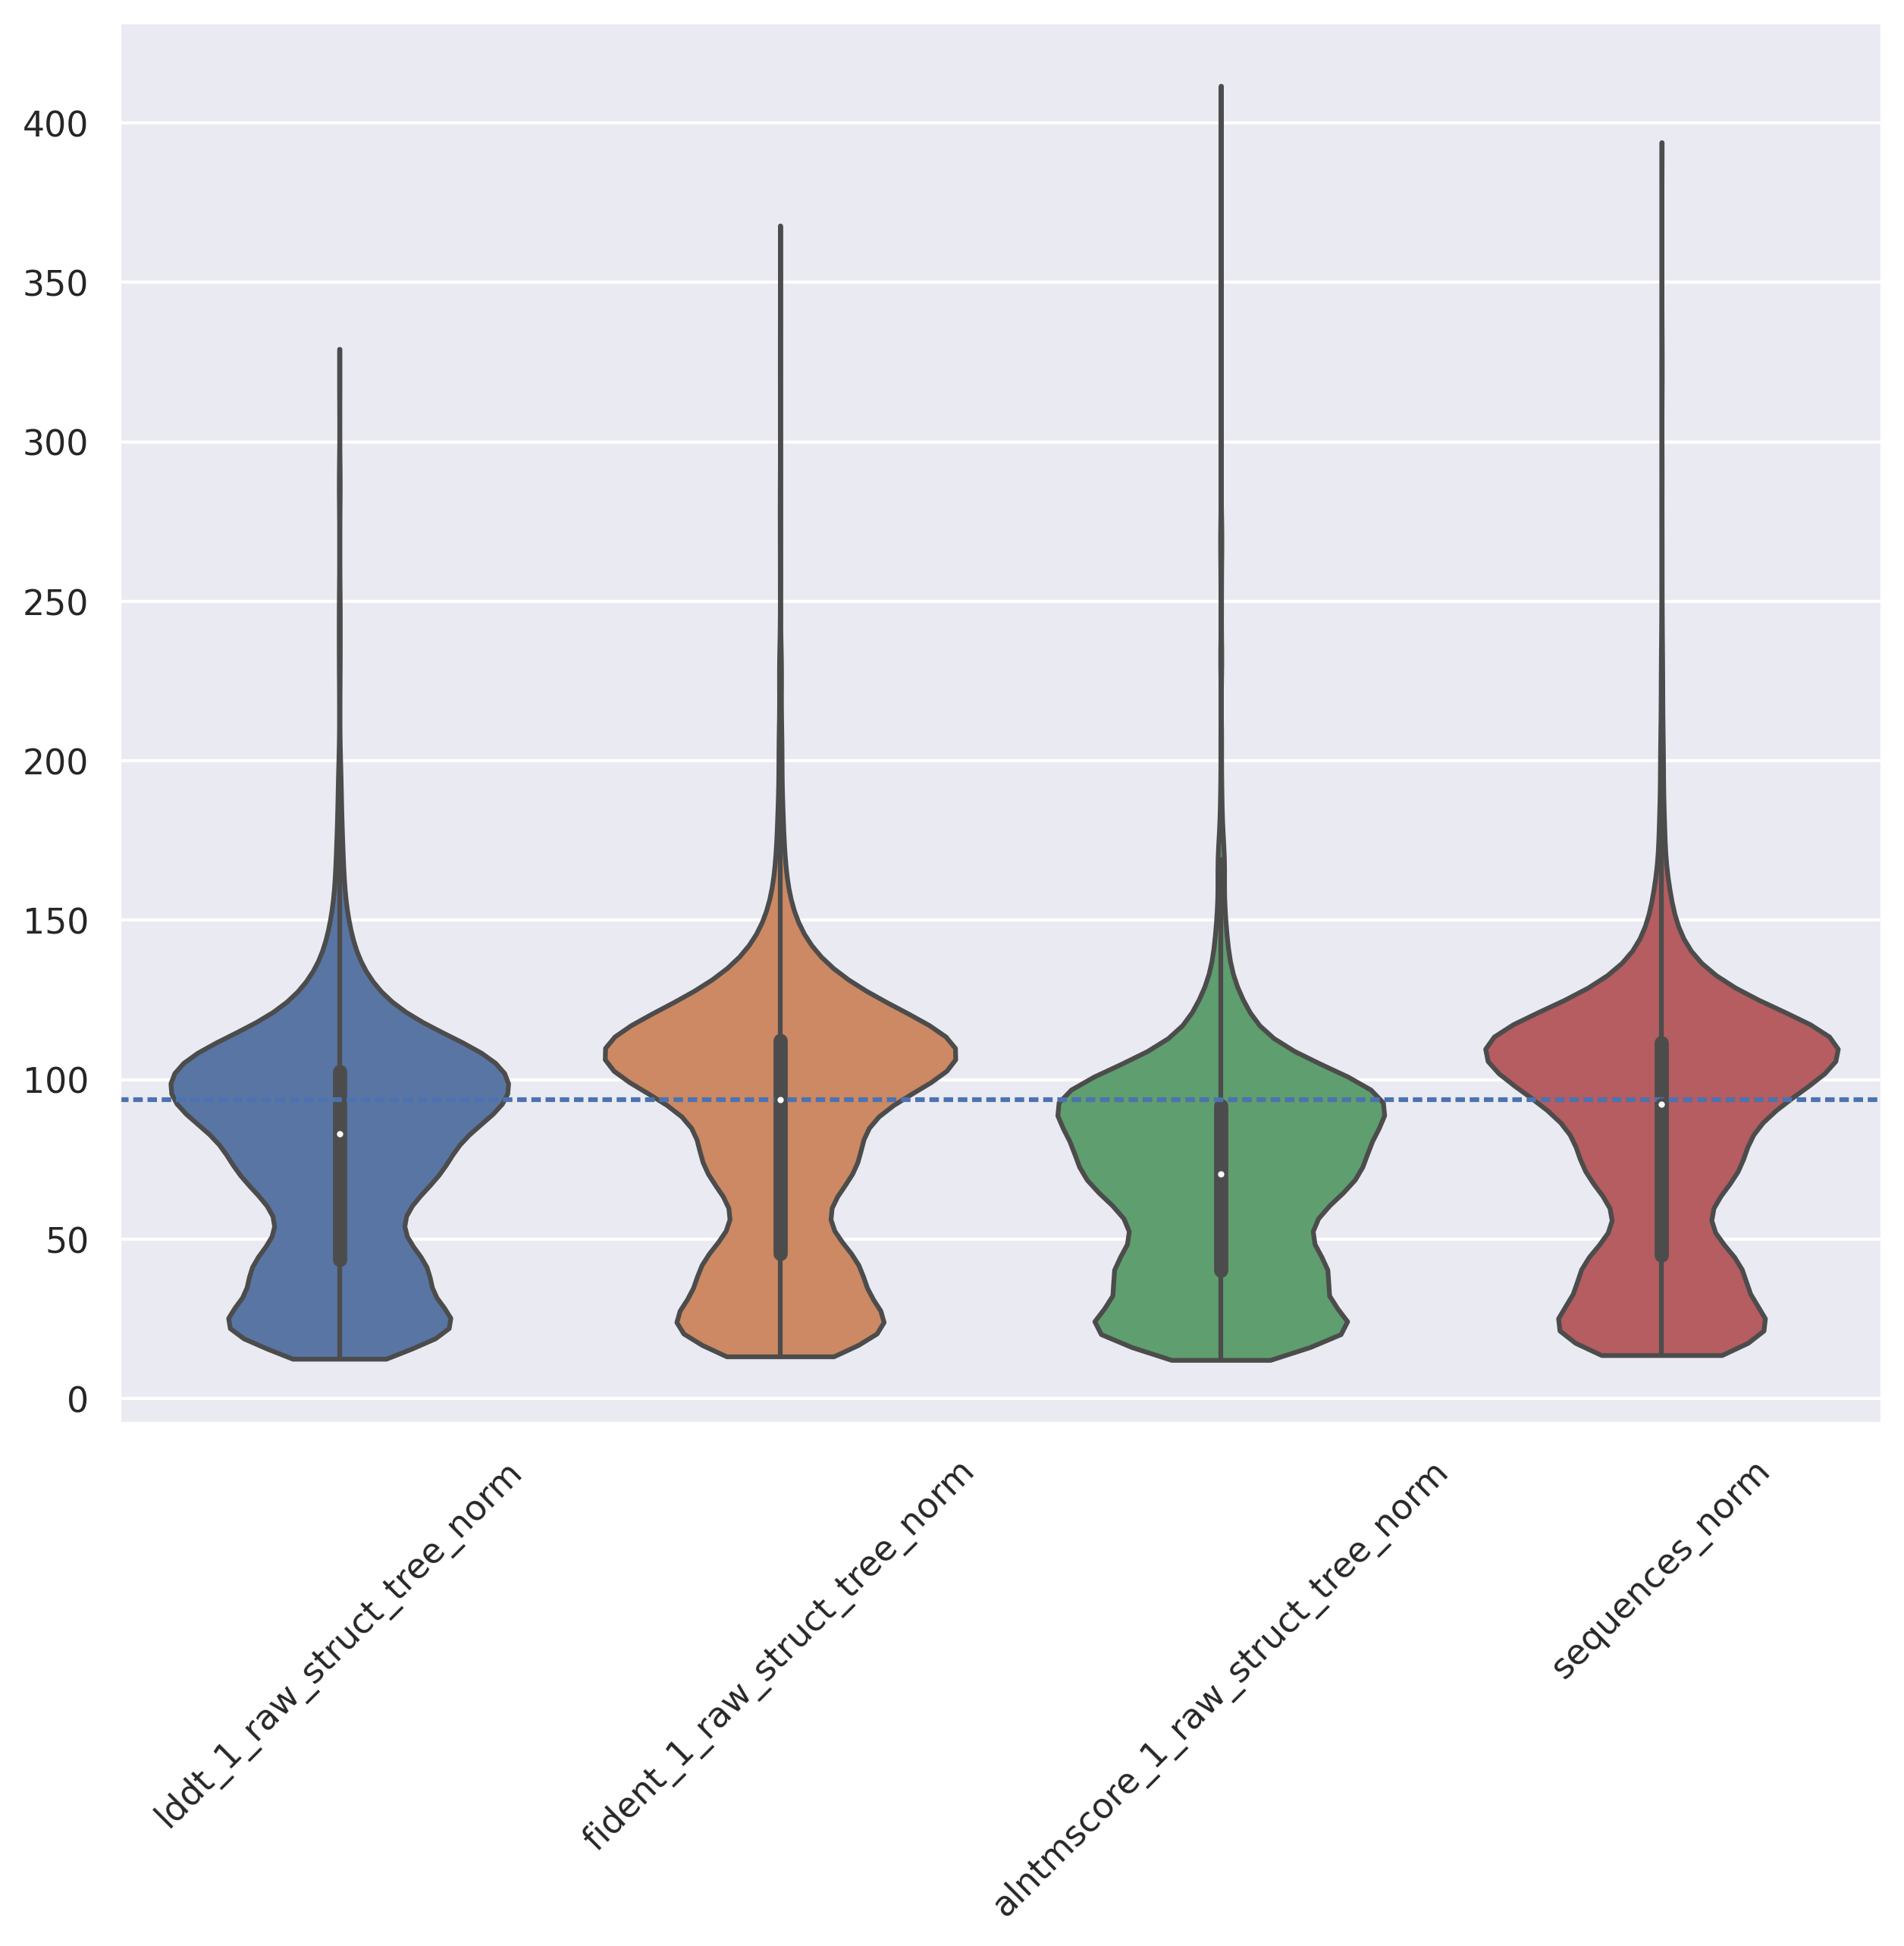

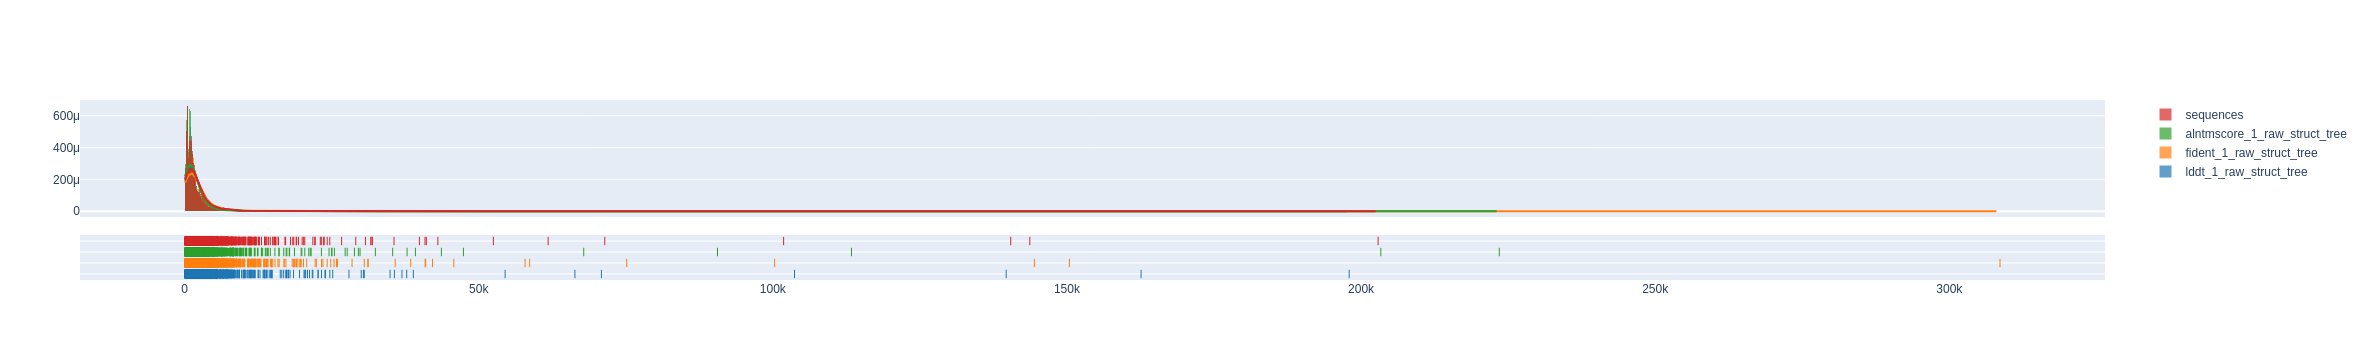

<Figure size 3000x2400 with 0 Axes>

In [29]:
#todo iterate over hogs and cath and train a model
cladefolders = set(glob.glob( '../OMA_data/*/' ))-set([ '../OMA_data/logs/' ])
cladefolders = cladefolders.union( set(glob.glob( '../OMA_data_unfiltered/OMA_data/*/' )) - set([ '../OMA_data_unfiltered/OMA_data/logs/' ]) )
print(cladefolders)
OMADF = compile_results(cladefolders , scorefunc = 'root_score' )

In [ ]:
#save cat , cath and omadf

catdf.to_pickle('catdf.pkl')
cathdf.to_pickle('cathdf.pkl')

In [8]:
OMADF.to_pickle('omadf.pkl')

In [ ]:
catdf = pd.read_pickle('catdf.pkl')
cathdf = pd.read_pickle('cathdf.pkl')
OMADF = pd.read_pickle('omadf.pkl')

In [9]:
import seaborn as sns
filtereddf  = OMADF[OMADF.filtered == True]
unfiltereddf  = OMADF[OMADF.filtered == False]

In [12]:
print(len(filtereddf) , len(unfiltereddf))

4640 505


In [22]:
print(list(filtereddf.columns))

['alntmscore_0_raw_struct_tree', 'alntmscore_0_exp_struct_tree', 'alntmscore_1_exp_struct_tree', 'fident_0_raw_struct_tree', 'lddt_0_exp_struct_tree', 'lddt_1_exp_struct_tree', 'fident_0_exp_struct_tree', 'lddt_1_raw_struct_tree', 'fident_1_raw_struct_tree', 'fident_1_exp_struct_tree', 'alntmscore_1_raw_struct_tree', 'lddt_0_raw_struct_tree', 'sequences', 'sequences.aln.fst.treefile.rooted', 'nseqs', 'alntmscore_0_raw_struct_tree_norm', 'alntmscore_0_exp_struct_tree_norm', 'alntmscore_1_exp_struct_tree_norm', 'fident_0_raw_struct_tree_norm', 'lddt_0_exp_struct_tree_norm', 'lddt_1_exp_struct_tree_norm', 'fident_0_exp_struct_tree_norm', 'lddt_1_raw_struct_tree_norm', 'fident_1_raw_struct_tree_norm', 'fident_1_exp_struct_tree_norm', 'alntmscore_1_raw_struct_tree_norm', 'lddt_0_raw_struct_tree_norm', 'sequences_norm', 'sequences.aln.fst.treefile.rooted_norm', 'alntmscore_0_raw_struct_tree_alntmscore_0_exp_struct_tree_delta', 'alntmscore_0_raw_struct_tree_alntmscore_0_exp_struct_tree_max', 

In [26]:
def ret_winner(r, score1 , score2):
    if r[score1] < r[score2]:
        return 'Struct better'
    if r[score1] > r[score2]:
        return 'Seq better'
    if r[score1] == r[score2]:
        return 'Equal'
    
def retgraph(s1,s2 , filtereddf , xlabel , ylabel, title):
    sns.set_style("whitegrid")
    palette = { 'Struct better' : 'blue'  , 'Seq better' : 'red' , 'Equal' : 'green'}
    markers= {'markers' : {  'Struct better' : 'o'  , 'Seq better' : 'x' , 'Equal' : 'D'}}
    plt.rcParams['figure.dpi'] = 300

    
    filtereddf['structure better'] = filtereddf.apply( ret_winner , args = ( s1,  s2) , axis = 1)
    # Count the occurrences of each item
    category_counts = dict(filtereddf['structure better'].value_counts())
    totalpts = len(filtereddf['structure better'])
    ax = sns.scatterplot( data =filtereddf ,  x=s1 , y=s2 
    , hue = 'structure better'  , alpha = .15 , palette=palette  , s=10 )
    
    ax.set_box_aspect(1)
    
    handles, labels = ax.get_legend_handles_labels()
    print(handles,labels)
    
    for i, label in enumerate(labels):
        count = category_counts[label]
        labels[i] = f"{label} ({count} , {int(100*count/totalpts)}%)"
    #labels.sort()
    
    ax.legend(handles=handles, labels=labels ,fontsize='medium')
    
    
    # Update the legend labels with the count information
    #ax.legend(loc='upper left')
    
    ax.set_title(title ,fontsize=20)
    ax.set_ylabel(ylabel ,fontsize=17)
    ax.set_xlabel(xlabel ,fontsize=17)
    
    plt.plot([0,370] ,[0,370]  , alpha = .25)
    ax.set_ylim(1, 370)
    ax.set_xlim(1, 370)
    
    plt.savefig('../figures/'+title.replace(' ', '_')+'.svg')
    plt.show()

    

In [14]:
#species tree discordance for cat dataset
retgraph(  'sequences_norm' , 'fident_1_raw_struct_tree_norm' ,  catdf
         ,'Sequence TCS' ,  'Foldtree TCS',  'CAT Sequence vs Foldtree ')
retgraph(  'sequences_norm' , 'lddt_1_raw_struct_tree_norm' ,  catdf
         ,'Sequence TCS' ,  'LDDT TCS',  'CAT Sequence vs LDDT ')
retgraph(  'sequences_norm' , 'alntmscore_1_raw_struct_tree_norm' ,  catdf
         ,'Sequence TCS' ,  'TM TCS',  'CAT Sequence vs TM ')



NameError: name 'catdf' is not defined

In [15]:
#species tree discordance for cat dataset
retgraph(  'sequences_norm' , 'fident_1_raw_struct_tree_norm' ,  cathdf
         ,'Sequence TCS' ,  'Foldtree TCS',  'CATH Sequence vs Foldtree ')
retgraph(  'sequences_norm' , 'lddt_1_raw_struct_tree_norm' ,  cathdf
         ,'Sequence TCS' ,  ' LDDT TCS',  'CATH Sequence vs LDDT ')
retgraph(  'sequences_norm' , 'alntmscore_1_raw_struct_tree_norm' ,  cathdf
         ,'Sequence TCS' ,  'TM TCS',  'CATH Sequence vs TM ')

NameError: name 'cathdf' is not defined

[<matplotlib.collections.PathCollection object at 0x7fb18f083730>, <matplotlib.collections.PathCollection object at 0x7fb18f083b80>, <matplotlib.collections.PathCollection object at 0x7fb18f083fd0>] ['Equal', 'Struct better', 'Seq better']


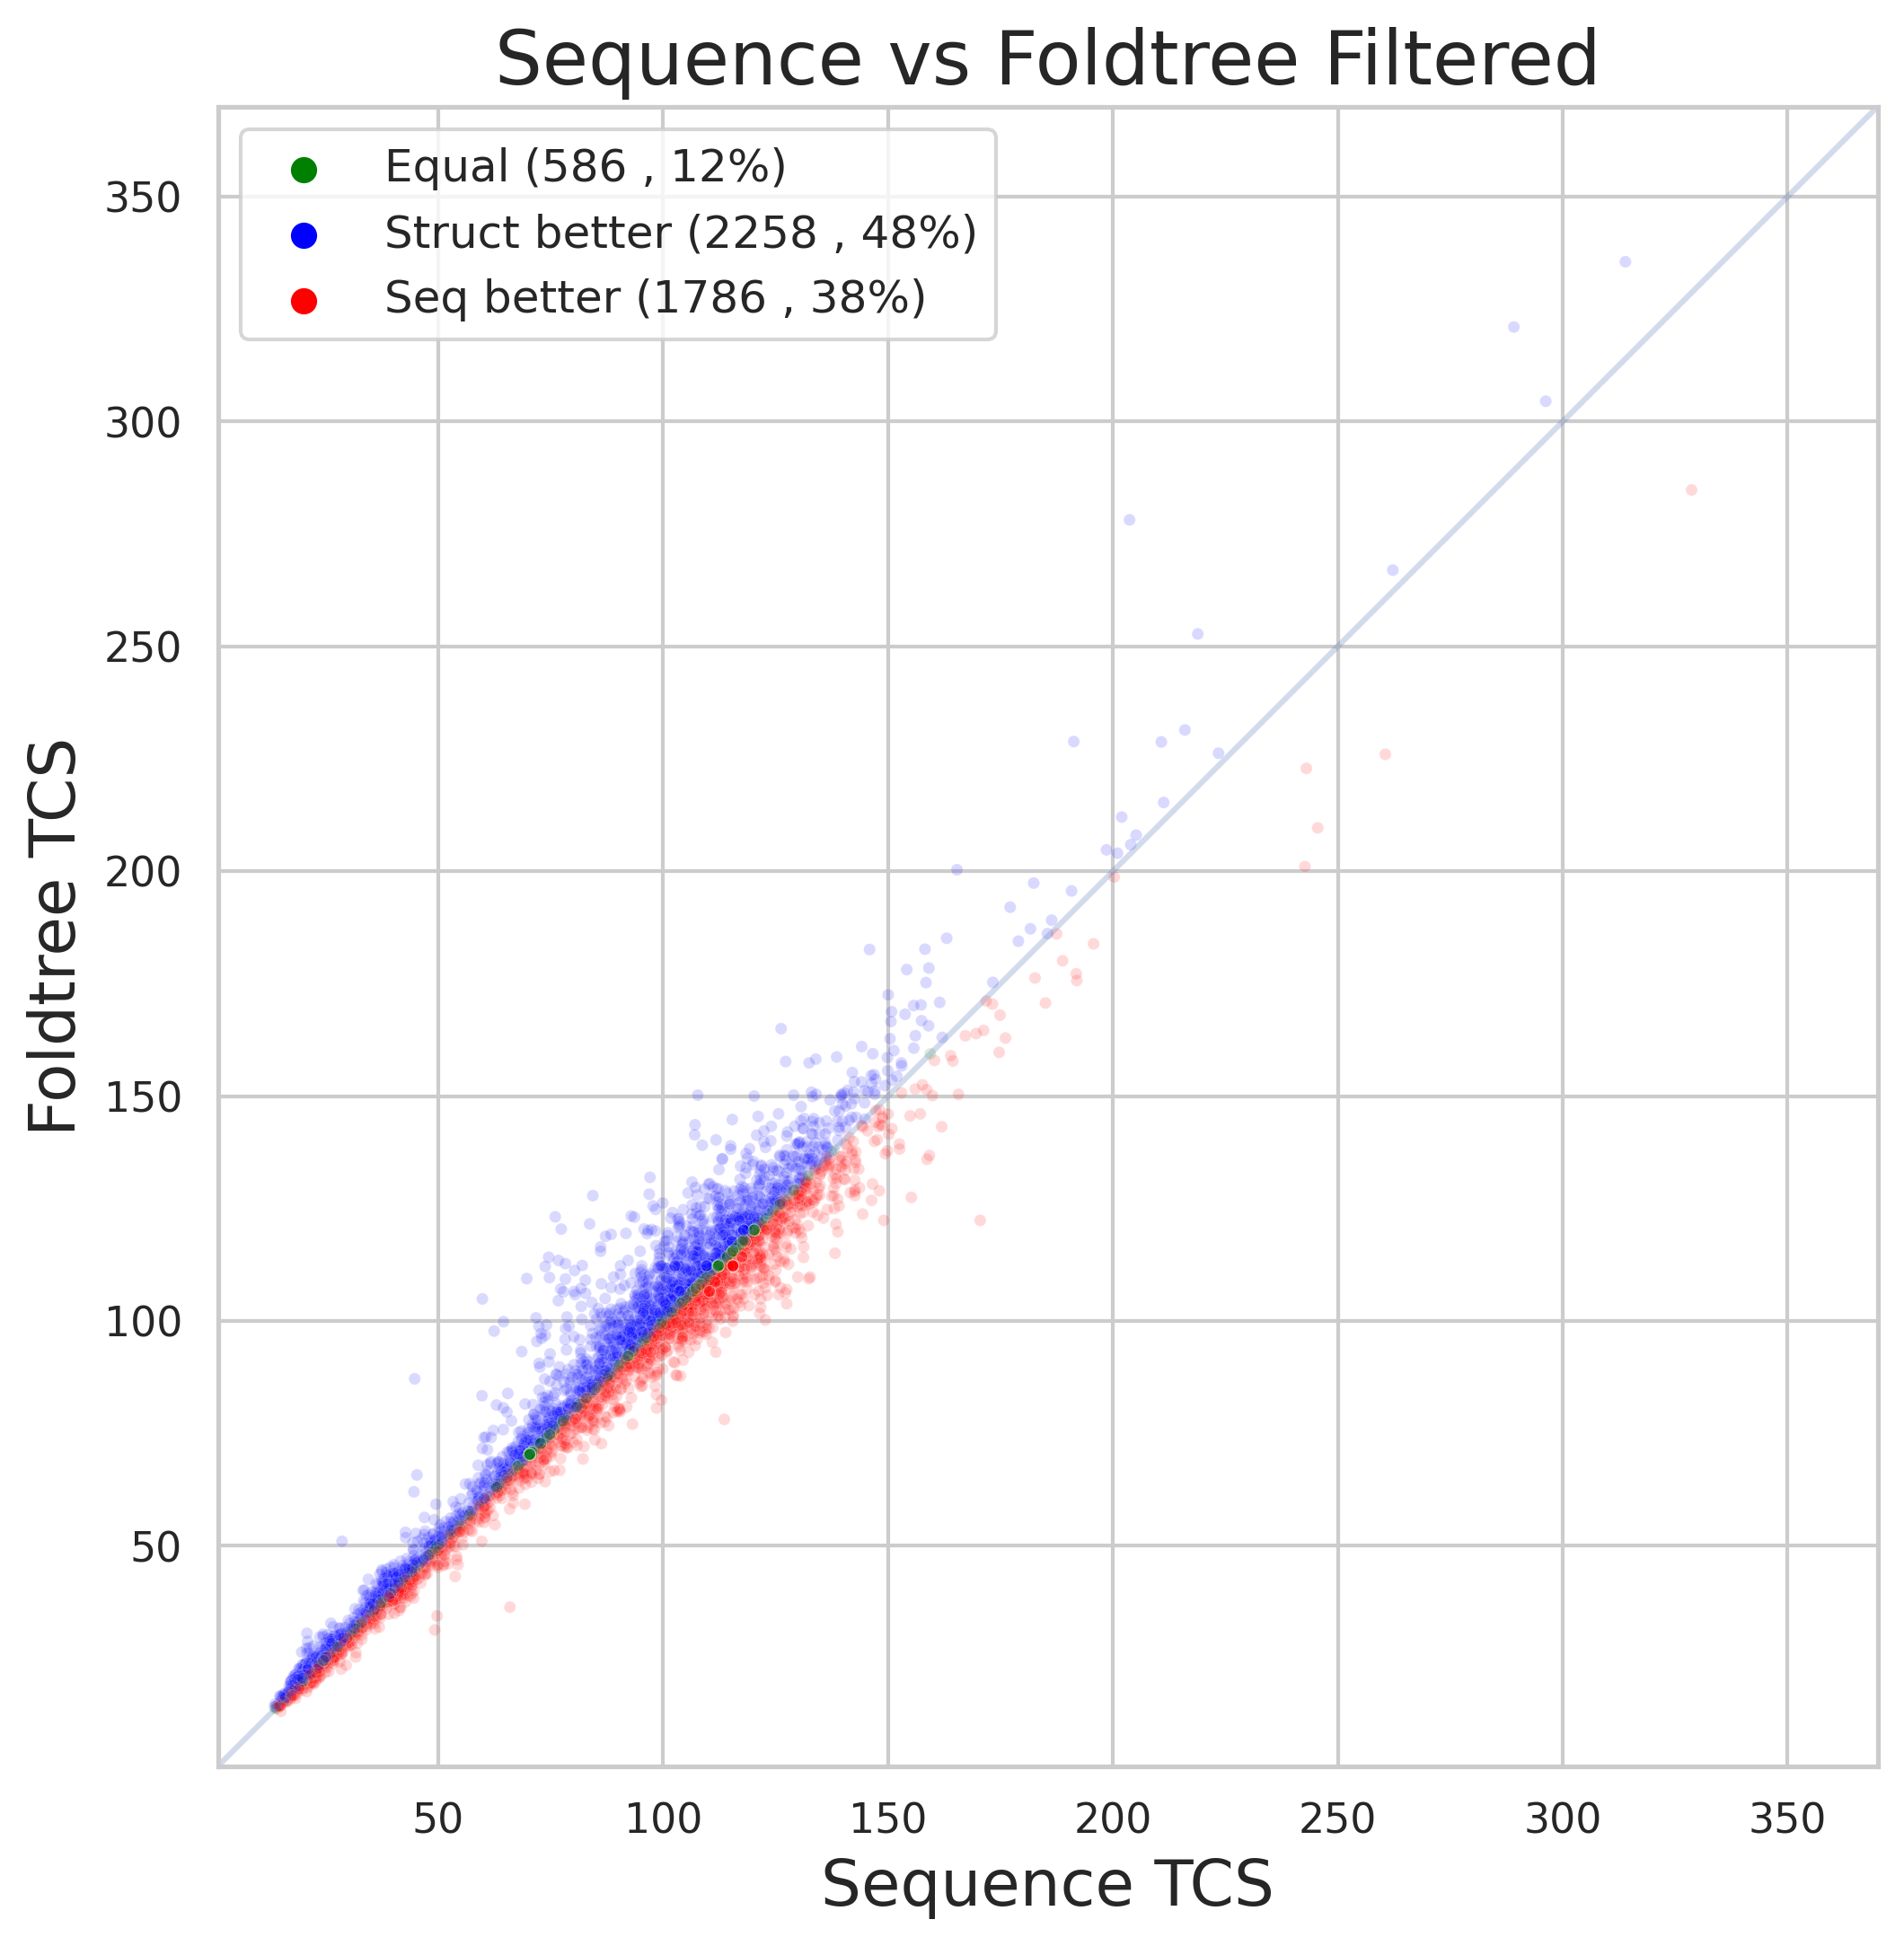

In [27]:
retgraph(  'sequences.aln.fst.treefile.rooted_norm' , 'fident_1_raw_struct_tree_norm' , filtereddf 
         ,'Sequence TCS' ,  'Foldtree TCS',  'Sequence vs Foldtree Filtered')

[<matplotlib.collections.PathCollection object at 0x7fb18ef2c760>, <matplotlib.collections.PathCollection object at 0x7fb18ef2cbb0>, <matplotlib.collections.PathCollection object at 0x7fb18ef2d000>] ['Seq better', 'Struct better', 'Equal']


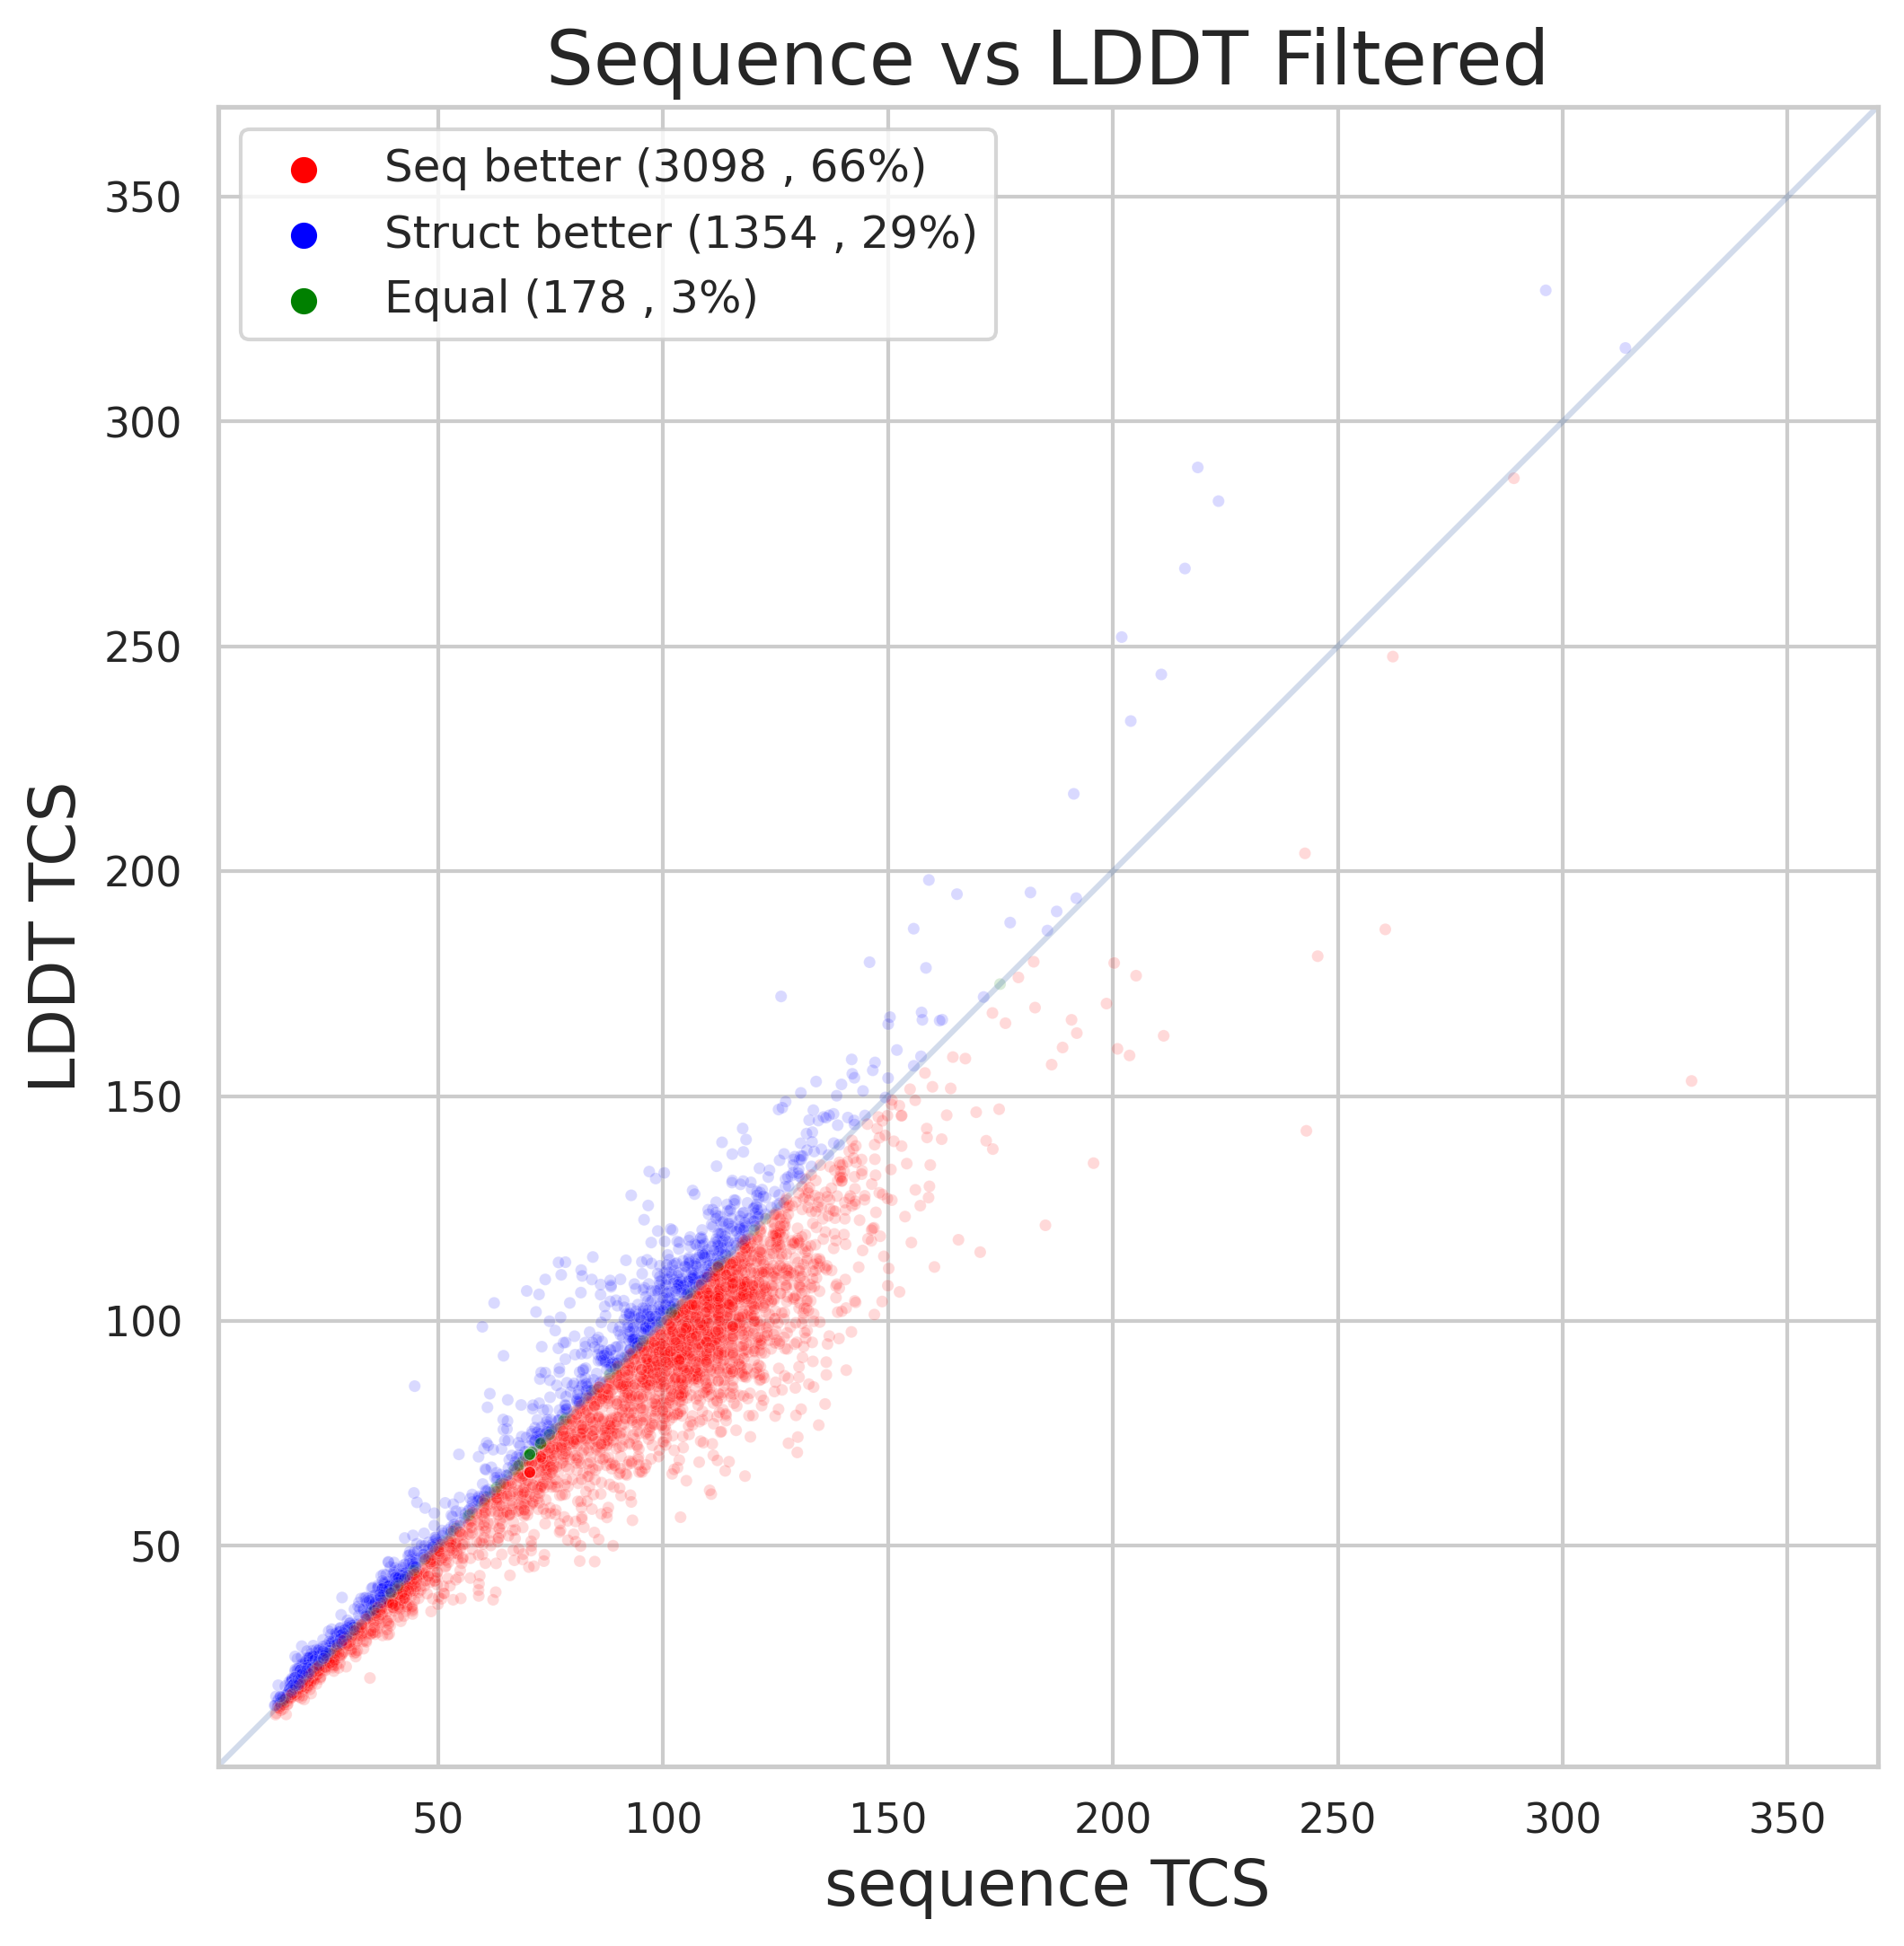

In [28]:

retgraph(  'sequences.aln.fst.treefile.rooted_norm' , 'lddt_1_raw_struct_tree_norm' , filtereddf 
         ,'sequence TCS' ,  'LDDT TCS',  'Sequence vs LDDT Filtered')

[<matplotlib.collections.PathCollection object at 0x7fb18f0601c0>, <matplotlib.collections.PathCollection object at 0x7fb18eeb3280>, <matplotlib.collections.PathCollection object at 0x7fb18eeb3d60>] ['Seq better', 'Struct better', 'Equal']


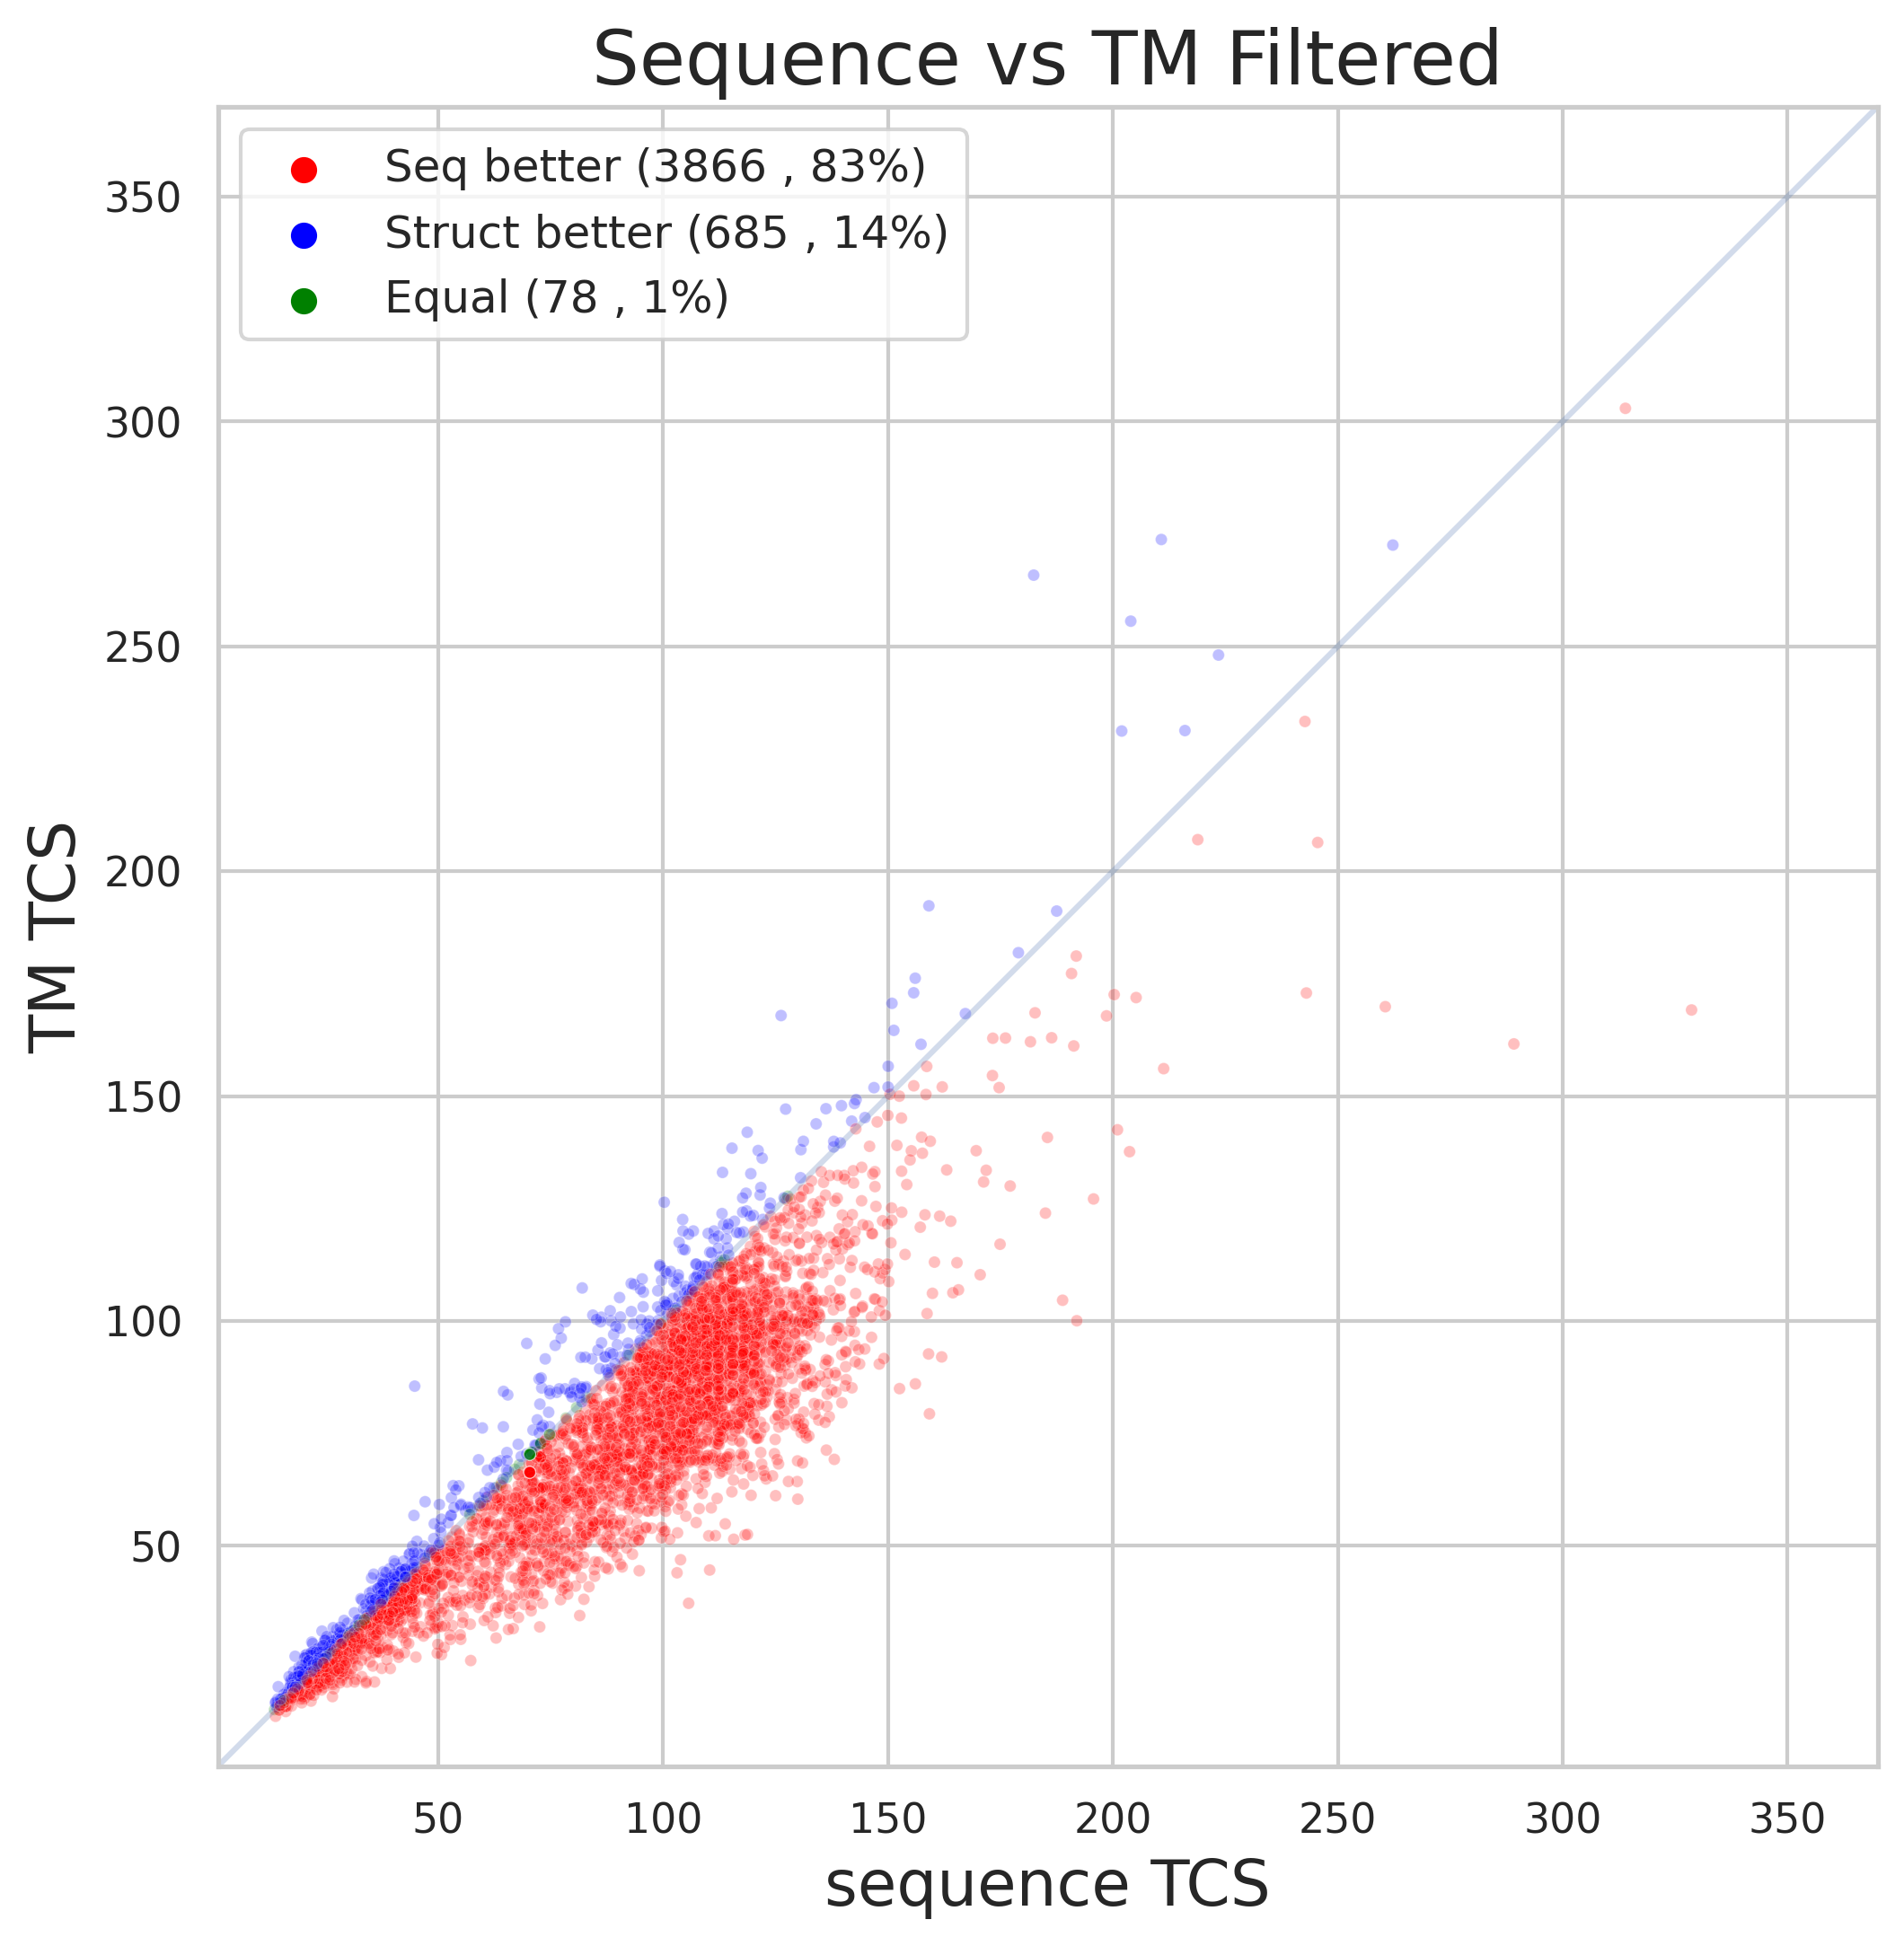

In [25]:

retgraph(  'sequences.aln.fst.treefile.rooted_norm' , 'alntmscore_1_raw_struct_tree_norm' , filtereddf 
         ,'sequence TCS' ,  'TM TCS',  'Sequence vs TM Filtered')


In [ ]:
retgraph(  'sequences_norm' , 'fident_1_raw_struct_tree_norm' , unfiltereddf 
         ,'sequence TCS' ,  'Foldtree TCS',  'Sequence vs Foldtree UnFiltered')

In [ ]:
retgraph(  'sequences_norm' , 'lddt_1_raw_struct_tree_norm' , unfiltereddf 
         ,'sequence TCS' ,  'LDDT TCS',  'Sequence vs LDDT UnFiltered')

In [ ]:
retgraph(  'sequences_norm' , 'alntmscore_1_raw_struct_tree_norm' , unfiltereddf 
         ,'sequence TCS' ,  'TM TCS',  'Sequence vs TM UnFiltered')

In [ ]:
#species tree discordance for cat dataset
retgraph(  'sequences_norm' , 'fident_1_exp_struct_tree_norm' ,  unfiltereddf
         ,'Sequence TCS' ,  'corr. Foldtree TCS',  'Sequence vs corrected Foldtree ')
retgraph(  'sequences_norm' , 'lddt_1_exp_struct_tree_norm' ,  unfiltereddf
         ,'Sequence TCS' ,  'corr. LDDT TCS',  'Sequence vs corrected LDDT ')
retgraph(  'sequences_norm' , 'alntmscore_1_exp_struct_tree_norm' ,  unfiltereddf
         ,'Sequence TCS' ,  'corr. TM TCS',  'Sequence vs corrected TM ')

In [ ]:
#species tree discordance for cat dataset
retgraph(  'sequences_norm' , 'fident_0_raw_struct_tree_norm' ,  unfiltereddf
         ,'Sequence TCS' ,  'Foldtree TCS',  'Sequence vs Foldtree mode 0')
retgraph(  'sequences_norm' , 'lddt_0_raw_struct_tree_norm' ,  unfiltereddf
         ,'Sequence TCS' ,  'LDDT TCS',  'Sequence vs LDDT mode 0')
retgraph(  'sequences_norm' , 'alntmscore_0_raw_struct_tree_norm' ,  unfiltereddf
         ,'Sequence TCS' ,  'TM TCS',  'Sequence vs TM mode 0')

In [ ]:
unfiltereddf['level'] = unfiltereddf.index.map( lambda x: x.split('/')[2])
print(unfiltereddf['level'].unique() )
for l in unfiltereddf['level'].unique():
    sub = unfiltereddf[unfiltereddf.level == l ]
    #species tree discordance for cat dataset
    retgraph(  'sequences_norm' , 'fident_1_raw_struct_tree_norm' ,  sub
         ,'Sequence TCS' ,  'Foldtree TCS',  'Sequence vs Foldtree '+ l)

In [ ]:
#characterise the ultrametricity of the tree
#todo iterate over hogs and cath and train a model
from compile_treeset import compile_folder_treestats
import pandas as pd
cladefolders = set(glob.glob( '../OMA_data/*/' ))-set([ '../OMA_data/logs/' ])
cladefolders = cladefolders.union( set(glob.glob( '../OMA_data_unfiltered/OMA_data/*/' )) - set([ '../OMA_data_unfiltered/OMA_data/logs/' ]) )
dfs = []
for folder in cladefolders:
    print(folder)
    OMA_treestat_DF = compile_folder_treestats( folder, verbose = False  )
    dfs.append(OMA_treestat_DF)
OMA_treestats = pd.concat(dfs)
print(OMA_treestats)

In [ ]:
cladefolders = [ '../CAT_data/' ,'../CATH_data/' ]
dfs = []
for folder in cladefolders:
    print(folder)
    CATH_treestat_DF = compile_folder_treestats( folder, verbose = False  )
    dfs.append(CATH_treestat_DF)
CATH_treestats = pd.concat(dfs)

In [ ]:
treestats_df = OMA_treestats.dropna()
print(len(treestats_df))

In [ ]:
metrics = 'nobsint,minmax,mean,variance,skewness,kurtosis'
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
cols = []
for c in treestats_df.columns:
    if 'nseqs' not in c and 'var' not in c and '0' not in c:# and 'exp' not in c:
        treestats_df[c+'var'] = treestats_df[c].map( lambda x : x[3] )
        cols.append(c+'var')
        #plt.hist( treestats_df[c+'var'] , alpha = .25 , label = c, density = True , bins = 20)
#plt.title( 'Variance of normalized Root to Leaf distance')
#plt.legend()
#plt.show()

In [ ]:
fig, axs = plt.subplots(len(cols), 1, sharex=True,sharey=True, tight_layout=True)
df = treestats_df[cols]
bins=np.histogram(df, bins=500)[1] #get the bin edges
for i,col in enumerate(cols):
    data = df[col] 
    #data[data>.25]= .25
    axs[i].set_box_aspect(.175)

    axs[i].set_xlim(0,.10)
    axs[i].hist( df[col] , bins=bins)
    axs[i].set_title(col)
    if i == len(cols)-1:
        axs[i].set_xlabel('RTT variance')
    #axs[i].set_ylabel('n Trees')

plt.savefig('../figures/ultrametricity_hist_all.svg')
plt.show()


In [ ]:
import toytree
import toyplot
import numpy as np
import toyplot.svg

#select random fams
sub = treestats_df.sample(20)



for idx,r in sub.iterrows():
    
    nwks = glob.glob(idx+'*.nwk.rooted')
    trees = []
    kept= []
    for nwk in nwks:
        if '1_raw' in nwk or 'sequences' in nwk:
            kept.append(nwk)
            trees.append(toytree.tree(nwk , format = 0))
    mtre0 = toytree.mtree( trees )
    
    for tree in mtre0.treelist:
        for n in tree.treenode.traverse():
            if n.is_leaf():
                n.size = 5
                n.color = 'red'
            else:
                n.size = 0
                n.color = 'black'
        sizes = tree.get_node_values("size", show_root=True, show_tips=True)
        colors = tree.get_node_values("color", show_root=True, show_tips=True)
        
        tree.style.node_sizes = sizes
        
        
    canvas,axes,mark = mtre0.draw( ncols=len(cols) ,tip_labels=False ,edge_style={"stroke-opacity": 1, "stroke-width": .5}  ,  height=100 , node_colors= 'red')
    '''tip_labels_align=True, edge_align_style={
        "stroke": "violet",
        "stroke-width": 0,
        "stroke-dasharray": "2,5"    # size of dash, spacing of dashes
    } )'''
    print(kept)
    #toyplot.svg.render(canvas, '../figures/'+idx.replace('/' , '_').replace('.','')+'treesample.svg')
    
print(kept)

In [ ]:
#plt the OMA clades w and without filtering 
#plot the cat and cath and total oma with and without filtering


In [ ]:
#construct structure and sequence feature dataset
import tqdm

def ret_description(vec , label = ''):
    return { label+'_mean': np.mean(vec) , label+'_max': np.amax(vec) , label+'_min': np.amin(vec) ,label+'_var': np.var(vec) }

cladefolders = set(glob.glob( '../OMA_data/*/' ))-set([ '../OMA_data/logs/' ])
cladefolders = cladefolders.union( set(glob.glob( '../OMA_data_unfiltered/OMA_data/*/' )) - set([ '../OMA_data_unfiltered/OMA_data/logs/' ]) )
allfolders = cladefolders

dfs = []
print(allfolders)
for clade in allfolders:
    print(clade)
    res = {}
    folders = glob.glob(clade + '*/' )
    for folder in tqdm.tqdm_notebook(folders):
        if 'logs' not in folder:
            
            nstructs = len(glob.glob(folder+'structs/*.pdb'))
            try:
                with open(folder + 'sequences.fst') as fstin:
                    nseqs = fstin.read().count('>')
            except:
                nseqs = 0
            if nstructs == nseqs:
                if os.path.isfile(folder + 'plddt.json' ):
                    plddt_df = pd.read_json(folder + 'plddt.json').T
                    if len(plddt_df)>0:
                        plddt_df.columns = 'nobs,minmax,mean,variance,skewness,kurtosis'.split(',')
                        plddt_df['min'] = plddt_df.minmax.map( lambda r: r[0] )
                        plddt_df['max'] = plddt_df.minmax.map( lambda r: r[1] )
                        res[folder] = {}
                        for col in ['nobs', 'min' , 'max' , 'mean' , 'variance' , 'skewness' , 'kurtosis' ]:
                            descriptors = ret_description(plddt_df[col] , label = col)
                            for l in descriptors:
                                res[folder][l] = descriptors[l]
                        #add in some descriptors of the taxonomic spread and sequence set
                        seqdf = pd.read_csv(folder+'sequence_dataset.csv' )
                        res[folder]['nprots'] = len(seqdf)
                        cladesets = [ set(l.split(',')) for l in  seqdf['Taxonomic lineage (Ids)'] ]
                        union_all = cladesets[0]
                        intersection_all = cladesets[0]
                        for c in cladesets:
                            union_all = union_all.union(c)
                            intersection_all.intersection(c)
                        res[folder]['n_clades'] = len(union_all)
                        res[folder]['inter_clades'] = len(intersection_all)
                        res[folder]['inter/nc'] =  res[folder]['inter_clades'] /  res[folder]['n_clades'] 
                        res[folder]['nc/np'] = res[folder]['nprots'] / res[folder]['n_clades']
        
    resdf = pd.DataFrame.from_dict(res, orient = 'index')
    dfs.append(resdf)
seqset_resdf = pd.concat(dfs)



In [ ]:
print(seqset_resdf)
seqset_resdf.to_pickle('structure_and_sequence_qcmetrics.pkl')

In [ ]:
#add to the tree comparison data
tree_resdf = unfiltereddf.merge( seqset_resdf , left_index = True, right_index = True, how = 'inner' )
print(tree_resdf)

In [ ]:
print(tree_resdf.columns)

In [ ]:
tree_resdf = tree_resdf.dropna()

In [ ]:
#try to predict the delta using these features w gradient boosted trees
#try to predict the RF distance as well

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [ ]:
#'nc/np'

feature_names = ['nobs_mean', 'nobs_max',
       'nobs_min', 'nobs_var', 'min_mean', 'min_max', 'min_min', 'min_var',
       'max_mean', 'max_max', 'max_min', 'max_var', 'mean_mean', 'mean_max',
       'mean_min', 'mean_var', 'variance_mean', 'variance_max', 'variance_min',
       'variance_var', 'skewness_mean', 'skewness_max', 'skewness_min',
       'skewness_var', 'kurtosis_mean', 'kurtosis_max', 'kurtosis_min',
       'kurtosis_var', 'nprots', 'n_clades', 'inter_clades', 'inter/nc','nc/np'
       ]
X, y = tree_resdf[feature_names], tree_resdf.fident_1_raw_struct_tree_norm - tree_resdf.sequences_norm

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13
)


params = {
    "n_estimators": 200,
    "max_depth": 5,
    "min_samples_split": 10,
    "learning_rate": 0.01,
    "loss": "squared_error",
}


reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

In [ ]:
fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

In [ ]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=100, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

